In [403]:
import os
import pandas as pd
import numpy as np
from datetime import datetime,time,timedelta
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBClassifier

In [2]:
os.getcwd()

'C:\\Users\\makus'

In [5]:
os.chdir('D:\\Python\\magisterka')

In [5]:
df=pd.read_csv('baza.csv')

In [6]:
df.columns

Index(['time', 'gold', 'towers', 'kills', 'blue_team', 'red_team', 'kda_top',
       'kda_jungle', 'kda_mid', 'kda_adc', 'kda_supp', 'minions_top',
       'minions_jungle', 'minions_mid', 'minions_adc', 'minions_supp',
       'hextech_dragon', 'infernal_dragon', 'mountain_dragon', 'ocean_dragon',
       'wind_dragon', 'baron', 'elder', 'herald', 'champion_red_top',
       'champion_red_jungle', 'champion_red_mid', 'champion_red_adc',
       'champion_red_supp', 'champion_blue_top', 'champion_blue_jungle',
       'champion_blue_mid', 'champion_blue_adc', 'champion_blue_supp'],
      dtype='object')

<b> Before cleaning </b>

In [7]:
print(f"Percentage of missings 'time':{(df['time'].isnull().sum())/len(df['time'])}")
print(f"Percentage of missings 'gold':{(df['gold'].isnull().sum())/len(df['gold'])}")
print(f"Percentage of missings 'towers':{(df['towers'].isnull().sum())/len(df['towers'])}")
print(f"Percentage of missings 'kills':{(df['kills'].isnull().sum())/len(df['kills'])}")
print(f"Percentage of missings 'blue_team':{(df['blue_team'].isnull().sum())/len(df['blue_team'])}")
print(f"Percentage of missings 'red_team':{(df['red_team'].isnull().sum())/len(df['red_team'])}")
print(f"Percentage of missings 'kda_top':{(df['kda_top'].isnull().sum())/len(df['kda_top'])}")
print(f"Percentage of missings 'kda_jungle':{(df['kda_jungle'].isnull().sum())/len(df['kda_jungle'])}")
print(f"Percentage of missings 'kda_mid':{(df['kda_mid'].isnull().sum())/len(df['kda_mid'])}")
print(f"Percentage of missings 'kda_adc':{(df['kda_adc'].isnull().sum())/len(df['kda_adc'])}")
print(f"Percentage of missings 'kda_supp':{(df['kda_supp'].isnull().sum())/len(df['kda_supp'])}")
print(f"Percentage of missings 'minions_top':{(df['minions_top'].isnull().sum())/len(df['minions_top'])}")
print(f"Percentage of missings 'minions_jungle':{(df['minions_jungle'].isnull().sum())/len(df['minions_jungle'])}")
print(f"Percentage of missings 'minions_mid':{(df['minions_mid'].isnull().sum())/len(df['minions_mid'])}")
print(f"Percentage of missings 'minions_adc':{(df['minions_adc'].isnull().sum())/len(df['minions_adc'])}")
print(f"Percentage of missings 'minions_supp':{(df['minions_supp'].isnull().sum())/len(df['minions_supp'])}")
print(f"Percentage of missings 'hextech_dragon':{(df['hextech_dragon'].isnull().sum())/len(df['hextech_dragon'])}")
print(f"Percentage of missings 'infernal_dragon':{(df['infernal_dragon'].isnull().sum())/len(df['infernal_dragon'])}")
print(f"Percentage of missings 'mountain_dragon':{(df['mountain_dragon'].isnull().sum())/len(df['mountain_dragon'])}")
print(f"Percentage of missings 'ocean_dragon':{(df['ocean_dragon'].isnull().sum())/len(df['ocean_dragon'])}")
print(f"Percentage of missings 'wind_dragon':{(df['wind_dragon'].isnull().sum())/len(df['wind_dragon'])}")
print(f"Percentage of missings 'baron':{(df['baron'].isnull().sum())/len(df['baron'])}")
print(f"Percentage of missings 'elder':{(df['elder'].isnull().sum())/len(df['elder'])}")
print(f"Percentage of missings 'herald':{(df['herald'].isnull().sum())/len(df['herald'])}")
print(f"Percentage of missings 'champion_red_top':{(df['champion_red_top'].isnull().sum())/len(df['champion_red_top'])}")
print(f"Percentage of missings 'champion_red_jungle':{(df['champion_red_jungle'].isnull().sum())/len(df['champion_red_jungle'])}")
print(f"Percentage of missings 'champion_red_mid':{(df['champion_red_mid'].isnull().sum())/len(df['champion_red_mid'])}")
print(f"Percentage of missings 'champion_red_adc':{(df['champion_red_adc'].isnull().sum())/len(df['champion_red_adc'])}")
print(f"Percentage of missings 'champion_red_supp':{(df['champion_red_supp'].isnull().sum())/len(df['champion_red_supp'])}")
print(f"Percentage of missings 'champion_blue_top':{(df['champion_blue_top'].isnull().sum())/len(df['champion_blue_top'])}")
print(f"Percentage of missings 'champion_blue_jungle':{(df['champion_blue_jungle'].isnull().sum())/len(df['champion_blue_jungle'])}")
print(f"Percentage of missings 'champion_blue_mid':{(df['champion_blue_mid'].isnull().sum())/len(df['champion_blue_mid'])}")
print(f"Percentage of missings 'champion_blue_adc':{(df['champion_blue_adc'].isnull().sum())/len(df['champion_blue_adc'])}")
print(f"Percentage of missings 'champion_blue_supp':{(df['champion_blue_supp'].isnull().sum())/len(df['champion_blue_supp'])}")

Percentage of missings 'time':0.0711490572749911
Percentage of missings 'gold':0.09569548203486304
Percentage of missings 'towers':0.1191746709356101
Percentage of missings 'kills':0.06937033084311633
Percentage of missings 'blue_team':0.15723941657773036
Percentage of missings 'red_team':0.15901814300960512
Percentage of missings 'kda_top':0.12202063322660975
Percentage of missings 'kda_jungle':0.3048737104233369
Percentage of missings 'kda_mid':0.19067947349697617
Percentage of missings 'kda_adc':0.10921380291711134
Percentage of missings 'kda_supp':0.1607968694414799
Percentage of missings 'minions_top':0.09533973674848809
Percentage of missings 'minions_jungle':0.0935610103166133
Percentage of missings 'minions_mid':0.06581287797936677
Percentage of missings 'minions_adc':0.09284951974386339
Percentage of missings 'minions_supp':0.15795090715048027
Percentage of missings 'hextech_dragon':0.0
Percentage of missings 'infernal_dragon':0.0
Percentage of missings 'mountain_dragon':0.0
P

<b> First of all, let's find records which have more than 50% of missing values in all variables </b>

In [8]:
def rekordy_do_wyrzucenia(df):
    num_columns = len(df.columns)
    threshold = num_columns * 0.5
    missing_data_counts = df.isnull().sum(axis=1)
    indices = missing_data_counts[missing_data_counts >= threshold].index
    return indices

In [9]:
indeksy_do_wyrzucenia=rekordy_do_wyrzucenia(df)

In [10]:
print(len(indeksy_do_wyrzucenia))

0


In [11]:
liczba_rekordow_bez_brakow = df.dropna().shape[0]

# Wyświetlenie wyniku
print(liczba_rekordow_bez_brakow)

593


<b> Data frame with time, blue_team and red_team </b>

In [12]:
df_time_team=df[df['time'].notnull()&df['blue_team'].notnull()&
                df['red_team'].notnull()].sort_values(['blue_team','red_team','time'])

In [13]:
df_time_team['gold'] = df_time_team['gold'].interpolate(method='nearest')
df_time_team['towers'] = df_time_team['towers'].interpolate(method='nearest')
df_time_team['kills'] = df_time_team['kills'].interpolate(method='nearest')
df_time_team['kda_top'] = df_time_team['kda_top'].interpolate(method='nearest')
df_time_team['kda_jungle'] = df_time_team['kda_jungle'].interpolate(method='nearest')
df_time_team['kda_mid'] = df_time_team['kda_mid'].interpolate(method='nearest')
df_time_team['kda_adc'] = df_time_team['kda_adc'].interpolate(method='nearest')
df_time_team['kda_supp'] = df_time_team['kda_supp'].interpolate(method='nearest')
df_time_team['minions_top'] = df_time_team['minions_top'].interpolate(method='nearest')
df_time_team['minions_jungle'] = df_time_team['minions_jungle'].interpolate(method='nearest')
df_time_team['minions_mid'] = df_time_team['minions_mid'].interpolate(method='nearest')
df_time_team['minions_adc'] = df_time_team['minions_adc'].interpolate(method='nearest')
df_time_team['minions_supp'] = df_time_team['minions_supp'].interpolate(method='nearest')

In [14]:
braki=df_time_team[df_time_team.isnull().any(axis=1)]

In [15]:
not_null=df_time_team[df_time_team.notnull().all(axis=1)]

In [16]:
braki

,time,gold,towers,kills,blue_team,red_team,kda_top,kda_jungle,kda_mid,kda_adc,...,champion_red_top,champion_red_jungle,champion_red_mid,champion_red_adc,champion_red_supp,champion_blue_top,champion_blue_jungle,champion_blue_mid,champion_blue_adc,champion_blue_supp
2327,00:00:47,0.0,0.0,0.0,Astralis,Excel Esports,0.0,0.0,0.000000,0.0,...,Gnar,Udyr,Lissandra,Kalista,Shen,Ornn,Wukong,Orianna,Ashe,Renata Glasc
2373,00:01:37,0.0,0.0,0.0,Astralis,Excel Esports,0.0,0.0,0.000000,0.0,...,Gnar,Udyr,Lissandra,Kalista,Shen,Ornn,Wukong,Orianna,Ashe,Renata Glasc
2810,00:27:06,-4350.0,4.0,3.0,Astralis,Team BDS,4.0,4.5,NaN,5.0,...,Ornn,Lillia,Sylas,Xayah,Zilean,Ornn,Wukong,Ryze,Zeri,Amumu
2,00:27:01,17400.0,-1.0,-4.0,Misfits Gaming,Astralis,5.4,NaN,6.666667,10.0,...,Gnar,Camille,Orianna,Draven,Pyke,Sejuani,Ivern,Katarina,Sivir,Leona
1,00:22:40,2300.0,1.0,1.0,SK Gaming,Astralis,3.5,NaN,8.666667,6.0,...,Gangplank,Ivern,Akali,Xayah,Renata Glasc,Ornn,Elise,Twisted Fate,Aphelios,Renata Glasc
2809,00:24:14,2600.0,1.0,4.0,SK Gaming,Excel Esports,0.0,-1.0,NaN,-11.0,...,Ornn,Volibear,Katarina,Draven,Tahm Kench,Sylas,Udyr,Sylas,Kalista,Renata Glasc
0,00:16:30,1600.0,1.0,1.0,Team Vitality,Mad Lions,NaN,NaN,0.000000,2.0,...,Ornn,Ivern,Sylas,Zeri,Amumu,Sejuani,Xin Zhao,Azir,Lucian,Nami


In [17]:
braki.at[2327, 'minions_top'] = 0
braki.at[2327, 'minions_mid'] = 0
braki.at[2327, 'minions_adc'] = 0
braki.at[2327, 'minions_supp'] = 0

In [18]:
braki.at[2373, 'minions_top'] = 0
braki.at[2373, 'minions_mid'] = 0
braki.at[2373, 'minions_adc'] = 0
braki.at[2373, 'minions_supp'] = 0
braki.at[2373, 'minions_jungle'] = 0

In [19]:
braki.at[2810, 'kda_mid'] = ((1+4)/1-(2+0)/1)

In [20]:
braki.at[2, 'kda_jungle'] = ((3+4)/2-(2+3)/1)

In [21]:
braki.at[1, 'kda_jungle'] = ((1+3)/2-(2+5))

In [22]:
braki.at[0, 'kda_top'] = ((0+1)/1-(0+1))
braki.at[0, 'kda_jungle'] = ((1+1)-(0+0)/1)

In [23]:
braki.at[2809, 'kda_mid'] = ((3+0)-(1+0))

In [24]:
df_time_team=pd.concat([not_null,braki]).sort_index()

In [25]:
df_time_team

,time,gold,towers,kills,blue_team,red_team,kda_top,kda_jungle,kda_mid,kda_adc,...,champion_red_top,champion_red_jungle,champion_red_mid,champion_red_adc,champion_red_supp,champion_blue_top,champion_blue_jungle,champion_blue_mid,champion_blue_adc,champion_blue_supp
0,00:16:30,1600.0,1.0,1.0,Team Vitality,Mad Lions,0.0,2.0,0.000000,2.00,...,Ornn,Ivern,Sylas,Zeri,Amumu,Sejuani,Xin Zhao,Azir,Lucian,Nami
1,00:22:40,2300.0,1.0,1.0,SK Gaming,Astralis,3.5,-5.0,8.666667,6.00,...,Gangplank,Ivern,Akali,Xayah,Renata Glasc,Ornn,Elise,Twisted Fate,Aphelios,Renata Glasc
2,00:27:01,17400.0,-1.0,-4.0,Misfits Gaming,Astralis,5.4,-1.5,6.666667,10.00,...,Gnar,Camille,Orianna,Draven,Pyke,Sejuani,Ivern,Katarina,Sivir,Leona
3,00:26:57,-3120.0,-2.0,-4.0,Astralis,Team Vitality,2.0,2.0,27.000000,-7.25,...,Ornn,Ivern,Orianna,Zeri,Amumu,Ornn,Trundle,Sylas,Xayah,Tahm Kench
6,00:20:31,2700.0,3.0,2.0,Misfits Gaming,Team BDS,1.0,2.0,0.000000,3.00,...,Gangplank,Volibear,Syndra,Ezreal,Maokai,Ornn,Wukong,Twisted Fate,Xayah,Nautilus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806,00:19:41,2700.0,3.0,2.0,Misfits Gaming,Team BDS,4.0,2.0,0.000000,3.00,...,Gangplank,Volibear,Syndra,Ezreal,Maokai,Ornn,Wukong,Twisted Fate,Senna,Nautilus
2807,00:21:09,9700.0,4.0,-1.0,Excel Esports,Team BDS,4.0,7.5,0.000000,3.50,...,Sett,Viego,Sylas,Akshan,Maokai,Ornn,Wukong,Lissandra,Xayah,Nami
2808,00:21:37,-2200.0,-1.0,-1.0,Astralis,Excel Esports,0.0,-1.0,-1.000000,-11.00,...,Gnar,Udyr,Lissandra,Kalista,Alistar,Ornn,Wukong,Orianna,Ashe,Tahm Kench
2809,00:24:14,2600.0,1.0,4.0,SK Gaming,Excel Esports,0.0,-1.0,2.000000,-11.00,...,Ornn,Volibear,Katarina,Draven,Tahm Kench,Sylas,Udyr,Sylas,Kalista,Renata Glasc


<b> The rest of data base- much manual work </b>

In [26]:
df_rest=df[df['time'].isnull()|df['blue_team'].isnull()|
                df['red_team'].isnull()]

In [27]:
df_rest_time=df_rest[df_rest['time'].isnull()&df['blue_team'].notnull()&
                     df['red_team'].notnull()].sort_values(['blue_team','red_team'])

<ipython-input-27-388383e01afd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rest_time=df_rest[df_rest['time'].isnull()&df['blue_team'].notnull()&


In [28]:
df_rest.at[377, 'time'] = datetime.strptime('23:37', '%M:%S').time()
df_rest.at[1449, 'time'] = datetime.strptime('0:31', '%M:%S').time()
df_rest.at[867, 'time'] = datetime.strptime('22:11', '%M:%S').time()
df_rest.at[2528, 'time'] = datetime.strptime('1:30', '%M:%S').time()
df_rest.at[405, 'time'] = datetime.strptime('0:41', '%M:%S').time()
df_rest.at[778, 'time'] = datetime.strptime('1:50', '%M:%S').time()
df_rest.at[818, 'time'] = datetime.strptime('5:11', '%M:%S').time()
df_rest.at[834, 'time'] = datetime.strptime('6:50', '%M:%S').time()
df_rest.at[2247, 'time'] = datetime.strptime('0:54', '%M:%S').time()
df_rest.at[1641, 'time'] = datetime.strptime('35:43', '%M:%S').time()
df_rest.at[1903, 'time'] = datetime.strptime('8:41', '%M:%S').time()
df_rest.at[2044, 'time'] = datetime.strptime('21:11', '%M:%S').time()
df_rest.at[292, 'time'] = datetime.strptime('13:02', '%M:%S').time()
df_rest.at[2110, 'time'] = datetime.strptime('1:14', '%M:%S').time()
df_rest.at[2507, 'time'] = datetime.strptime('11:32', '%M:%S').time()
df_rest.at[761, 'time'] = datetime.strptime('5:31', '%M:%S').time()
df_rest.at[722, 'time'] = datetime.strptime('0:31', '%M:%S').time()
df_rest.at[274, 'time'] = datetime.strptime('7:50', '%M:%S').time()
df_rest.at[1563, 'time'] = datetime.strptime('30:35', '%M:%S').time()
df_rest.at[1876, 'time'] = datetime.strptime('0:52', '%M:%S').time()
df_rest.at[2343, 'time'] = datetime.strptime('0:52', '%M:%S').time()
df_rest.at[1487, 'time'] = datetime.strptime('0:51', '%M:%S').time()
df_rest.at[1610, 'time'] = datetime.strptime('11:41', '%M:%S').time()
df_rest.at[1981, 'time'] = datetime.strptime('15:51', '%M:%S').time()
df_rest.at[1798, 'time'] = datetime.strptime('8:22', '%M:%S').time()
df_rest.at[2081, 'time'] = datetime.strptime('0:41', '%M:%S').time()
df_rest.at[2545, 'time'] = datetime.strptime('0:33', '%M:%S').time()
df_rest.at[2124, 'time'] = datetime.strptime('18:36', '%M:%S').time()
df_rest.at[1474, 'time'] = datetime.strptime('6:16', '%M:%S').time()
df_rest.at[1711, 'time'] = datetime.strptime('31:16', '%M:%S').time()
df_rest.at[507, 'time'] = datetime.strptime('5:36', '%M:%S').time()
df_rest.at[546, 'time'] = datetime.strptime('6:26', '%M:%S').time()
df_rest.at[557, 'time'] = datetime.strptime('7:16', '%M:%S').time()
df_rest.at[564, 'time'] = datetime.strptime('8:36', '%M:%S').time()
df_rest.at[651, 'time'] = datetime.strptime('23:19', '%M:%S').time()
df_rest.at[2063, 'time'] = datetime.strptime('0:41', '%M:%S').time()
df_rest.at[2203, 'time'] = datetime.strptime('1:30', '%M:%S').time()
df_rest.at[2235, 'time'] = datetime.strptime('3:21', '%M:%S').time()
df_rest.at[2237, 'time'] = datetime.strptime('4:11', '%M:%S').time()
df_rest.at[2244, 'time'] = datetime.strptime('5:52', '%M:%S').time()
df_rest.at[2281, 'time'] = datetime.strptime('12:42', '%M:%S').time()
df_rest.at[2334, 'time'] = datetime.strptime('22:32', '%M:%S').time()
df_rest.at[1636, 'time'] = datetime.strptime('34:33', '%M:%S').time()
df_rest.at[1649, 'time'] = datetime.strptime('2:58', '%M:%S').time()
df_rest.at[1668, 'time'] = datetime.strptime('5:29', '%M:%S').time()
df_rest.at[1675, 'time'] = datetime.strptime('6:19', '%M:%S').time()
df_rest.at[1697, 'time'] = datetime.strptime('8:49', '%M:%S').time()
df_rest.at[1733, 'time'] = datetime.strptime('14:59', '%M:%S').time()
df_rest.at[633, 'time'] = datetime.strptime('26:15', '%M:%S').time()
df_rest.at[1419, 'time'] = datetime.strptime('17:36', '%M:%S').time()
df_rest.at[2372, 'time'] = datetime.strptime('0:28', '%M:%S').time()
df_rest.at[2411, 'time'] = datetime.strptime('1:08', '%M:%S').time()
df_rest.at[2494, 'time'] = datetime.strptime('5:18', '%M:%S').time()
df_rest.at[2538, 'time'] = datetime.strptime('7:08', '%M:%S').time()
df_rest.at[1128, 'time'] = datetime.strptime('1:54', '%M:%S').time()
df_rest.at[1146, 'time'] = datetime.strptime('4:24', '%M:%S').time()
df_rest.at[1167, 'time'] = datetime.strptime('7:44', '%M:%S').time()
df_rest.at[1269, 'time'] = datetime.strptime('22:05', '%M:%S').time()
df_rest.at[1366, 'time'] = datetime.strptime('9:20', '%M:%S').time()
df_rest.at[1446, 'time'] = datetime.strptime('17:42', '%M:%S').time()
df_rest.at[1557, 'time'] = datetime.strptime('27:20', '%M:%S').time()
df_rest.at[2001, 'time'] = datetime.strptime('8:30', '%M:%S').time()
df_rest.at[1337, 'time'] = datetime.strptime('6:01', '%M:%S').time()
df_rest.at[1337, 'towers'] = 0
df_rest.at[96, 'time'] = datetime.strptime('35:57', '%M:%S').time()
df_rest.at[2504, 'kda_supp'] = -1
df_rest.at[2504, 'kda_jungle'] = -1
df_rest.at[2504, 'gold'] = 500
df_rest.at[2504, 'time'] = datetime.strptime('8:46', '%M:%S').time()
df_rest.at[2432, 'kda_supp'] = 0
df_rest.at[2432, 'kda_jungle'] = 0
df_rest.at[2432, 'towers'] = 0
df_rest.at[2432, 'time'] = datetime.strptime('1:16', '%M:%S').time()

In [29]:
df_rest_no_team=df_rest[df_rest['time'].isnull()&(df_rest['blue_team'].isnull()|
                     df_rest['red_team'].isnull())].sort_values(['blue_team','red_team'])

In [30]:
df_rest_no_team[df_rest_no_team['blue_team'].notnull()]

,time,gold,towers,kills,blue_team,red_team,kda_top,kda_jungle,kda_mid,kda_adc,...,champion_red_top,champion_red_jungle,champion_red_mid,champion_red_adc,champion_red_supp,champion_blue_top,champion_blue_jungle,champion_blue_mid,champion_blue_adc,champion_blue_supp
1489,NaN,5100.0,NaN,-1.0,G2 Esports,NaN,-1.0,2.333333,-1.500000,-5.333333,...,Gnar,Ivern,Orianna,Zeri,Alistar,Gwen,Viego,Brand,Draven,Tahm Kench
2194,NaN,0.0,0.0,0.0,G2 Esports,NaN,0.0,0.000000,0.000000,0.000000,...,Sett,Udyr,Syndra,Zeri,Tahm Kench,Maokai,Ivern,Sylas,Sivir,Lux
2230,NaN,300.0,0.0,NaN,G2 Esports,NaN,0.0,0.000000,0.000000,0.000000,...,Sett,Taliyah,Syndra,Zeri,Tahm Kench,Maokai,Ivern,Sylas,Sivir,Galio
1172,NaN,0.0,0.0,0.0,Rogue,NaN,0.0,0.000000,0.000000,0.000000,...,Akali,Ivern,Zoe,Sivir,Rakan,Gwen,Trundle,Swain,Kalista,Alistar
558,NaN,-8100.0,-2.0,-9.0,SK Gaming,NaN,-4.0,NaN,-8.666667,-7.500000,...,Gnar,Camille,Orianna,Zeri,Renata Glasc,Sion,Wukong,Ahri,Jinx,Rakan
2329,NaN,0.0,0.0,0.0,SK Gaming,NaN,0.0,0.000000,0.000000,0.000000,...,Sett,Ivern,LeBlanc,Aphelios,Amumu,Gnar,Ivern,Azir,Zeri,Tahm Kench


In [31]:
df_rest.at[1489, 'time'] = datetime.strptime('32:03', '%M:%S').time()
df_rest.at[1489, 'red_team'] = 'Astralis'
df_rest.at[1324, 'red_team'] = 'Astralis'
df_rest.at[1267, 'red_team'] = 'Astralis'
df_rest.at[1196, 'red_team'] = 'Astralis'

In [32]:
df_rest.at[2194, 'time'] = datetime.strptime('1:39', '%M:%S').time()
df_rest.at[2194, 'red_team'] = 'Misfits Gaming'
df_rest.at[2191, 'red_team'] = 'Misfits Gaming'
df_rest.at[2198, 'red_team'] = 'Misfits Gaming'
df_rest.at[2226, 'red_team'] = 'Misfits Gaming'
df_rest.at[2265, 'red_team'] = 'Misfits Gaming'
df_rest.at[2295, 'red_team'] = 'Misfits Gaming'

In [33]:
df_rest.at[2230, 'red_team'] = 'Misfits Gaming'
df_rest.at[2230, 'time'] = datetime.strptime('8:19', '%M:%S').time()

In [34]:
df_rest.at[1172, 'red_team'] = 'Team BDS'
df_rest.at[1172, 'time'] = datetime.strptime('0:51', '%M:%S').time()

In [35]:
df_rest.at[558, 'red_team'] = 'Mad Lions'
df_rest.at[558, 'time'] = datetime.strptime('24:46', '%M:%S').time()

In [36]:
df_rest.at[2329, 'red_team'] = 'Team BDS'
df_rest.at[2329, 'time'] = datetime.strptime('0:37', '%M:%S').time()

In [37]:
df_rest_no_team[df_rest_no_team['red_team'].notnull()]

,time,gold,towers,kills,blue_team,red_team,kda_top,kda_jungle,kda_mid,kda_adc,...,champion_red_top,champion_red_jungle,champion_red_mid,champion_red_adc,champion_red_supp,champion_blue_top,champion_blue_jungle,champion_blue_mid,champion_blue_adc,champion_blue_supp
2408,NaN,500.0,0.0,2.0,NaN,Astralis,1.00,2.0,1.0,2.0,...,Poppy,Viego,Sylas,Ezreal,Maokai,Ornn,Trundle,Azir,Zeri,Tahm Kench
1988,NaN,-9000.0,0.0,0.0,NaN,G2 Esports,0.00,NaN,0.0,0.0,...,Sylas,Pantheon,Orianna,Zeri,Tahm Kench,Ornn,Wukong,Azir,Ezreal,Rakan
2083,NaN,5800.0,NaN,NaN,NaN,Mad Lions,1.00,3.5,NaN,NaN,...,Jax,Ivern,Orianna,Ziggs,Zyra,Gwen,Trundle,Sylas,Draven,Alistar
947,NaN,-200.0,0.0,-1.0,NaN,Misfits Gaming,0.00,NaN,-1.0,0.0,...,Gnar,Ivern,Twisted Fate,Aphelios,Amumu,Sylas,Viego,Azir,Caitlyn,Sona
2080,NaN,400.0,1.0,8.0,NaN,Rogue,9.75,NaN,0.5,11.0,...,Ornn,Ivern,Sylas,Aphelios,Tahm Kench,Trundle,Diana,Yasuo,Aphelios,Swain
358,NaN,-500.0,NaN,-2.0,NaN,SK Gaming,NaN,NaN,NaN,NaN,...,Sylas,Poppy,Sylas,Draven,Renata Glasc,Sylas,Elise,Azir,Sivir,Renata Glasc
2425,NaN,1700.0,0.0,1.0,NaN,Team Vitality,2.00,1.0,NaN,NaN,...,Ornn,Elise,Sylas,Akshan,Tahm Kench,Ornn,Elise,Akali,Kalista,Amumu


In [38]:
df_rest.at[2408, 'blue_team'] = 'Excel Esports'
df_rest.at[2408, 'time'] = datetime.strptime('5:13', '%M:%S').time()

In [39]:
df_rest.at[1988, 'blue_team'] = 'Fnatic'
df_rest.at[1988, 'time'] = datetime.strptime('4:46', '%M:%S').time()

In [40]:
df_rest.at[2083, 'blue_team'] = 'G2 Esports'
df_rest.at[2083, 'time'] = datetime.strptime('30:34', '%M:%S').time()

In [41]:
df_rest.at[947, 'blue_team'] = 'Fnatic'
df_rest.at[947, 'time'] = datetime.strptime('5:49', '%M:%S').time()

In [42]:
df_rest.at[2080, 'blue_team'] = 'G2 Esports'
df_rest.at[2080, 'time'] = datetime.strptime('23:12', '%M:%S').time()

In [43]:
df_rest.at[358, 'blue_team'] = 'G2 Esports'
df_rest.at[358, 'time'] = datetime.strptime('20:39', '%M:%S').time()

In [44]:
df_rest.at[2425, 'blue_team'] = 'Rogue'
df_rest.at[2425, 'time'] = datetime.strptime('19:41', '%M:%S').time()

In [45]:
df_rest_nothing=df_rest[df_rest['time'].isnull()&df_rest['blue_team'].isnull()&
                     df_rest['red_team'].isnull()].sort_values(['blue_team','red_team'])

In [46]:
df_rest_nothing

,time,gold,towers,kills,blue_team,red_team,kda_top,kda_jungle,kda_mid,kda_adc,...,champion_red_top,champion_red_jungle,champion_red_mid,champion_red_adc,champion_red_supp,champion_blue_top,champion_blue_jungle,champion_blue_mid,champion_blue_adc,champion_blue_supp
655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sett,Gragas,Katarina,Xayah,Pyke,Ornn,Ivern,Sylas,Aphelios,Tahm Kench
931,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,0.0,...,Ornn,Lillia,Lucian,Tristana,Pyke,Gnar,Wukong,Azir,Jhin,Soraka
945,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,0.0,...,Ornn,Lillia,Lucian,Tristana,Pyke,Gnar,Wukong,Azir,Jhin,Soraka
956,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,...,Ornn,Lillia,Lucian,Ezreal,Pyke,Gnar,Wukong,Azir,Jhin,Soraka
969,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,0.0,...,Ornn,Lillia,Lucian,Ezreal,Pyke,Gnar,Wukong,Azir,Jhin,Soraka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,0.0,...,Ornn,Ivern,Sylas,Zeri,Amumu,Sejuani,Xin Zhao,Azir,Lucian,Nami
2673,NaN,NaN,NaN,-8.0,NaN,NaN,1.0,NaN,0.0,0.0,...,Ornn,Ivern,Sylas,Zeri,Amumu,Sejuani,Xin Zhao,Azir,Lucian,Nami
2684,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,0.0,...,Ornn,Taliyah,Sylas,Zeri,Amumu,Sejuani,Xin Zhao,Azir,Lucian,Nami
2699,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.0,1.0,...,Ornn,Taliyah,Sylas,Zeri,Amumu,Sejuani,Xin Zhao,Azir,Lucian,Nami


In [47]:
df_rest.at[2528, 'time'] = datetime.strptime('7:30', '%M:%S').time()
df_rest.at[2661, 'time'] = datetime.strptime('8:20', '%M:%S').time()
df_rest.at[2673, 'time'] = datetime.strptime('11:50', '%M:%S').time()
df_rest.at[2684, 'time'] = datetime.strptime('15:40', '%M:%S').time()
df_rest.at[2699, 'time'] = datetime.strptime('23:11', '%M:%S').time()

In [48]:
a=df_rest['champion_red_top']=='Pantheon'
b=df_rest['champion_red_jungle']=='Ivern'
indexes=df_rest[a&b].index
df_rest.at[indexes, 'blue_team'] = 'Team Vitality'
df_rest.at[indexes, 'red_team'] = 'SK Gaming'

C:\Users\makus\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [49]:
a=df_rest['blue_team']=='Team Vitality'
b=df_rest['red_team']=='SK Gaming'
indeksy=df_rest[a&b].sort_values(['time']).index
indeksy=indeksy[1:]
minuty=0
sekundy=30
for i in indeksy:
    df_rest.at[i, 'time'] = datetime.strptime(f'{minuty}:{sekundy}', '%M:%S').time()
    minuty+=1

In [50]:
a2=df_rest_nothing['champion_red_jungle']=='Lillia'
a3=df_rest_nothing['champion_blue_jungle']=='Wukong'
indeksy=df_rest_nothing[a2&a3].index
minuty=1
sekundy=30
for i in indeksy:
    df_rest.at[i, 'time'] = datetime.strptime(f'{minuty}:{sekundy}', '%M:%S').time()
    df_rest.at[i, 'blue_team'] = 'Rogue'
    df_rest.at[i, 'red_team'] = 'Astralis'
    minuty+=1
    

In [51]:

df_rest.at[1211, 'time'] = datetime.strptime('3:35', '%M:%S').time()
df_rest.at[1211, 'blue_team'] = 'Fnatic'
df_rest.at[1211, 'red_team'] = 'Team BDS'

df_rest.at[1217, 'time'] = datetime.strptime('5:35', '%M:%S').time()
df_rest.at[1217, 'blue_team'] = 'Fnatic'
df_rest.at[1217, 'red_team'] = 'Team BDS'

df_rest.at[1531, 'time'] = datetime.strptime('24:45', '%M:%S').time()
df_rest.at[1531, 'blue_team'] = 'Fnatic'
df_rest.at[1531, 'red_team'] = 'Team BDS'

df_rest.at[1542, 'time'] = datetime.strptime('25:35', '%M:%S').time()
df_rest.at[1542, 'blue_team'] = 'Fnatic'
df_rest.at[1542, 'red_team'] = 'Team BDS'

df_rest.at[1551, 'time'] = datetime.strptime('26:25', '%M:%S').time()
df_rest.at[1551, 'blue_team'] = 'Fnatic'
df_rest.at[1551, 'red_team'] = 'Team BDS'

df_rest.at[1571, 'time'] = datetime.strptime('27:15', '%M:%S').time()
df_rest.at[1571, 'blue_team'] = 'Fnatic'
df_rest.at[1571, 'red_team'] = 'Team BDS'

df_rest.at[1615, 'time'] = datetime.strptime('28:05', '%M:%S').time()
df_rest.at[1615, 'blue_team'] = 'Fnatic'
df_rest.at[1615, 'red_team'] = 'Team BDS'

df_rest.at[1621, 'time'] = datetime.strptime('28:45', '%M:%S').time()
df_rest.at[1621, 'blue_team'] = 'Fnatic'
df_rest.at[1621, 'red_team'] = 'Team BDS'

df_rest.at[1647, 'time'] = datetime.strptime('29:15', '%M:%S').time()
df_rest.at[1647, 'blue_team'] = 'Fnatic'
df_rest.at[1647, 'red_team'] = 'Team BDS'

df_rest.at[1653, 'time'] = datetime.strptime('30:35', '%M:%S').time()
df_rest.at[1653, 'blue_team'] = 'Fnatic'
df_rest.at[1653, 'red_team'] = 'Team BDS'

df_rest.at[1781, 'time'] = datetime.strptime('31:05', '%M:%S').time()
df_rest.at[1781, 'blue_team'] = 'Fnatic'
df_rest.at[1781, 'red_team'] = 'Team BDS'

df_rest.at[1823, 'time'] = datetime.strptime('31:45', '%M:%S').time()
df_rest.at[1823, 'blue_team'] = 'Fnatic'
df_rest.at[1823, 'red_team'] = 'Team BDS'

df_rest.at[1875, 'time'] = datetime.strptime('8:36', '%M:%S').time()
df_rest.at[1875, 'blue_team'] = 'G2 Esports'
df_rest.at[1875, 'red_team'] = 'Fnatic'

df_rest.at[1956, 'time'] = datetime.strptime('11:56', '%M:%S').time()
df_rest.at[1956, 'blue_team'] = 'G2 Esports'
df_rest.at[1956, 'red_team'] = 'Fnatic'

In [52]:
df_rest_nothing=df_rest[df_rest['time'].isnull()&df_rest['blue_team'].isnull()&
                     df_rest['red_team'].isnull()].sort_values(['blue_team','red_team'])

In [53]:
index_to_del=df_rest_nothing.index

In [54]:
df_rest=df_rest.drop(index_to_del)

In [55]:
df_rest_team=df_rest[df_rest['time'].notnull()&(df_rest['blue_team'].isnull()|
                     df_rest['red_team'].isnull())].sort_values(['blue_team','red_team'])

In [56]:
df_blue=df_rest_team[df_rest_team['blue_team'].notnull()]

In [57]:
ind=df_rest[df_rest['blue_team']=='Astralis'].index

for i in ind:
    if i<1000 or (i>2200 and i<2400):
        df_rest.at[i, 'red_team'] = 'Team BDS'
    elif i>1000 and i<1181:
        df_rest.at[i, 'red_team'] = 'Mad Lions'
    elif i>1181 and i <2000:
        df_rest.at[i, 'red_team'] = 'Fnatic'
    elif i>2000 and i <2200:
        df_rest.at[i, 'red_team'] = 'Team Vitality'
    else:
        df_rest.at[i, 'red_team'] = 'Excel Esports'

In [58]:
ind=df_rest[df_rest['blue_team']=='Excel Esports'].index

for i in ind:
    if i==1073:
        df_rest.at[i, 'red_team'] = 'Rogue'
    elif i>1500 and i<2000:
        df_rest.at[i, 'red_team'] = 'Fnatic'
    else:
        df_rest.at[i, 'red_team'] = 'Team BDS'

In [59]:
ind=df_rest[df_rest['blue_team']=='Fnatic'].index

for i in ind:
    if i<1200:
        df_rest.at[i, 'red_team'] = 'Misfits Gaming'
    elif  i<2000:
        df_rest.at[i, 'red_team'] = 'Team BDS'
    else:
        df_rest.at[i, 'red_team'] = 'Mad Lions'

In [60]:
ind=df_rest[df_rest['blue_team']=='G2 Esports'].index

for i in ind:
    if i<1900:
        df_rest.at[i, 'red_team'] = 'Astralis'
    elif i<2000:
        df_rest.at[i, 'red_team'] = 'Fnatic'
    elif i<2200:
        df_rest.at[i, 'red_team'] = 'Rogue'
    elif i<2305:
        df_rest.at[i, 'red_team'] = 'Misfits Gaming'
    else:
        df_rest.at[i, 'red_team'] = 'Team BDS'

In [61]:
ind=df_rest[df_rest['blue_team']=='Mad Lions'].index

for i in ind:
    if i<100:
        df_rest.at[i, 'red_team'] = 'SK Gaming'
    elif i<1900:
        df_rest.at[i, 'red_team'] = 'Misfits Gaming'

In [62]:
ind=df_rest[df_rest['blue_team']=='Misfits Gaming'].index

for i in ind:
    if i<100:
        df_rest.at[i, 'red_team'] = 'SK Gaming'
    elif i<700:
        df_rest.at[i, 'red_team'] = 'Excel Esports'
    elif i<2000:
        df_rest.at[i, 'red_team'] = 'G2 Esports'
    elif i<2104:
        df_rest.at[i, 'red_team'] = 'Fnatic'
    else:
        df_rest.at[i, 'red_team'] = 'Astralis'
    

In [63]:
ind=df_rest[df_rest['blue_team']=='Rogue'].index

for i in ind:
    if i<700:
        df_rest.at[i, 'red_team'] = 'SK Gaming' 
    elif i<1800:
        df_rest.at[i, 'red_team'] = 'Team Vitality'
    elif i<2400:
        df_rest.at[i, 'red_team'] = 'Fnatic'
    else:
        df_rest.at[i, 'red_team'] = 'Team BDS'

In [64]:
ind=df_rest[df_rest['blue_team']=='SK Gaming'].index

for i in ind:
    if i<100:
        df_rest.at[i, 'red_team'] = 'Astralis' 
    elif i==148:
        df_rest.at[i, 'red_team'] = 'Team Vitality'
    elif i<600:
        df_rest.at[i, 'red_team'] = 'Mad Lions'
    elif i<2000:
        df_rest.at[i, 'red_team'] = 'G2 Esports'
    else:
        df_rest.at[i, 'red_team'] = 'Team BDS'

In [65]:
ind=df_rest[df_rest['blue_team']=='Team BDS'].index

for i in ind:
    if i<1000:
        df_rest.at[i, 'red_team'] = 'Mad Lions'
    elif i<1500 or i>1770:
        df_rest.at[i, 'red_team'] = 'Misfits Gaming'
    elif i<1770:
        df_rest.at[i, 'red_team'] = 'G2 Esports'

In [66]:
ind=df_rest[df_rest['blue_team']=='Team Vitality'].index

for i in ind:
    if i<500:
        df_rest.at[i, 'red_team'] = 'Team BDS'
    elif i<1000:
        df_rest.at[i, 'red_team'] = 'Astralis' 
    elif i<1200:
        df_rest.at[i, 'red_team'] = 'Excel Esports'
    elif i<1700:
        df_rest.at[i, 'red_team'] = 'Rogue'
    else:
        df_rest.at[i, 'red_team'] = 'Fnatic'

In [67]:
df_red=df_rest[df_rest['time'].notnull()&df_rest['red_team'].notnull()&
              df_rest['blue_team'].isnull()].sort_values(['blue_team','red_team'])

In [68]:
ind=df_rest[df_rest['red_team']=='Astralis'].index

for i in ind:
    if i<100:
        df_rest.at[i, 'blue_team'] = 'SK Gaming'
    elif i<1000:
        df_rest.at[i, 'blue_team'] = 'Team Vitality'
    elif i<1900:
        df_rest.at[i, 'blue_team'] = 'G2 Esports'
    else:
        df_rest.at[i, 'blue_team'] = 'Misfits Gaming'

In [69]:
ind=df_rest[df_rest['red_team']=='Excel Esports'].index

for i in ind:
    if i<150:
        df_rest.at[i, 'blue_team'] = 'Astralis'
    elif i<700:
        df_rest.at[i, 'blue_team'] = 'Team BDS'
    elif i<1000:
        df_rest.at[i, 'blue_team'] = 'Rogue'
    else:
        df_rest.at[i, 'blue_team'] = 'SK Gaming'

In [70]:
ind=df_rest[df_rest['red_team']=='Fnatic'].index

for i in ind:
    if i<1500:
        df_rest.at[i, 'blue_team'] = 'Astralis'
    elif i <1700:
        df_rest.at[i, 'blue_team'] = 'Excel Esports'
    elif i < 2000:
        df_rest.at[i, 'blue_team'] = 'Team Vitality'
    elif i < 2200:
        df_rest.at[i, 'blue_team'] = 'Rogue'
    else:
        df_rest.at[i, 'blue_team'] = 'Misfits Gaming'

In [71]:
ind=df_rest[df_rest['red_team']=='G2 Esports'].index

for i in ind:
    if i<1740:
        df_rest.at[i, 'blue_team'] = 'Rogue'
    elif i<2000:
        df_rest.at[i, 'blue_team'] = 'Team BDS'
    else:
        df_rest.at[i, 'blue_team'] = 'Mad Lions'

In [72]:
ind=df_rest[df_rest['red_team']=='Mad Lions'].index

for i in ind:
    if i<700:
        df_rest.at[i, 'blue_team'] = 'SK Gaming'
    elif i<1200:
        df_rest.at[i, 'blue_team'] = 'Astralis'
    elif i<2080:
        df_rest.at[i, 'blue_team'] = 'G2 Esports'
    else:
        df_rest.at[i, 'blue_team'] = 'Fnatic'

In [73]:
ind=df_rest[df_rest['red_team']=='Misfits Gaming'].index

for i in ind:
    if i<1000:
        df_rest.at[i, 'blue_team'] = 'Rogue'
    elif i<1200:
        df_rest.at[i, 'blue_team'] = 'Fnatic'
    elif i<1500:
        df_rest.at[i, 'blue_team'] = 'Mad Lions'
    else:
        df_rest.at[i, 'blue_team'] = 'Team BDS'

In [74]:
ind=df_rest[df_rest['red_team']=='Rogue'].index

for i in ind:
    if i<500:
        df_rest.at[i, 'blue_team'] = 'Astralis'
    elif i<1100:
        df_rest.at[i, 'blue_team'] = 'Excel Esports'
    else:
        df_rest.at[i, 'blue_team'] = 'G2 Esports'

In [75]:
ind=df_rest[df_rest['red_team']=='SK Gaming'].index

for i in ind:
    if i<310 or i>1000:
        df_rest.at[i, 'blue_team'] = 'Misfits Gaming'
    elif i<700:
        df_rest.at[i, 'blue_team'] = 'Rogue'
    elif i<1000:
        df_rest.at[i, 'blue_team'] = 'Fnatic'
        

In [76]:
ind=df_rest[df_rest['red_team']=='Team BDS'].index

for i in ind:
    if i<100:
        df_rest.at[i, 'blue_team'] = 'Astralis'
    elif i<600:
        df_rest.at[i, 'blue_team'] = 'Excel Esports'
    elif i<1000 or i>2000:
        df_rest.at[i, 'blue_team'] = 'SK Gaming'
    elif i<2000:
        df_rest.at[i, 'blue_team'] = 'Fnatic'

In [77]:
ind=df_rest[df_rest['red_team']=='Team Vitality'].index

for i in ind:
    if i<130:
        df_rest.at[i, 'blue_team'] = 'Astralis'
    elif i<500:
        df_rest.at[i, 'blue_team'] = 'SK Gaming'
    elif i<1000:
        df_rest.at[i, 'blue_team'] = 'Rogue'
    else:
        df_rest.at[i, 'blue_team'] = 'Excel Esports'

In [78]:
df_no_teams=df_rest[df_rest['time'].isnull()|df_rest['blue_team'].isnull()|
                     df_rest['red_team'].isnull()]

In [79]:
index_to_del=df_no_teams.index
df_rest=df_rest.drop(index_to_del)

In [131]:
df_rest=df_rest.sort_values(['blue_team','red_team','time'])

In [192]:
df_final=pd.concat([df_time_team,df_rest])
df_final=df_final.sort_values(['blue_team','red_team','time']).reset_index(drop=True)

In [193]:
df_final

,time,gold,towers,kills,blue_team,red_team,kda_top,kda_jungle,kda_mid,kda_adc,...,champion_red_top,champion_red_jungle,champion_red_mid,champion_red_adc,champion_red_supp,champion_blue_top,champion_blue_jungle,champion_blue_mid,champion_blue_adc,champion_blue_supp
0,00:00:47,0.0,0.0,0.0,Astralis,Excel Esports,0.0,0.000000,0.000000,0.000000,...,Gnar,Udyr,Lissandra,Kalista,Shen,Ornn,Wukong,Orianna,Ashe,Renata Glasc
1,00:01:37,0.0,0.0,0.0,Astralis,Excel Esports,0.0,0.000000,0.000000,0.000000,...,Gnar,Udyr,Lissandra,Kalista,Shen,Ornn,Wukong,Orianna,Ashe,Renata Glasc
2,00:01:37,-6500.0,0.0,0.0,Astralis,Excel Esports,0.0,0.000000,0.000000,0.000000,...,Gnar,Udyr,Lissandra,Kalista,Alistar,Ornn,Wukong,Orianna,Ashe,Tahm Kench
3,00:02:27,5900.0,0.0,0.0,Astralis,Excel Esports,0.0,0.000000,0.000000,0.000000,...,Gnar,Udyr,Lissandra,Kalista,Shen,Ornn,Wukong,Orianna,Ashe,Renata Glasc
4,00:03:17,3800.0,0.0,0.0,Astralis,Excel Esports,0.0,0.000000,0.000000,0.000000,...,Gnar,Udyr,Lissandra,Kalista,Shen,Ornn,Wukong,Orianna,Ashe,Tahm Kench
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,00:18:17,6200.0,2.0,-1.0,Team Vitality,Team BDS,2.0,9.000000,6.000000,4.000000,...,Kennen,Ivern,Qiyana,Zeri,Amumu,Gnar,Trundle,Cassiopeia,Sivir,Tahm Kench
2728,00:20:47,8800.0,1.0,12.0,Team Vitality,Team BDS,6.0,11.800000,9.500000,9.000000,...,Kennen,Ivern,Qiyana,Zeri,Amumu,Ornn,Trundle,Cassiopeia,Sivir,Tahm Kench
2729,00:21:37,12900.0,0.0,3.0,Team Vitality,Team BDS,6.0,12.800000,10.666667,10.000000,...,Kennen,Ivern,Qiyana,Zeri,Amumu,Gnar,Trundle,Swain,Sivir,Renata Glasc
2730,00:22:27,10600.0,0.0,13.0,Team Vitality,Team BDS,6.0,12.800000,10.666667,10.000000,...,Kennen,Ivern,Qiyana,Zeri,Amumu,Gnar,Trundle,Cassiopeia,Sivir,Renata Glasc


In [194]:
df_final['gold'] = df_final['gold'].interpolate(method='nearest')
df_final['towers'] = df_final['towers'].interpolate(method='nearest')
df_final['kills'] = df_final['kills'].interpolate(method='nearest')
df_final['kda_top'] = df_final['kda_top'].interpolate(method='nearest')
df_final['kda_jungle'] = df_final['kda_jungle'].interpolate(method='nearest')
df_final['kda_mid'] = df_final['kda_mid'].interpolate(method='nearest')
df_final['kda_adc'] = df_final['kda_adc'].interpolate(method='nearest')
df_final['kda_supp'] = df_final['kda_supp'].interpolate(method='nearest')
df_final['minions_top'] = df_final['minions_top'].interpolate(method='nearest')
df_final['minions_jungle'] = df_final['minions_jungle'].interpolate(method='nearest')
df_final['minions_mid'] = df_final['minions_mid'].interpolate(method='nearest')
df_final['minions_adc'] = df_final['minions_adc'].interpolate(method='nearest')
df_final['minions_supp'] = df_final['minions_supp'].interpolate(method='nearest')

In [195]:
# MSF VS FNATIC
blue_team = 'Misfits Gaming'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Vi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Zoe'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Leona'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Renata Glasc'

# XL vs VIT
blue_team = 'Excel Esports'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Twisted Fate'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Draven'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Thresh'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Kennen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Orianna'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Renata Glasc'

# VIT vs Rogue
blue_team = 'Team Vitality'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Aatrox'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Yummi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Viktor'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Lulu'

# SK vs G2
blue_team = 'SK Gaming'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Renekton'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Jarvan IV'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'LeBlanc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Samira'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rell'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Pantheon'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Lissandra'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Braum'

# MAD vs BDS
blue_team = 'Mad Lions'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Renekton'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Vex'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rakan'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sion'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Jarvan IV'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'LeBlanc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Galio'

# XL vs AST
blue_team = 'Excel Esports'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Sion'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Ezreal'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Karma'

# G2 vs MSF
blue_team = 'G2 Esports'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Yone'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Jarvan IV'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Ashe'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Renata Glasc'

# VIT vs FNC
blue_team = 'Team Vitality'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Senna'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Tahm Kench'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gragas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Lulu'

# AST vs MAD
blue_team = 'Astralis'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Shyvana'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Bard'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Lulu'

# XL vs SK
blue_team = 'Excel Esports'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Tahm Kench'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sett'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Draven'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Nautilus'

# Rogue vs BDS
blue_team = 'Rogue'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Kalista'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Taric'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Akali'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Swain'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Rakan'

# G2 vs MAD
blue_team = 'G2 Esports'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Draven'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Lulu'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Jax'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Leona'

# AST vs FNC
blue_team = 'Astralis'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Kennen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Karma'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rakan'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'LeBlanc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Lucian'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Nami'

# Rogue vs XL
blue_team = 'Rogue'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Renekton'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Jarvan IV'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rakan'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Vi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Draven'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Nautilus'

# SK vs VIT
blue_team = 'SK Gaming'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Darius'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Vi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'LeBlanc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Yasuo'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rakan'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Jarvan IV'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Galio'

# BDS vs MSF
blue_team = 'Team BDS'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Xin Zhao'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Twitch'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Tahm Kench'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Skarner'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Braum'

# FNC vs G2
blue_team = 'Fnatic'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Jarvan IV'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Ezreal'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rakan'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Pantheon'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Draven'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Renata Glasc'

# SK vs Rogue
blue_team = 'SK Gaming'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Shyvana'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'LeBlanc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Vayne'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Pantheon'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Ashe'

# MSF vs MAD
blue_team = 'Misfits Gaming'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Twitch'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Yummi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Aatrox'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Vi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Rakan'

# BDS vs XL
blue_team = 'Team BDS'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Xin Zhao'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Twitch'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Bard'

# AST vs VIT
blue_team = 'Astralis'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Twitch'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Jarvan IV'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Akali'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Rakan'

# XL vs G2
blue_team = 'Excel Esports'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'LeBlanc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Nilah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Taric'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Jarvan IV'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Lulu'

# Rogue vs MAD
blue_team = 'Rogue'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Ezreal'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rakan'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Lulu'

#FNC vs SK
blue_team = 'Fnatic'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Kog'Maw"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Lulu'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Akali'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Yummi'

# VIT vs BDS
blue_team = 'Team Vitality'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Swain'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Kennen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Qiyana'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Amumu'

# MSF vs AST
blue_team = 'Misfits Gaming'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Sivir"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Leona'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Orianna'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Draven'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Pyke'

# G2 vs VIT
blue_team = 'G2 Esports'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Irelia'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Kai'Sa"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nautilus'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Ezreal'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Renata Glasc'

# FNC vs BDS
blue_team = 'Fnatic'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gragas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Sivir"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nautilus'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Zoe'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Ezreal'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Braum'

# MAD vs XL
blue_team = 'Mad Lions'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Twisted Fate'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Draven"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Leona'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Jax'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Akali'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Lucian'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Nami'

# AST vs Rogue
blue_team = 'Astralis'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Sivir"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Bard'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Lulu'

# MSF vs SK
blue_team = 'Misfits Gaming'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Shyvana'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Akali'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Sivir"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Leona'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Vi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Alistar'

# FNC vs MAD
blue_team = 'Fnatic'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Jayce'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Sivir"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Zilean'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Vi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Jinx'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Rakan'

# BDS vs G2
blue_team = 'Team BDS'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Kennen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Zoe'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Aphelios"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Tahm Kench'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Swain'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Sivir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Lulu'

# VIT vs XL
blue_team = 'Team Vitality'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Sivir"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Zilean'

# Rogue vs MSF
blue_team = 'Rogue'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Vi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Ezreal"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Amumu'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Zoe'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Leona'

# SK vs Astralis
blue_team = 'SK Gaming'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Hecarim'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Aphelios"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Orianna'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Jinx'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Tahm Kench'

# XL vs FNC
blue_team = 'Excel Esports'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Xayah"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rakan'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gragas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Vex'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Tahm Kench'

# Rogue vs G2
blue_team = 'Rogue'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Volibear'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Kalista"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Xin Zhao'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Tahm Kench'

# VIT VS MSF
blue_team = 'Team Vitality'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Senna"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Tahm Kench'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Jax'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Rakan'

# MAD vs SK
blue_team = 'Mad Lions'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Jinx"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rakan'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Jarvan IV'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Nautilus'

# AST vs BDS
blue_team = 'Astralis'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Vex'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Zeri"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rakan'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Xin Zhao'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Zilean'

# FNC vs Rogue
blue_team = 'Fnatic'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Corki'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Aphelios"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nautilus'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Caitlyn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Renata Glasc'

# G2 vs AST
blue_team = 'G2 Esports'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Draven"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Tahm Kench'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Orianna'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Jinx'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Braum'

# MAD vs VIT
blue_team = 'Mad Lions'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Draven"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nautilus'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Orianna'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Tahm Kench'

# MSF vs XL
blue_team = 'Misfits Gaming'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Xayah"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nautilus'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Samira'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Renata Glasc'

# SK vs BDS
blue_team = 'SK Gaming'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Jarvan IV'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Zeri"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'LeBlanc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Lulu'

# VIT vs FNC
blue_team = 'Team Vitality'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Xin Zhao'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Zeri"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Lulu'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Kayle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Zoe'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Twitch'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Renata Glasc'

# MSF vs G2
blue_team = 'Misfits Gaming'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Corcki'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Zeri"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Braum'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Twitch'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Taric'

# BDS vs Rogue
blue_team = 'Team BDS'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Sion'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Seraphine"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nautilus'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Lee Sin'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Lissandra'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Lucian'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Nami'

# MAD vs AST
blue_team = 'Mad Lions'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Lee Sin'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Lissandra'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Samira"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rell'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Camille'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Orianna'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Jinx'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Tahm Kench'

# SK vs XL 
blue_team = 'SK Gaming'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Shyvana'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Kalista"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Volibear'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Draven'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Janna'

# Rogue vs VIT
blue_team = 'Rogue'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Vi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Kalista"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Taric'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Akali'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Tahm Kench'

# G2 vs SK
blue_team = 'G2 Esports'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Volibear'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Lucian"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nami'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Poppy'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Akali'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Draven'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Nautilus'

# FNC vs MSF
blue_team = 'Fnatic'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Shyvana'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Caitlyn"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Morgana'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Akali'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Amumu'

# BDS vs MAD
blue_team = 'Team BDS'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Jarvan IV'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Swain'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Twitch"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Yummi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Lee Sin'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Lissandra'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Lulu'

# AST vs XL
blue_team = 'Astralis'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Orianna'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Ashe"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Tahm Kench'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Lissandra'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Kalista'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Braum'

# G2 vs FNC
blue_team = 'G2 Esports'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Corki'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Zeri"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rakan'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Twitch'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Zilean'

# MAD vs MSF
blue_team = 'Mad Lions'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Lissandra'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Kalista"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nautilus'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Lee Sin'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Renata Glasc'

# VIT vs AST
blue_team = 'Team Vitality'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Hecarim'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Senna"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Tahm Kench'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Vex'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Xayah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Rakan'

# Rogue vs SK
blue_team = 'Rogue'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Zac'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Trundle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Corki'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Lucian"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nami'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Lee Sin'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Tahm Kench'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Senna'

# XL vs BDS
blue_team = 'Excel Esports'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Sion'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Lissandra'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Lucian"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nami'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Taliyah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Ezreal'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Karma'

# MAD vs G2
blue_team = 'Mad Lions'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Swain'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Twitch"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Aatrox'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Volibear'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Zoe'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Zilean'

# FNC vs AST
blue_team = 'Fnatic'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gragas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Volibear'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Zeri"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Sion'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = "Bel'Veth"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Viktor'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Twitch'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Rakan'

# XL vs Rogue
blue_team = 'Excel Esports'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Kayle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Zeri"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rakan'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Jarvan IV'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Kalista'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Nautilus'

# VIT vs SK
blue_team = 'Team Vitality'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = "Bel'Veth"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Ezreal"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Alistar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Camille'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Lee Sin'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Lissandra'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Karthus'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Senna'

# MSF vs BDS
blue_team = 'Misfits Gaming'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Corki'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Kai'Sa"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nautilus'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Volibear'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Ezreal'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Karma'

# VIT vs G2
blue_team = 'Team Vitality'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Xayah"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nautilus'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Kayle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Swain'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Yasuo'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Senna'

# FNC vs BDS
blue_team = 'Fnatic'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gragas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Corki'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Zeri"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Skarner'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = "Kog'Maw"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Senna'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Tahm Kench'

# Rogue vs Astralis
blue_team = 'Rogue'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Senna"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Soraka'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Lillia'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Yone'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Seraphine'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Pyke'

# XL vs MAD
blue_team = 'Excel Esports'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Vloibear'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Lucian"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Yummi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Lee Sin'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Nautilus'

# MSF vs SK
blue_team = 'Misfits Gaming'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Kai'Sa"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Aatrox'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Lissandra'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Ezreal'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Rakan'

# G2 vs BDS
blue_team = 'G2 Esports'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Vi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Lucian"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nami'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Irelia'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Hecarim'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Lissandra'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Ezreal'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Karma'

# G2 vs XL
blue_team = 'G2 Esports'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Volibear'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Lucian"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Lulu'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Twisted Fate'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Ezreal'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Nami'

# SK vs FNC
blue_team = 'SK Gaming'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gangplank'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Volibear'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Viktor'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Ezreal"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Leona'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Kayle'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Corki'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Tristana'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Rakan'

# BDS vs VIT
blue_team = 'Team BDS'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Akali'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Sion"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Senna'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Yone'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Xayah'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Tahm Kench'

# G2 vs Rogue
blue_team = 'G2 Esports'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Yone'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Diana'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Yasuo'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Senna"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Swain'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Aphelios'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Renata Glasc'

# MSF vs VIT
blue_team = 'Misfits Gaming'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Viktor'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Senna"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Tahm Kench'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Volibear'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Corki'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Ezreal'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Yummi'

# SK vs MAD
blue_team = 'SK Gaming'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Sion'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Ahri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Jinx"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Rakan'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Jayce'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Swain'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Nautilus'

# Rogue vs FNC
blue_team = 'Rogue'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Vi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Kalista"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Renata Glasc'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Volibear'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Orianna'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Draven'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Morgana'

# XL vs MSF
blue_team = 'Excel Esports'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Gwen'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Volibear'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Twisted Fate'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Twitch"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Yummi'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Gnar'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Viego'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Orianna'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Nautilus'

# VIT vs MAD
blue_team = 'Team Vitality'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_top'] = 'Sejuani'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_jungle'] = 'Xin Zhao'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_mid'] = 'Azir'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_adc'] = "Lucian"
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_blue_supp'] = 'Nami'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_top'] = 'Ornn'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_jungle'] = 'Wukong'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_mid'] = 'Sylas'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_adc'] = 'Zeri'
df_final.loc[(df_final['blue_team'] == blue_team) & (df_final['red_team'] == red_team), 'champion_red_supp'] = 'Yummi'

<b> Target variable </b>

In [196]:
df_final['blue_team_win'] = None

In [197]:
# MSF VS FNATIC
blue_team = 'Misfits Gaming'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# XL vs VIT
blue_team = 'Excel Esports'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# VIT vs Rogue
blue_team = 'Team Vitality'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# SK vs G2
blue_team = 'SK Gaming'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# MAD vs BDS
blue_team = 'Mad Lions'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# XL vs AST
blue_team = 'Excel Esports'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# G2 vs MSF
blue_team = 'G2 Esports'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# VIT vs FNC
blue_team = 'Team Vitality'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# AST vs MAD
blue_team = 'Astralis'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# XL vs SK
blue_team = 'Excel Esports'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# Rogue vs BDS
blue_team = 'Rogue'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# G2 vs MAD
blue_team = 'G2 Esports'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# AST vs FNC
blue_team = 'Astralis'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# Rogue vs XL
blue_team = 'Rogue'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# SK vs VIT
blue_team = 'SK Gaming'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# BDS vs MSF
blue_team = 'Team BDS'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# FNC vs G2
blue_team = 'Fnatic'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# SK vs Rogue
blue_team = 'SK Gaming'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# MSF vs MAD
blue_team = 'Misfits Gaming'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# BDS vs XL
blue_team = 'Team BDS'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# AST vs VIT
blue_team = 'Astralis'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# XL vs G2
blue_team = 'Excel Esports'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# Rogue vs MAD
blue_team = 'Rogue'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

#FNC vs SK
blue_team = 'Fnatic'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# VIT vs BDS
blue_team = 'Team Vitality'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# MSF vs AST
blue_team = 'Misfits Gaming'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# G2 vs VIT
blue_team = 'G2 Esports'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# FNC vs BDS
blue_team = 'Fnatic'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# MAD vs XL
blue_team = 'Mad Lions'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# AST vs Rogue
blue_team = 'Astralis'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# MSF vs SK
blue_team = 'Misfits Gaming'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# FNC vs MAD
blue_team = 'Fnatic'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# BDS vs G2
blue_team = 'Team BDS'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# VIT vs XL
blue_team = 'Team Vitality'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# Rogue vs MSF
blue_team = 'Rogue'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# SK vs Astralis
blue_team = 'SK Gaming'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# XL vs FNC
blue_team = 'Excel Esports'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# Rogue vs G2
blue_team = 'Rogue'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# VIT VS MSF
blue_team = 'Team Vitality'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# MAD vs SK
blue_team = 'Mad Lions'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# AST vs BDS
blue_team = 'Astralis'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# FNC vs Rogue
blue_team = 'Fnatic'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# G2 vs AST
blue_team = 'G2 Esports'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# MAD vs VIT
blue_team = 'Mad Lions'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# MSF vs XL
blue_team = 'Misfits Gaming'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# SK vs BDS
blue_team = 'SK Gaming'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# VIT vs FNC
blue_team = 'Team Vitality'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# MSF vs G2
blue_team = 'Misfits Gaming'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# BDS vs Rogue
blue_team = 'Team BDS'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# MAD vs AST
blue_team = 'Mad Lions'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# SK vs XL 
blue_team = 'SK Gaming'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# Rogue vs VIT
blue_team = 'Rogue'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# G2 vs SK
blue_team = 'G2 Esports'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# FNC vs MSF
blue_team = 'Fnatic'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# BDS vs MAD
blue_team = 'Team BDS'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# AST vs XL
blue_team = 'Astralis'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# G2 vs FNC
blue_team = 'G2 Esports'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# MAD vs MSF
blue_team = 'Mad Lions'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# VIT vs AST
blue_team = 'Team Vitality'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# Rogue vs SK
blue_team = 'Rogue'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# XL vs BDS
blue_team = 'Excel Esports'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# MAD vs G2
blue_team = 'Mad Lions'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# FNC vs AST
blue_team = 'Fnatic'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# XL vs Rogue
blue_team = 'Excel Esports'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# VIT vs SK
blue_team = 'Team Vitality'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# MSF vs BDS
blue_team = 'Misfits Gaming'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# VIT vs G2
blue_team = 'Team Vitality'
red_team = 'G2 Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# FNC vs BDS
blue_team = 'Fnatic'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# Rogue vs Astralis
blue_team = 'Rogue'
red_team = 'Astralis'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# XL vs MAD
blue_team = 'Excel Esports'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# MSF vs SK
blue_team = 'Misfits Gaming'
red_team = 'SK Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# G2 vs BDS
blue_team = 'G2 Esports'
red_team = 'Team BDS'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# G2 vs XL
blue_team = 'G2 Esports'
red_team = 'Excel Esports'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# SK vs FNC
blue_team = 'SK Gaming'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# BDS vs VIT
blue_team = 'Team BDS'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# G2 vs Rogue
blue_team = 'G2 Esports'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# MSF vs VIT
blue_team = 'Misfits Gaming'
red_team = 'Team Vitality'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# SK vs MAD
blue_team = 'SK Gaming'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# Rogue vs FNC
blue_team = 'Rogue'
red_team = 'Fnatic'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# XL vs MSF
blue_team = 'Excel Esports'
red_team = 'Misfits Gaming'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 1

# VIT vs MAD
blue_team = 'Team Vitality'
red_team = 'Mad Lions'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

# MSF vs Rogue

blue_team = 'Misfits Gaming'
red_team = 'Rogue'

df_final.loc[(df_final['blue_team'] == blue_team) 
                                      & (df_final['red_team'] == red_team), 'blue_team_win'] = 0

<b>Additional composition columns</b>

In [198]:
df_final['zeri_yummi_blue'] = 0
df_final['zeri_yummi_red'] = 0

df_final.loc[(df_final['champion_blue_adc'] == 'Zeri') 
                                      & (df_final['champion_blue_supp'] == 'Yummi'), 'zeri_yummi_blue'] = 1

df_final.loc[(df_final['champion_red_adc'] == 'Zeri') 
                                      & (df_final['champion_red_supp'] == 'Yummi'), 'zeri_yummi_red'] = 1

df_final['lucian_nami_blue'] = 0
df_final['lucian_nami_red'] = 0

df_final.loc[(df_final['champion_blue_adc'] == 'Lucian') 
                                      & (df_final['champion_blue_supp'] == 'Nami'), 'lucian_nami_blue'] = 1

df_final.loc[(df_final['champion_red_adc'] == 'Lucian') 
                                      & (df_final['champion_red_supp'] == 'Nami'), 'lucian_nami_red'] = 1

df_final['senna_tahm_blue'] = 0
df_final['senna_tahm_red'] = 0

df_final.loc[(df_final['champion_blue_adc'] == 'Senna') 
                                      & (df_final['champion_blue_supp'] == 'Tahm Kench'), 'senna_tahm_blue'] = 1

df_final.loc[(df_final['champion_blue_adc'] == 'Tahm Kench') 
                                      & (df_final['champion_blue_supp'] == 'Senna'), 'senna_tahm_blue'] = 1

df_final.loc[(df_final['champion_red_adc'] == 'Senna') 
                                      & (df_final['champion_red_supp'] == 'Tahm Kench'), 'senna_tahm_red'] = 1

df_final.loc[(df_final['champion_red_adc'] == 'Tahm Kench') 
                                      & (df_final['champion_red_supp'] == 'Senna'), 'senna_tahm_red'] = 1

df_final['kog_lulu_blue'] = 0
df_final['kog_lulu_red'] = 0

df_final.loc[(df_final['champion_blue_adc'] == "Kog'Maw") 
                                      & (df_final['champion_blue_supp'] == 'Lulu'), 'kog_lulu_blue'] = 1

df_final.loc[(df_final['champion_red_adc'] == "Kog'Maw") 
                                      & (df_final['champion_red_supp'] == 'Lulu'), 'kog_lulu_red'] = 1

<b> Drake souls </b>

In [200]:
df['mountain_dragon'].unique()

array([ 0,  1,  2, -1, -2,  4], dtype=int64)

In [201]:
df_final['hextech_dragon'].unique()

array([ 0,  1, -1], dtype=int64)

In [202]:
df_final['infernal_dragon'].unique()

array([ 0,  1,  2, -1, -2, -3], dtype=int64)

In [203]:
df_final['ocean_dragon'].unique()

array([ 0, -2, -1, -3,  1], dtype=int64)

In [204]:
df_final['wind_dragon'].unique()

array([ 0, -1,  1,  2,  3], dtype=int64)

In [205]:
df_final['hextech_soul'] = 0
df_final['infernal_soul'] = 0
df_final['mountain_soul'] = 0
df_final['ocean_soul'] = 0
df_final['wind_soul'] = 0

In [206]:
# Infernal
df_final.loc[(df_final['blue_team'] == 'SK Gaming') 
                                      & (df_final['red_team'] == 'Mad Lions'), 'infernal_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Excel Esports') 
                                      & (df_final['red_team'] == 'Team Vitality'), 'infernal_soul'] = 1

df_final.loc[(df_final['blue_team'] == 'Fnatic') 
                                      & (df_final['red_team'] == 'Astralis'), 'infernal_soul'] = 1

df_final.loc[(df_final['blue_team'] == 'Mad Lions') 
                                      & (df_final['red_team'] == 'Misfits Gaming'), 'infernal_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Excel Esports') 
                                      & (df_final['red_team'] == 'G2'), 'infernal_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'SK Gaming') 
                                      & (df_final['red_team'] == 'Mad Lions'), 'infernal_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'SK Gaming') 
                                      & (df_final['red_team'] == 'Team Vitality'), 'infernal_soul'] = 1

df_final.loc[(df_final['blue_team'] == 'Team Vitality') 
                                      & (df_final['red_team'] == 'Fnatic'), 'infernal_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Excel Esports') 
                                      & (df_final['red_team'] == 'SK Gaming'), 'infernal_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Team Vitality') 
                                      & (df_final['red_team'] == 'Rogue'), 'infernal_soul'] = -1

# Hextech
df_final.loc[(df_final['blue_team'] == 'Misfits Gaming') 
                                      & (df_final['red_team'] == 'Rogue'), 'hextech_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Team BDS') 
                                      & (df_final['red_team'] == 'Mad Lions'), 'hextech_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Excel Esports') 
                                      & (df_final['red_team'] == 'Fnatic'), 'hextech_soul'] = 1

df_final.loc[(df_final['blue_team'] == 'Team BDS') 
                                      & (df_final['red_team'] == 'G2 Esports'), 'hextech_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'G2 Esports') 
                                      & (df_final['red_team'] == 'Team Vitality'), 'hextech_soul'] = -1

# Mountain
df_final.loc[(df_final['blue_team'] == 'G2 Esports') 
                                      & (df_final['red_team'] == 'Team BDS'), 'mountain_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Team Vitality') 
                                      & (df_final['red_team'] == 'SK Gaming'), 'mountain_soul'] = 1

df_final.loc[(df_final['blue_team'] == 'Mad Lions') 
                                      & (df_final['red_team'] == 'Astralis'), 'mountain_soul'] = 1

df_final.loc[(df_final['blue_team'] == 'Fnatic') 
                                      & (df_final['red_team'] == 'Rogue'), 'mountain_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'G2 Esports') 
                                      & (df_final['red_team'] == 'Team BDS'), 'mountain_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Team BDS') 
                                      & (df_final['red_team'] == 'Excel Esports'), 'mountain_soul'] = 1

# Ocean

df_final.loc[(df_final['blue_team'] == 'Team Vitality') 
                                      & (df_final['red_team'] == 'G2 Esports'), 'ocean_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Astralis') 
                                      & (df_final['red_team'] == 'Excel Esports'), 'ocean_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Team Vitality') 
                                      & (df_final['red_team'] == 'Excel Esports'), 'ocean_soul'] = 1

df_final.loc[(df_final['blue_team'] == 'Rogue') 
                                      & (df_final['red_team'] == 'Misfits'), 'ocean_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Fnatic') 
                                      & (df_final['red_team'] == 'SK Gaming'), 'ocean_soul'] = 1

df_final.loc[(df_final['blue_team'] == 'Astralis') 
                                      & (df_final['red_team'] == 'Fnatic'), 'ocean_soul'] = -1

# Wind

df_final.loc[(df_final['blue_team'] == 'SK Gaming') 
                                      & (df_final['red_team'] == 'Astralis'), 'wind_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Fnatic') 
                                      & (df_final['red_team'] == 'Team BDS'), 'wind_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Rogue') 
                                      & (df_final['red_team'] == 'Team Vitality'), 'wind_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'G2 Esports') 
                                      & (df_final['red_team'] == 'SK Gaming'), 'wind_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Rogue') 
                                      & (df_final['red_team'] == 'G2 Esports'), 'wind_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Mad Lions') 
                                      & (df_final['red_team'] == 'SK Gaming'), 'wind_soul'] = 1

df_final.loc[(df_final['blue_team'] == 'Astralis') 
                                      & (df_final['red_team'] == 'Team Vitality'), 'wind_soul'] = 1

df_final.loc[(df_final['blue_team'] == 'Fnatic') 
                                      & (df_final['red_team'] == 'G2 Esports'), 'wind_soul'] = -1

df_final.loc[(df_final['blue_team'] == 'Astralis') 
                                      & (df_final['red_team'] == 'Mad Lions'), 'wind_soul'] = -1

<b> Conversion of 'time' column to datetime.time format </b>

In [207]:
df_final['time'] = pd.to_datetime(df_final['time'], format='%H:%M:%S').dt.time

In [208]:
def update_herald(row):
    time_threshold = datetime.combine(datetime.today(), row['time']) + timedelta(minutes=6)
    time_threshold = time_threshold.time()

    if row['herald'] == 1 and df.loc[(df['blue_team'] == row['blue_team']) & (df['red_team'] == row['red_team']) & (pd.to_datetime(df['time'], format='%H:%M:%S').dt.time >= time_threshold), 'herald'].sum() == 1:
        df.loc[(df['blue_team'] == row['blue_team']) & (df['red_team'] == row['red_team']) & (pd.to_datetime(df['time'], format='%H:%M:%S').dt.time >= time_threshold), 'herald'] += 1
    elif row['herald'] == -1 and df.loc[(df['blue_team'] == row['blue_team']) & (df['red_team'] == row['red_team']) & (pd.to_datetime(df['time'], format='%H:%M:%S').dt.time >= time_threshold), 'herald'].sum() == -1:
        df.loc[(df['blue_team'] == row['blue_team']) & (df['red_team'] == row['red_team']) & (pd.to_datetime(df['time'], format='%H:%M:%S').dt.time >= time_threshold), 'herald'] -= 1

# Wywołanie funkcji dla każdego wiersza w ramce danych
df_final.apply(update_herald, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2727    None
2728    None
2729    None
2730    None
2731    None
Length: 2732, dtype: object

<b> Deleting objectives which couldn't have been done </b>

In [209]:
# Warunki
warunek_smoki = df_final['time'] < time(hour=0, minute=5, second=0)
warunek_herald1 = df_final['time'] < time(hour=0, minute=8, second=0)
warunek_herald2 = df_final['time'] > time(hour=0, minute=20, second=0)
warunek_baron = df_final['time'] < time(hour=0, minute=20, second=0)
warunek_elder = df_final['time'] < time(hour=0, minute=35, second=0)
warunek_soul = df_final['time'] < time(hour=0, minute=20, second=0)
# Smoki
df_final.loc[warunek_smoki, 'hextech_dragon'] = 0
df_final.loc[warunek_smoki, 'infernal_dragon'] = 0
df_final.loc[warunek_smoki, 'mountain_dragon'] = 0
df_final.loc[warunek_smoki, 'ocean_dragon'] = 0
df_final.loc[warunek_smoki, 'wind_dragon'] = 0
# Herald
df_final.loc[warunek_herald1|warunek_herald2, 'herald'] = 0
# Baron
df_final.loc[warunek_baron, 'baron'] = 0
# Elder
df_final.loc[warunek_elder, 'elder'] = 0
# Soule
df_final.loc[warunek_soul, 'hextech_soul'] = 0
df_final.loc[warunek_soul, 'infernal_soul'] = 0
df_final.loc[warunek_soul, 'mountain_soul'] = 0
df_final.loc[warunek_soul, 'ocean_soul'] = 0
df_final.loc[warunek_soul, 'wind_soul'] = 0

In [210]:
df_final['herald'].unique()

array([ 0,  1, -1], dtype=int64)

In [156]:
df_final.to_csv('baza_final.csv', index = False)

<b> Analiza danych </b>

In [407]:
df = pd.read_csv('baza_final.csv')

In [408]:
df['elder'].value_counts()

 0    2631
 1     100
-1       1
Name: elder, dtype: int64

In [409]:
len(df)

2732

In [410]:
df[['gold', 'towers', 'kills', 'kda_top',
       'kda_jungle', 'kda_mid', 'kda_adc', 'kda_supp', 'minions_top',
       'minions_jungle', 'minions_mid', 'minions_adc', 'minions_supp',
       'hextech_dragon', 'infernal_dragon', 'mountain_dragon', 'ocean_dragon',
       'wind_dragon', 'baron', 'elder', 'herald','blue_team_win', 'zeri_yummi_blue', 'zeri_yummi_red',
       'lucian_nami_blue', 'lucian_nami_red', 'senna_tahm_blue',
       'senna_tahm_red', 'kog_lulu_blue', 'kog_lulu_red', 'hextech_soul',
       'infernal_soul', 'mountain_soul', 'ocean_soul', 'wind_soul']].describe()

,gold,towers,kills,kda_top,kda_jungle,kda_mid,kda_adc,kda_supp,minions_top,minions_jungle,minions_mid,minions_adc,minions_supp,hextech_dragon,infernal_dragon,mountain_dragon,ocean_dragon,wind_dragon,baron,elder,herald,blue_team_win,zeri_yummi_blue,zeri_yummi_red,lucian_nami_blue,lucian_nami_red,senna_tahm_blue,senna_tahm_red,kog_lulu_blue,kog_lulu_red,hextech_soul,infernal_soul,mountain_soul,ocean_soul,wind_soul
count,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00,2732.00
mean,580.64,0.26,0.04,0.26,-0.28,0.30,0.45,0.45,4.78,3.44,4.42,-4.14,8.75,0.01,0.01,-0.01,-0.04,0.01,0.23,0.04,0.07,0.68,0.01,0.01,0.07,0.03,0.03,0.04,0.01,0.00,-0.01,-0.00,0.00,-0.01,-0.04
std,4760.41,1.60,4.67,4.57,7.37,8.31,7.46,6.60,53.06,99.55,51.71,107.39,70.27,0.17,0.22,0.31,0.31,0.17,0.50,0.19,0.27,0.47,0.11,0.10,0.25,0.17,0.17,0.21,0.09,0.00,0.13,0.21,0.13,0.14,0.22
min,-19000.00,-7.00,-114.00,-89.00,-92.00,-92.67,-88.00,-87.00,-292.00,-3982.00,-365.00,-538.00,-243.00,-1.00,-3.00,-2.00,-3.00,-1.00,-1.00,-1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,-1800.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,-11.00,-11.25,-10.00,-18.00,-4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2900.00,0.00,2.00,1.00,1.83,1.00,1.50,2.00,15.00,11.00,13.00,11.00,9.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,18700.00,8.00,14.00,70.00,90.00,93.67,90.00,71.00,986.00,954.00,970.00,2563.00,1612.00,1.00,2.00,4.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


Zmienna gold

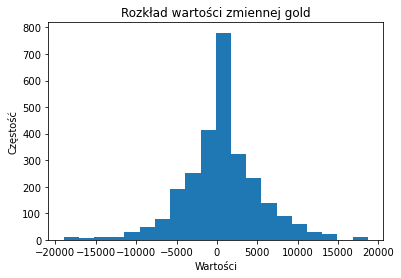

In [411]:
# Wykres rozkładu wartości
df['gold'].plot.hist(bins=20)  # bins - liczba przedziałów na wykresie

# Dodatkowe opcje wykresu
plt.xlabel('Wartości')
plt.ylabel('Częstość')
plt.title('Rozkład wartości zmiennej gold')

# Wyświetlenie wykresu
plt.show()

In [412]:
data=df['gold']
# Metoda 1: Z wykorzystaniem warunku odchylenia standardowego
mean = data.mean()
std = data.std()
threshold = 3  # Liczba odchyleń standardowych

outliers_std = data[(data - mean).abs() > threshold * std]
print("Metoda 1: Wartości odstające (na podstawie odchylenia standardowego):")
print(outliers_std)

index_outliers_std= set(outliers_std.index)
# Metoda 2: Z wykorzystaniem procentyli (np. 5% i 95%)
q1 = data.quantile(0.05)
q3 = data.quantile(0.95)

outliers_percentile = data[(data < q1) | (data > q3)]
print("\nMetoda 2: Wartości odstające (na podstawie procentyli):")
print(outliers_percentile)

index_outliers_percentile = set(outliers_percentile.index)
# Metoda 3: Z wykorzystaniem z-score
z_scores = np.abs((data - mean) / std)
threshold_zscore = 2  # Próg z-score

outliers_zscore = data[z_scores > threshold_zscore]
print("\nMetoda 3: Wartości odstające (na podstawie z-score):")
print(outliers_zscore)

index_outliers_zscore = set(outliers_zscore.index)

# Wspólne elementy
common_elements = index_outliers_std.intersection(index_outliers_percentile, index_outliers_zscore)

print(type(common_elements))
lista_wspolnych = list(common_elements)

Metoda 1: Wartości odstające (na podstawie odchylenia standardowego):
130     17000.00
397    -19000.00
502     18700.00
546    -17600.00
602    -15400.00
662    -17000.00
715    -14000.00
891    -14200.00
1041    17000.00
1050    18000.00
1243   -14700.00
1287    17400.00
1396    17100.00
1606    17000.00
1691   -18200.00
1747   -18400.00
1762   -14500.00
1813   -14300.00
1817    18400.00
1962    14900.00
1968    18300.00
2008   -14300.00
2080   -14000.00
2083   -15600.00
2143    17900.00
2149   -15200.00
2283   -15800.00
2287    15500.00
2306   -18800.00
2315    17000.00
2353    17900.00
2386   -17200.00
2402   -17900.00
2569   -17600.00
2598   -15800.00
2647   -17400.00
Name: gold, dtype: float64

Metoda 2: Wartości odstające (na podstawie procentyli):
33       9100.00
34      -7100.00
35      -7100.00
36      10100.00
38     -12000.00
          ...   
2663    -8200.00
2668    -7400.00
2675    -7200.00
2729    12900.00
2730    10600.00
Name: gold, Length: 273, dtype: float64

Metoda

In [413]:
df = df.drop([2306,2569,1817,546,2598,2353,715,2647,2008,1243,1762,2149,2283,891])

In [414]:
len(df)

2718

Zmienna towers

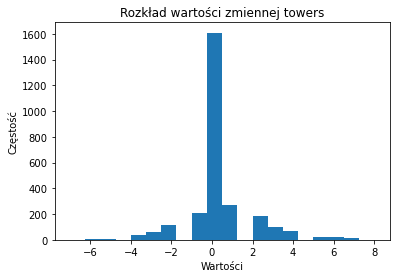

In [415]:
# Wykres rozkładu wartości
df['towers'].plot.hist(bins=20)  # bins - liczba przedziałów na wykresie

# Dodatkowe opcje wykresu
plt.xlabel('Wartości')
plt.ylabel('Częstość')
plt.title('Rozkład wartości zmiennej towers')

# Wyświetlenie wykresu
plt.show()

In [416]:
data=df['towers']
# Metoda 1: Z wykorzystaniem warunku odchylenia standardowego
mean = data.mean()
std = data.std()
threshold = 3  # Liczba odchyleń standardowych

outliers_std = data[(data - mean).abs() > threshold * std]
print("Metoda 1: Wartości odstające (na podstawie odchylenia standardowego):")
print(outliers_std)

index_outliers_std= set(outliers_std.index)
# Metoda 2: Z wykorzystaniem procentyli (np. 5% i 95%)
q1 = data.quantile(0.05)
q3 = data.quantile(0.95)

outliers_percentile = data[(data < q1) | (data > q3)]
print("\nMetoda 2: Wartości odstające (na podstawie procentyli):")
print(outliers_percentile)

index_outliers_percentile = set(outliers_percentile.index)
# Metoda 3: Z wykorzystaniem z-score
z_scores = np.abs((data - mean) / std)
threshold_zscore = 2  # Próg z-score

outliers_zscore = data[z_scores > threshold_zscore]
print("\nMetoda 3: Wartości odstające (na podstawie z-score):")
print(outliers_zscore)

index_outliers_zscore = set(outliers_zscore.index)

# Wspólne elementy
common_elements = index_outliers_std.intersection(index_outliers_percentile, index_outliers_zscore)

lista_wspolnych = list(common_elements)

Metoda 1: Wartości odstające (na podstawie odchylenia standardowego):
36      7.00
197     6.00
256     7.00
301     6.00
302     6.00
303     6.00
305     6.00
306     6.00
307     7.00
427    -6.00
428    -6.00
539     7.00
634    -5.00
832     6.00
834     6.00
851     6.00
1034   -6.00
1131    7.00
1132    7.00
1134    7.00
1227    6.00
1228    6.00
1229    6.00
1288    6.00
1502   -5.00
1503   -5.00
1510   -6.00
1582    7.00
1583    8.00
1588    6.00
1589    7.00
1590    7.00
1606    6.00
1658    6.00
1660    6.00
1744   -5.00
1959    6.00
1961    6.00
2135   -5.00
2310   -5.00
2342   -5.00
2402   -7.00
2541    6.00
2542    6.00
2610    7.00
2611    7.00
2613    7.00
2654   -5.00
2731    7.00
Name: towers, dtype: float64

Metoda 2: Wartości odstające (na podstawie procentyli):
34     -4.00
35     -4.00
36      7.00
37     -4.00
38     -4.00
        ... 
2654   -5.00
2709    4.00
2710    4.00
2711    4.00
2731    7.00
Name: towers, Length: 231, dtype: float64

Metoda 3: Wartości od

Zmienna kills

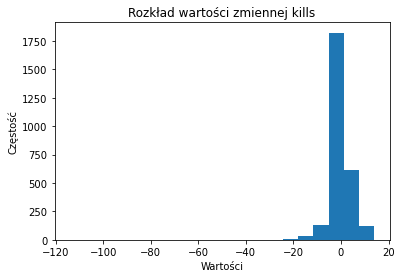

In [417]:
# Wykres rozkładu wartości
df['kills'].plot.hist(bins=20)  # bins - liczba przedziałów na wykresie

# Dodatkowe opcje wykresu
plt.xlabel('Wartości')
plt.ylabel('Częstość')
plt.title('Rozkład wartości zmiennej kills')

# Wyświetlenie wykresu
plt.show()

In [418]:
data=df['kills']
# Metoda 1: Z wykorzystaniem warunku odchylenia standardowego
mean = data.mean()
std = data.std()
threshold = 3  # Liczba odchyleń standardowych

outliers_std = data[(data - mean).abs() > threshold * std]
print("Metoda 1: Wartości odstające (na podstawie odchylenia standardowego):")
print(outliers_std)

index_outliers_std= set(outliers_std.index)
# Metoda 2: Z wykorzystaniem procentyli (np. 5% i 95%)
q1 = data.quantile(0.05)
q3 = data.quantile(0.95)

outliers_percentile = data[(data < q1) | (data > q3)]
print("\nMetoda 2: Wartości odstające (na podstawie procentyli):")
print(outliers_percentile)

index_outliers_percentile = set(outliers_percentile.index)
# Metoda 3: Z wykorzystaniem z-score
z_scores = np.abs((data - mean) / std)
threshold_zscore = 2  # Próg z-score

outliers_zscore = data[z_scores > threshold_zscore]
print("\nMetoda 3: Wartości odstające (na podstawie z-score):")
print(outliers_zscore)

index_outliers_zscore = set(outliers_zscore.index)

# Wspólne elementy
common_elements = index_outliers_std.intersection(index_outliers_percentile, index_outliers_zscore)

lista_wspolnych = list(common_elements)

Metoda 1: Wartości odstające (na podstawie odchylenia standardowego):
120     -20.00
122     -20.00
430     -24.00
1033    -14.00
1034    -14.00
1356   -114.00
1357    -84.00
1420    -14.00
1421    -16.00
Name: kills, dtype: float64

Metoda 2: Wartości odstające (na podstawie procentyli):
22      8.00
41     11.00
79      9.00
107    -7.00
112    11.00
        ... 
2724    8.00
2725    8.00
2726    8.00
2728   12.00
2730   13.00
Name: kills, Length: 253, dtype: float64

Metoda 3: Wartości odstające (na podstawie z-score):
41      11.00
112     11.00
117    -10.00
120    -20.00
122    -20.00
        ...  
2606   -12.00
2607   -12.00
2608   -12.00
2728    12.00
2730    13.00
Name: kills, Length: 114, dtype: float64


In [419]:
df = df.drop(list(df[abs(df['kills'])>20].index))

Zmienne dotyczące KDA

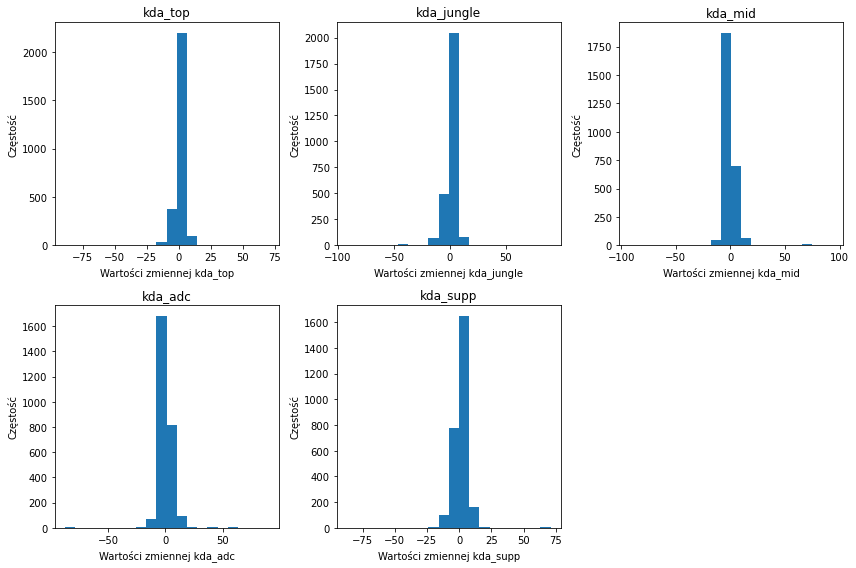

In [420]:
# Tworzenie podwykresów
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Ustalenie tytułów i etykiet dla podwykresów
titles = ['kda_top', 'kda_jungle', 'kda_mid', 'kda_adc', 'kda_supp']
x_labels = ['Wartości zmiennej kda_top', 'Wartości zmiennej kda_jungle', 'Wartości zmiennej kda_mid', 'Wartości zmiennej kda_adc', 'Wartości zmiennej kda_supp']
y_label = 'Częstość'

# Generowanie wykresów
axs[0, 0].hist(df['kda_top'], bins=20)
axs[0, 0].set_title(titles[0])
axs[0, 0].set_xlabel(x_labels[0])
axs[0, 0].set_ylabel(y_label)

axs[0, 1].hist(df['kda_jungle'], bins=20)
axs[0, 1].set_title(titles[1])
axs[0, 1].set_xlabel(x_labels[1])
axs[0, 1].set_ylabel(y_label)

axs[0, 2].hist(df['kda_mid'], bins=20)
axs[0, 2].set_title(titles[2])
axs[0, 2].set_xlabel(x_labels[2])
axs[0, 2].set_ylabel(y_label)

axs[1, 0].hist(df['kda_adc'], bins=20)
axs[1, 0].set_title(titles[3])
axs[1, 0].set_xlabel(x_labels[3])
axs[1, 0].set_ylabel(y_label)

axs[1, 1].hist(df['kda_supp'], bins=20)
axs[1, 1].set_title(titles[4])
axs[1, 1].set_xlabel(x_labels[4])
axs[1, 1].set_ylabel(y_label)

# Usunięcie ostatniego podwykresu
fig.delaxes(axs[1, 2])

# Dopasowanie ułożenia podwykresów
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

In [421]:
pozycje = ['top','jungle','mid','adc','supp']
lista_pozycji= []

for pozycja in pozycje:
    data=df[f'kda_{pozycja}']
    # Metoda 1: Z wykorzystaniem warunku odchylenia standardowego
    mean = data.mean()
    std = data.std()
    threshold = 3  # Liczba odchyleń standardowych

    outliers_std = data[(data - mean).abs() > threshold * std]


    index_outliers_std= set(outliers_std.index)
    # Metoda 2: Z wykorzystaniem procentyli (np. 5% i 95%)
    q1 = data.quantile(0.05)
    q3 = data.quantile(0.95)

    outliers_percentile = data[(data < q1) | (data > q3)]


    index_outliers_percentile = set(outliers_percentile.index)
    # Metoda 3: Z wykorzystaniem z-score
    z_scores = np.abs((data - mean) / std)
    threshold_zscore = 2  # Próg z-score

    outliers_zscore = data[z_scores > threshold_zscore]


    index_outliers_zscore = set(outliers_zscore.index)

    # Wspólne elementy
    common_elements = index_outliers_std.intersection(index_outliers_percentile, index_outliers_zscore)

    lista_wspolnych = list(common_elements)
    lista_pozycji.append(lista_wspolnych)

In [422]:
warunek_top= df[abs(df['kda_top'])>20].index
warunek_jungle= df[abs(df['kda_jungle'])>20].index
warunek_mid= df[abs(df['kda_mid'])>20].index
warunek_adc= df[abs(df['kda_adc'])>20].index
warunek_supp= df[abs(df['kda_supp'])>15].index

rekordy = df.loc[(warunek_top) | (warunek_jungle) | (warunek_mid) | (warunek_adc) | (warunek_supp)].index

In [423]:
df = df.drop(rekordy)

Zmienne dotyczące stworów

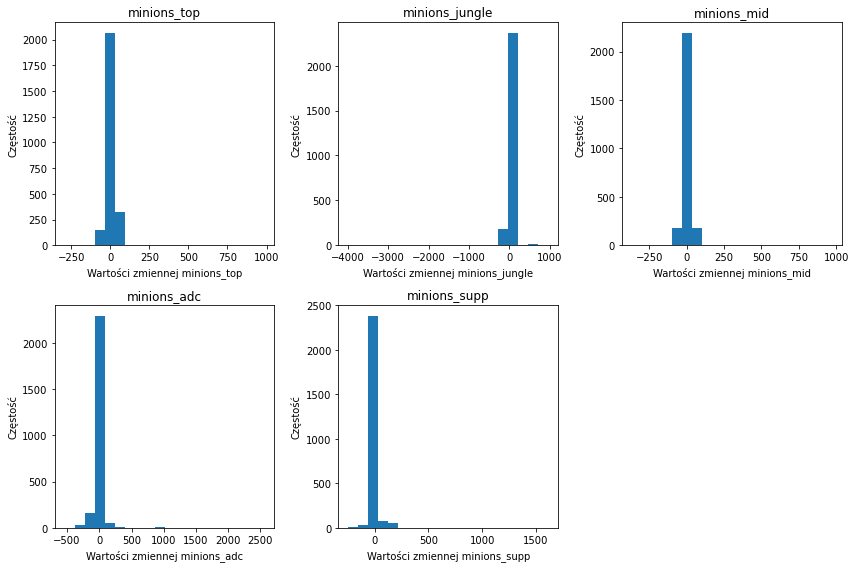

In [424]:
# Tworzenie podwykresów
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Ustalenie tytułów i etykiet dla podwykresów
titles = ['minions_top', 'minions_jungle', 'minions_mid', 'minions_adc', 'minions_supp']
x_labels = ['Wartości zmiennej minions_top', 'Wartości zmiennej minions_jungle', 'Wartości zmiennej minions_mid', 'Wartości zmiennej minions_adc', 'Wartości zmiennej minions_supp']
y_label = 'Częstość'

# Generowanie wykresów
axs[0, 0].hist(df['minions_top'], bins=20)
axs[0, 0].set_title(titles[0])
axs[0, 0].set_xlabel(x_labels[0])
axs[0, 0].set_ylabel(y_label)

axs[0, 1].hist(df['minions_jungle'], bins=20)
axs[0, 1].set_title(titles[1])
axs[0, 1].set_xlabel(x_labels[1])
axs[0, 1].set_ylabel(y_label)

axs[0, 2].hist(df['minions_mid'], bins=20)
axs[0, 2].set_title(titles[2])
axs[0, 2].set_xlabel(x_labels[2])
axs[0, 2].set_ylabel(y_label)

axs[1, 0].hist(df['minions_adc'], bins=20)
axs[1, 0].set_title(titles[3])
axs[1, 0].set_xlabel(x_labels[3])
axs[1, 0].set_ylabel(y_label)

axs[1, 1].hist(df['minions_supp'], bins=20)
axs[1, 1].set_title(titles[4])
axs[1, 1].set_xlabel(x_labels[4])
axs[1, 1].set_ylabel(y_label)

# Usunięcie ostatniego podwykresu
fig.delaxes(axs[1, 2])

# Dopasowanie ułożenia podwykresów
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

In [425]:
pozycje = ['top','jungle','mid','adc','supp']
lista_pozycji= []

for pozycja in pozycje:
    data=df[f'minions_{pozycja}']
    # Metoda 1: Z wykorzystaniem warunku odchylenia standardowego
    mean = data.mean()
    std = data.std()
    threshold = 3  # Liczba odchyleń standardowych

    outliers_std = data[(data - mean).abs() > threshold * std]


    index_outliers_std= set(outliers_std.index)
    # Metoda 2: Z wykorzystaniem procentyli (np. 5% i 95%)
    q1 = data.quantile(0.05)
    q3 = data.quantile(0.95)

    outliers_percentile = data[(data < q1) | (data > q3)]


    index_outliers_percentile = set(outliers_percentile.index)
    # Metoda 3: Z wykorzystaniem z-score
    z_scores = np.abs((data - mean) / std)
    threshold_zscore = 2  # Próg z-score

    outliers_zscore = data[z_scores > threshold_zscore]


    index_outliers_zscore = set(outliers_zscore.index)

    # Wspólne elementy
    common_elements = index_outliers_std.intersection(index_outliers_percentile, index_outliers_zscore)

    lista_wspolnych = list(common_elements)
    lista_pozycji.append(lista_wspolnych)

In [426]:
warunek_top= df[abs(df['minions_top'])>120].index
warunek_jungle= df[abs(df['minions_jungle'])>120].index
warunek_mid= df[abs(df['minions_mid'])>100].index
warunek_adc= df[abs(df['minions_adc'])>150].index
warunek_supp= df[abs(df['minions_supp'])>100].index

rekordy = df.loc[(warunek_top) | (warunek_jungle) | (warunek_mid) | (warunek_adc) | (warunek_supp)].index

In [427]:
df = df.drop(rekordy)

Zmienne dotyczące smoków

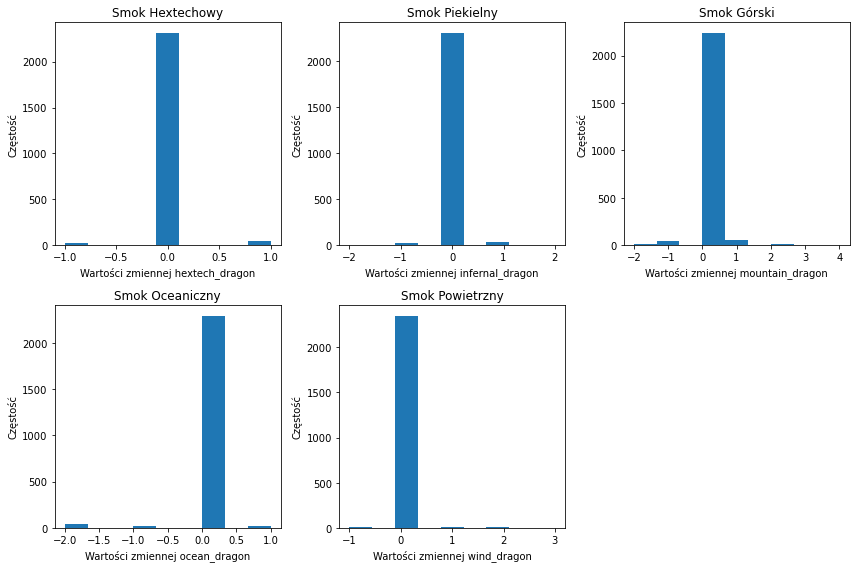

In [428]:
# Tworzenie podwykresów
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Ustalenie tytułów i etykiet dla podwykresów
titles = ['Smok Hextechowy', 'Smok Piekielny', 'Smok Górski', 'Smok Oceaniczny', 'Smok Powietrzny']
x_labels = ['Wartości zmiennej hextech_dragon', 'Wartości zmiennej infernal_dragon', 
            'Wartości zmiennej mountain_dragon', 'Wartości zmiennej ocean_dragon',
            'Wartości zmiennej wind_dragon']
y_label = 'Częstość'

# Generowanie wykresów
axs[0, 0].hist(df['hextech_dragon'], bins=9)
axs[0, 0].set_title(titles[0])
axs[0, 0].set_xlabel(x_labels[0])
axs[0, 0].set_ylabel(y_label)

axs[0, 1].hist(df['infernal_dragon'], bins=9)
axs[0, 1].set_title(titles[1])
axs[0, 1].set_xlabel(x_labels[1])
axs[0, 1].set_ylabel(y_label)

axs[0, 2].hist(df['mountain_dragon'], bins=9)
axs[0, 2].set_title(titles[2])
axs[0, 2].set_xlabel(x_labels[2])
axs[0, 2].set_ylabel(y_label)

axs[1, 0].hist(df['ocean_dragon'], bins=9)
axs[1, 0].set_title(titles[3])
axs[1, 0].set_xlabel(x_labels[3])
axs[1, 0].set_ylabel(y_label)

axs[1, 1].hist(df['wind_dragon'], bins=9)
axs[1, 1].set_title(titles[4])
axs[1, 1].set_xlabel(x_labels[4])
axs[1, 1].set_ylabel(y_label)

# Usunięcie ostatniego podwykresu
fig.delaxes(axs[1, 2])

# Dopasowanie ułożenia podwykresów
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

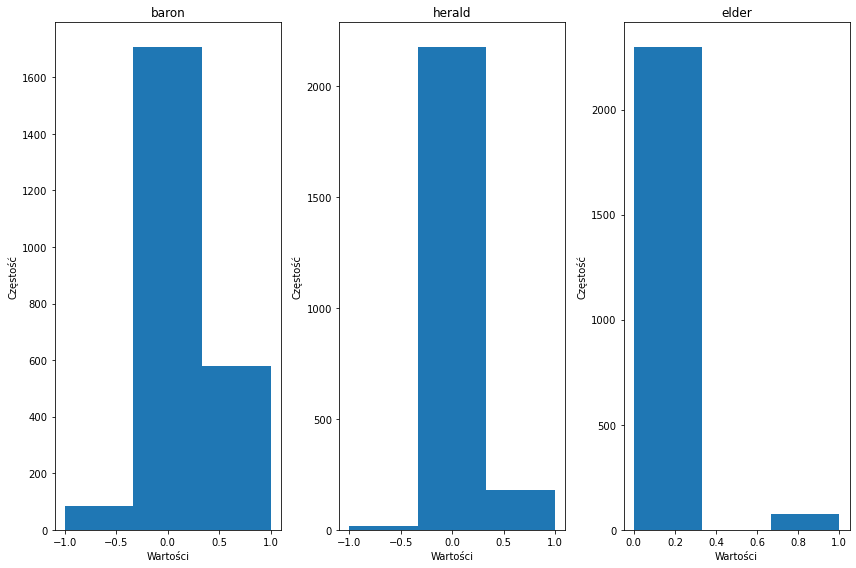

In [148]:
# Tworzenie podwykresów
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

# Ustalenie tytułów i etykiet dla podwykresów
titles = ['baron', 'herald', 'elder']
x_labels = ['Wartości', 'Wartości',
            'Wartości']
y_label = 'Częstość'

# Generowanie wykresów
axs[0].hist(df['baron'], bins=3)
axs[0].set_title(titles[0])
axs[0].set_xlabel(x_labels[0])
axs[0].set_ylabel(y_label)

axs[1].hist(df['herald'], bins=3)
axs[1].set_title(titles[1])
axs[1].set_xlabel(x_labels[1])
axs[1].set_ylabel(y_label)

axs[2].hist(df['elder'], bins=3)
axs[2].set_title(titles[2])
axs[2].set_xlabel(x_labels[2])
axs[2].set_ylabel(y_label)


# Dopasowanie ułożenia podwykresów
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

Zmienna celu

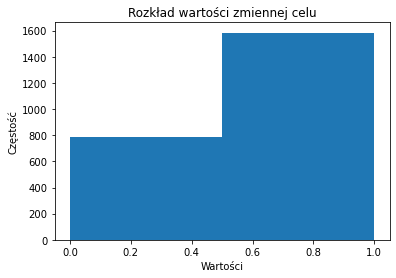

In [429]:
# Wykres rozkładu wartości
df['blue_team_win'].plot.hist(bins=2)  # bins - liczba przedziałów na wykresie

# Dodatkowe opcje wykresu
plt.xlabel('Wartości')
plt.ylabel('Częstość')
plt.title('Rozkład wartości zmiennej celu')

# Wyświetlenie wykresu
plt.show()

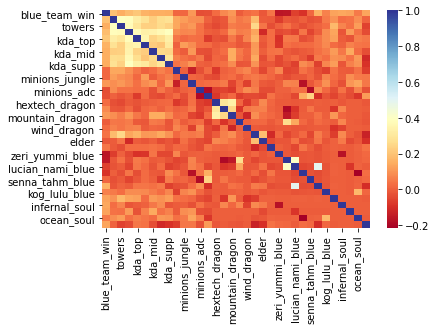

In [430]:
corr_matrix  = df[['blue_team_win','gold', 'towers', 'kills', 'kda_top',
       'kda_jungle', 'kda_mid', 'kda_adc', 'kda_supp', 'minions_top',
       'minions_jungle', 'minions_mid', 'minions_adc', 'minions_supp',
       'hextech_dragon', 'infernal_dragon', 'mountain_dragon', 'ocean_dragon',
       'wind_dragon', 'baron', 'elder', 'herald', 'zeri_yummi_blue', 'zeri_yummi_red',
       'lucian_nami_blue', 'lucian_nami_red', 'senna_tahm_blue',
       'senna_tahm_red', 'kog_lulu_blue','hextech_soul',
       'infernal_soul', 'mountain_soul', 'ocean_soul', 'wind_soul']].corr()

sns.heatmap(corr_matrix, annot=False, cmap='RdYlBu')
plt.show()

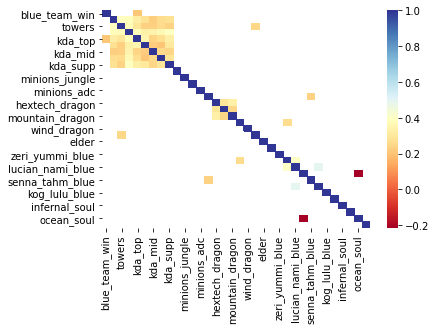

In [431]:
filtered_corr_matrix = corr_matrix[(corr_matrix > 0.2) | (corr_matrix < -0.2)]
sns.heatmap(filtered_corr_matrix, annot=False, cmap='RdYlBu')
plt.show()

In [432]:
filtered_pairs = corr_matrix[(corr_matrix > 0.2) | (corr_matrix < -0.2)].stack().reset_index()
filtered_pairs = filtered_pairs.rename(columns={'level_0': 'Zmienna1', 'level_1': 'Zmienna2', 0: 'Korelacja'})

# Usuwanie par takich samych zmiennych
filtered_pairs = filtered_pairs[filtered_pairs['Zmienna1'] != filtered_pairs['Zmienna2']]

print(filtered_pairs)

             Zmienna1          Zmienna2  Korelacja
1       blue_team_win           kda_top       0.21
3                gold            towers       0.40
4                gold             kills       0.38
5                gold           kda_top       0.32
6                gold        kda_jungle       0.28
..                ...               ...        ...
96   lucian_nami_blue    senna_tahm_red       0.49
98    lucian_nami_red        ocean_soul      -0.22
99    senna_tahm_blue      minions_supp       0.24
101    senna_tahm_red  lucian_nami_blue       0.49
107        ocean_soul   lucian_nami_red      -0.22

[76 rows x 3 columns]


Zmienne jakościowe

In [433]:
categorical_variables=df.select_dtypes(include=['object']).columns
categorical_variables=categorical_variables.drop(['time'])

In [434]:
categorical_variables

Index(['blue_team', 'red_team', 'champion_red_top', 'champion_red_jungle',
       'champion_red_mid', 'champion_red_adc', 'champion_red_supp',
       'champion_blue_top', 'champion_blue_jungle', 'champion_blue_mid',
       'champion_blue_adc', 'champion_blue_supp'],
      dtype='object')

In [435]:
df=pd.get_dummies(df, columns=categorical_variables)

Oversampling

In [436]:
df.blue_team_win.value_counts()

1    1584
0     789
Name: blue_team_win, dtype: int64

In [437]:
jedynki=df[df.blue_team_win==1]  #bardziej liczna kategoria
zera=df[df.blue_team_win==0] #mniej liczna kategoria
zera_up=resample(zera,
                   replace=True,
                   n_samples=len(jedynki), #żeby było po równo
                   random_state=1)
df = pd.concat([jedynki, zera_up])

In [438]:
df

,time,gold,towers,kills,kda_top,kda_jungle,kda_mid,kda_adc,kda_supp,minions_top,minions_jungle,minions_mid,minions_adc,minions_supp,hextech_dragon,infernal_dragon,mountain_dragon,ocean_dragon,wind_dragon,baron,elder,herald,blue_team_win,zeri_yummi_blue,zeri_yummi_red,lucian_nami_blue,lucian_nami_red,senna_tahm_blue,senna_tahm_red,kog_lulu_blue,kog_lulu_red,hextech_soul,infernal_soul,mountain_soul,ocean_soul,wind_soul,blue_team_Astralis,blue_team_Excel Esports,blue_team_Fnatic,blue_team_G2 Esports,blue_team_Mad Lions,blue_team_Misfits Gaming,blue_team_Rogue,blue_team_SK Gaming,blue_team_Team BDS,blue_team_Team Vitality,red_team_Astralis,red_team_Excel Esports,red_team_Fnatic,red_team_G2 Esports,red_team_Mad Lions,red_team_Misfits Gaming,red_team_Rogue,red_team_SK Gaming,red_team_Team BDS,red_team_Team Vitality,champion_red_top_Aatrox,champion_red_top_Akali,champion_red_top_Camille,champion_red_top_Gangplank,champion_red_top_Gnar,champion_red_top_Gragas,champion_red_top_Gwen,champion_red_top_Irelia,champion_red_top_Jax,champion_red_top_Jayce,champion_red_top_Kayle,champion_red_top_Kennen,champion_red_top_Ornn,champion_red_top_Poppy,champion_red_top_Sejuani,champion_red_top_Sett,champion_red_top_Sion,champion_red_top_Sylas,champion_red_jungle_Bel'Veth,champion_red_jungle_Evelynn,champion_red_jungle_Hecarim,champion_red_jungle_Ivern,champion_red_jungle_Jarvan IV,champion_red_jungle_Lee Sin,champion_red_jungle_Pantheon,champion_red_jungle_Poppy,champion_red_jungle_Skarner,champion_red_jungle_Trundle,champion_red_jungle_Vi,champion_red_jungle_Viego,champion_red_jungle_Volibear,champion_red_jungle_Wukong,champion_red_jungle_Xin Zhao,champion_red_mid_Ahri,champion_red_mid_Akali,champion_red_mid_Azir,champion_red_mid_Corki,champion_red_mid_Kog'Maw,champion_red_mid_LeBlanc,champion_red_mid_Lissandra,champion_red_mid_Orianna,champion_red_mid_Qiyana,champion_red_mid_Swain,champion_red_mid_Sylas,champion_red_mid_Syndra,champion_red_mid_Taliyah,champion_red_mid_Vex,champion_red_mid_Viktor,champion_red_mid_Zoe,champion_red_adc_Aphelios,champion_red_adc_Caitlyn,champion_red_adc_Draven,champion_red_adc_Ezreal,champion_red_adc_Jinx,champion_red_adc_Kalista,champion_red_adc_Karthus,champion_red_adc_Lucian,champion_red_adc_Samira,champion_red_adc_Senna,champion_red_adc_Sivir,champion_red_adc_Tahm Kench,champion_red_adc_Twitch,champion_red_adc_Xayah,champion_red_adc_Zeri,champion_red_supp_Amumu,champion_red_supp_Ashe,champion_red_supp_Bard,champion_red_supp_Braum,champion_red_supp_Galio,champion_red_supp_Janna,champion_red_supp_Karma,champion_red_supp_Leona,champion_red_supp_Lulu,champion_red_supp_Lux,champion_red_supp_Morgana,champion_red_supp_Nami,champion_red_supp_Nautilus,champion_red_supp_Pyke,champion_red_supp_Rakan,champion_red_supp_Renata Glasc,champion_red_supp_Senna,champion_red_supp_Tahm Kench,champion_red_supp_Taric,champion_red_supp_Yummi,champion_red_supp_Zilean,champion_blue_top_Aatrox,champion_blue_top_Darius,champion_blue_top_Gangplank,champion_blue_top_Gnar,champion_blue_top_Gragas,champion_blue_top_Gwen,champion_blue_top_Irelia,champion_blue_top_Jarvan IV,champion_blue_top_Jayce,champion_blue_top_Kayle,champion_blue_top_Kennen,champion_blue_top_Ornn,champion_blue_top_Renekton,champion_blue_top_Sejuani,champion_blue_top_Shyvana,champion_blue_top_Sion,champion_blue_top_Yone,champion_blue_top_Zac,champion_blue_jungle_Bel'Veth,champion_blue_jungle_Diana,champion_blue_jungle_Dr. Mundo,champion_blue_jungle_Hecarim,champion_blue_jungle_Jarvan IV,champion_blue_jungle_Lee Sin,champion_blue_jungle_Nidalee,champion_blue_jungle_Poppy,champion_blue_jungle_Taliyah,champion_blue_jungle_Trundle,champion_blue_jungle_Vi,champion_blue_jungle_Viego,champion_blue_jungle_Vloibear,champion_blue_jungle_Volibear,champion_blue_jungle_Warwick,champion_blue_jungle_Wukong,champion_blue_jungle_Xin Zhao,champion_blue_mid_Ahri,champion_blue_mid_Azir,champion_blue_mid_Corcki,champion_blue_mid_Corki,champion_blue_mid_Karma,champion_blue_mid_LeBlanc,champion_blue

<b> Modelowanie </b>

Standaryzacja i skalowanie

In [224]:

# Lista zmiennych wymagających skalowania (z więcej niż 2 unikalnymi wartościami)
zmienne_do_skalowania = []

# Lista zmiennych nie wymagających skalowania
zmienne_bez_skalowania = ['time']

# Iteracja po kolumnach data frame'u
for column in df.columns:
    if column != 'time':
        unikalne_wartosci = df[column].nunique()
        if unikalne_wartosci > 2:
            zmienne_do_skalowania.append(column)
        else:
            zmienne_bez_skalowania.append(column)

# Standaryzacja zmiennych wymagających skalowania
scaler = StandardScaler()
df_wyskalowane = df.copy()
df_wyskalowane[zmienne_do_skalowania] = scaler.fit_transform(df[zmienne_do_skalowania])

# Wyświetlenie wynikowego data frame'u
print(df_wyskalowane)

          time  gold  towers  kills  kda_top  kda_jungle  kda_mid  kda_adc  \
0     00:00:47 -0.03   -0.09   0.03    -0.02        0.07    -0.01    -0.04   
1     00:01:37 -0.03   -0.09   0.03    -0.02        0.07    -0.01    -0.04   
2     00:01:37 -1.40   -0.09   0.03    -0.02        0.07    -0.01    -0.04   
3     00:02:27  1.21   -0.09   0.03    -0.02        0.07    -0.01    -0.04   
4     00:03:17  0.77   -0.09   0.03    -0.02        0.07    -0.01    -0.04   
...        ...   ...     ...    ...      ...         ...      ...      ...   
652   00:21:19  0.47    1.19  -0.67    -0.94       -0.29    -0.39    -0.04   
2621  00:05:40  0.28   -0.09   0.27    -0.48        0.07    -0.01     0.25   
110   00:32:31  0.24    1.19   0.27     0.26       -0.00     0.18     1.45   
1734  00:23:52 -1.13   -0.09  -0.90    -0.94       -0.15    -0.39    -0.18   
365   00:04:29  1.17   -0.09   0.03    -0.02        0.07    -0.01    -0.04   

      kda_supp  minions_top  ...  champion_blue_supp_Rakan  \
0

In [226]:
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions = clf.fit(X_train,X_test,y_train,y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:12<00:00,  2.35it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
SVC                                1.00               1.00     1.00      1.00   
SGDClassifier                      1.00               1.00     1.00      1.00   
RidgeClassifierCV                  1.00               1.00     1.00      1.00   
RidgeClassifier                    1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00     1.00      1.00   
Perceptron                         1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier 

In [369]:
y=df['blue_team_win']
X=df.drop(['blue_team_win','time'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

Regresja Logistyczna

In [267]:
# Definicja modelu LogisticRegression
model = LogisticRegression()

# Definicja siatki parametrów do przetestowania
grid_parameters = {
    'logisticregression__penalty': ['l1', 'l2','elasticnet'],
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs','saga','sag','newton-cg']
}

# Tworzenie potoku, w którym dane są standaryzowane przed dopasowaniem modelu
pipeline = Pipeline([
    ('standardscaler', StandardScaler()),
    ('logisticregression', model)
])

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(pipeline, grid_parameters, cv=5)

# Dopasowanie modelu za pomocą GridSearchCV
grid_search.fit(X_train, y_train)

# Najlepsze parametry znalezione przez GridSearchCV
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Ocena modelu na zbiorze testowym
accuracy = grid_search.score(X_test, y_test)
print("Dokładność modelu na zbiorze testowym:", accuracy)

Najlepsze parametry: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Dokładność modelu na zbiorze testowym: 1.0


In [370]:
# Inicjalizacja modelu regresji logistycznej
model=LogisticRegression(penalty='l2',max_iter = 5000,C=0.01,solver='liblinear')

# Dopasowanie modelu do danych treningowych
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczenie dokładności (accuracy) predykcji
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność (accuracy):", accuracy)

# Obliczenie precyzji (precision) predykcji
precision = precision_score(y_test, y_pred)
print("Precyzja (precision):", precision)

# Obliczenie czułości (recall) predykcji
recall = recall_score(y_test, y_pred)
print("Czułość (recall):", recall)

# Obliczenie miary F1 (F1 score) predykcji
f1 = f1_score(y_test, y_pred)
print("Miara F1 (F1 score):", f1)

# Obliczenie AUC-ROC predykcji
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

Dokładność (accuracy): 0.9517615176151761
Precyzja (precision): 0.9608062709966405
Czułość (recall): 0.9407894736842105
Miara F1 (F1 score): 0.9506925207756232
AUC-ROC: 0.9516380380210978


In [322]:
# Obliczenie macierzy pomyłek
confusion = confusion_matrix(y_test, y_pred)

# Wyświetlenie macierzy pomyłek
print("Macierz pomyłek:")
print(confusion)

# Wypisanie źle przewidzianych klasyfikacji
misclassified_indices = y_test != y_pred
misclassified_samples = X_test[misclassified_indices]
misclassified_labels = y_test[misclassified_indices]
misclassified_predictions = y_pred[misclassified_indices]

Macierz pomyłek:
[[890  30]
 [ 50 875]]


In [321]:
# Utworzenie instancji modelu regresji logistycznej
model = LogisticRegression(penalty='l2',max_iter = 5000,C=0.01,solver='liblinear')

# Przeprowadzenie walidacji krzyżowej z użyciem 5 foldów
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Wyświetlenie wyników walidacji krzyżowej dla poszczególnych foldów
print("Wyniki walidacji krzyżowej (Accuracy):")
print(scores)

# Wyświetlenie średniej wartości dokładności (accuracy) z walidacji krzyżowej
print("Średnia dokładność (Accuracy):", scores.mean())

Wyniki walidacji krzyżowej (Accuracy):
[0.83875339 0.84146341 0.7899729  0.70596206 0.72628726]
Średnia dokładność (Accuracy): 0.7804878048780488


Standaryzacja

In [324]:
# Lista zmiennych wymagających skalowania (z więcej niż 2 unikalnymi wartościami)
zmienne_do_skalowania = []

# Lista zmiennych nie wymagających skalowania
zmienne_bez_skalowania = ['time']

# Iteracja po kolumnach data frame'u
for column in df.columns:
    if column != 'time':
        unikalne_wartosci = df[column].nunique()
        if unikalne_wartosci > 2:
            zmienne_do_skalowania.append(column)
        else:
            zmienne_bez_skalowania.append(column)

# Standaryzacja zmiennych wymagających skalowania
scaler = StandardScaler()
df_wyskalowane = df.copy()
df_wyskalowane[zmienne_do_skalowania] = scaler.fit_transform(df[zmienne_do_skalowania])

          time  gold  towers  kills  kda_top  kda_jungle  kda_mid  kda_adc  \
0     00:00:47 -0.03   -0.09   0.03    -0.02        0.07    -0.01    -0.04   
1     00:01:37 -0.03   -0.09   0.03    -0.02        0.07    -0.01    -0.04   
2     00:01:37 -1.40   -0.09   0.03    -0.02        0.07    -0.01    -0.04   
3     00:02:27  1.21   -0.09   0.03    -0.02        0.07    -0.01    -0.04   
4     00:03:17  0.77   -0.09   0.03    -0.02        0.07    -0.01    -0.04   
...        ...   ...     ...    ...      ...         ...      ...      ...   
652   00:21:19  0.47    1.19  -0.67    -0.94       -0.29    -0.39    -0.04   
2621  00:05:40  0.28   -0.09   0.27    -0.48        0.07    -0.01     0.25   
110   00:32:31  0.24    1.19   0.27     0.26       -0.00     0.18     1.45   
1734  00:23:52 -1.13   -0.09  -0.90    -0.94       -0.15    -0.39    -0.18   
365   00:04:29  1.17   -0.09   0.03    -0.02        0.07    -0.01    -0.04   

      kda_supp  minions_top  minions_jungle  minions_mid  minio

In [325]:
df_wyskalowane

,time,gold,towers,kills,kda_top,kda_jungle,kda_mid,kda_adc,kda_supp,minions_top,minions_jungle,minions_mid,minions_adc,minions_supp,hextech_dragon,infernal_dragon,mountain_dragon,ocean_dragon,wind_dragon,baron,elder,herald,blue_team_win,zeri_yummi_blue,zeri_yummi_red,lucian_nami_blue,lucian_nami_red,senna_tahm_blue,senna_tahm_red,kog_lulu_blue,kog_lulu_red,hextech_soul,infernal_soul,mountain_soul,ocean_soul,wind_soul,blue_team_Astralis,blue_team_Excel Esports,blue_team_Fnatic,blue_team_G2 Esports,blue_team_Mad Lions,blue_team_Misfits Gaming,blue_team_Rogue,blue_team_SK Gaming,blue_team_Team BDS,blue_team_Team Vitality,red_team_Astralis,red_team_Excel Esports,red_team_Fnatic,red_team_G2 Esports,red_team_Mad Lions,red_team_Misfits Gaming,red_team_Rogue,red_team_SK Gaming,red_team_Team BDS,red_team_Team Vitality,champion_red_top_Aatrox,champion_red_top_Akali,champion_red_top_Camille,champion_red_top_Gangplank,champion_red_top_Gnar,champion_red_top_Gragas,champion_red_top_Gwen,champion_red_top_Irelia,champion_red_top_Jax,champion_red_top_Jayce,champion_red_top_Kayle,champion_red_top_Kennen,champion_red_top_Ornn,champion_red_top_Poppy,champion_red_top_Sejuani,champion_red_top_Sett,champion_red_top_Sion,champion_red_top_Sylas,champion_red_jungle_Bel'Veth,champion_red_jungle_Evelynn,champion_red_jungle_Hecarim,champion_red_jungle_Ivern,champion_red_jungle_Jarvan IV,champion_red_jungle_Lee Sin,champion_red_jungle_Pantheon,champion_red_jungle_Poppy,champion_red_jungle_Qiyana,champion_red_jungle_Skarner,champion_red_jungle_Trundle,champion_red_jungle_Vi,champion_red_jungle_Viego,champion_red_jungle_Volibear,champion_red_jungle_Wukong,champion_red_jungle_Xin Zhao,champion_red_mid_Ahri,champion_red_mid_Akali,champion_red_mid_Azir,champion_red_mid_Corki,champion_red_mid_Kog'Maw,champion_red_mid_LeBlanc,champion_red_mid_Lissandra,champion_red_mid_Orianna,champion_red_mid_Qiyana,champion_red_mid_Swain,champion_red_mid_Sylas,champion_red_mid_Syndra,champion_red_mid_Taliyah,champion_red_mid_Twisted Fate,champion_red_mid_Vex,champion_red_mid_Viktor,champion_red_mid_Zoe,champion_red_adc_Aphelios,champion_red_adc_Caitlyn,champion_red_adc_Draven,champion_red_adc_Ezreal,champion_red_adc_Jinx,champion_red_adc_Kalista,champion_red_adc_Karthus,champion_red_adc_Lucian,champion_red_adc_Samira,champion_red_adc_Senna,champion_red_adc_Sivir,champion_red_adc_Tahm Kench,champion_red_adc_Twitch,champion_red_adc_Xayah,champion_red_adc_Zeri,champion_red_supp_Amumu,champion_red_supp_Ashe,champion_red_supp_Bard,champion_red_supp_Braum,champion_red_supp_Galio,champion_red_supp_Janna,champion_red_supp_Karma,champion_red_supp_Leona,champion_red_supp_Lulu,champion_red_supp_Lux,champion_red_supp_Morgana,champion_red_supp_Nami,champion_red_supp_Nautilus,champion_red_supp_Pyke,champion_red_supp_Rakan,champion_red_supp_Renata Glasc,champion_red_supp_Senna,champion_red_supp_Tahm Kench,champion_red_supp_Taric,champion_red_supp_Yummi,champion_red_supp_Zilean,champion_blue_top_Aatrox,champion_blue_top_Darius,champion_blue_top_Gangplank,champion_blue_top_Gnar,champion_blue_top_Gragas,champion_blue_top_Gwen,champion_blue_top_Irelia,champion_blue_top_Jarvan IV,champion_blue_top_Jayce,champion_blue_top_Kayle,champion_blue_top_Kennen,champion_blue_top_Ornn,champion_blue_top_Renekton,champion_blue_top_Sejuani,champion_blue_top_Shyvana,champion_blue_top_Sion,champion_blue_top_Yone,champion_blue_top_Zac,champion_blue_jungle_Bel'Veth,champion_blue_jungle_Diana,champion_blue_jungle_Dr. Mundo,champion_blue_jungle_Elise,champion_blue_jungle_Hecarim,champion_blue_jungle_Jarvan IV,champion_blue_jungle_Lee Sin,champion_blue_jungle_Nidalee,champion_blue_jungle_Poppy,champion_blue_jungle_Taliyah,champion_blue_jungle_Trundle,champion_blue_jungle_Vi,champion_blue_jungle_Viego,champion_blue_jungle_Vloibear,champion_blue_jungle_Volibear,champion_blue_jungle_Warwick,champion_blue_jungle_Wukong,champion_blue_jungle_Xin Zhao,champion_blue_mid_Ahri,champion_blue_mid_Azir,champion_blue_mid_Corcki,cha

In [334]:
y=df_wyskalowane['blue_team_win']
X=df_wyskalowane.drop(['blue_team_win','time'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5)

In [327]:
# Definicja modelu LogisticRegression
model = LogisticRegression()

# Definicja siatki parametrów do przetestowania
grid_parameters = {
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs','saga','sag','newton-cg']
}

# Tworzenie potoku, w którym dane są standaryzowane przed dopasowaniem modelu
pipeline = Pipeline([
    ('standardscaler', StandardScaler()),
    ('logisticregression', model)
])

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(pipeline, grid_parameters, cv=5)

# Dopasowanie modelu za pomocą GridSearchCV
grid_search.fit(X_train, y_train)

# Najlepsze parametry znalezione przez GridSearchCV
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Ocena modelu na zbiorze testowym
accuracy = grid_search.score(X_test, y_test)
print("Dokładność modelu na zbiorze testowym:", accuracy)

Najlepsze parametry: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Dokładność modelu na zbiorze testowym: 1.0


In [350]:
# Inicjalizacja modelu regresji logistycznej
model=LogisticRegression(penalty='l2',max_iter = 5000,C=0.01,solver='liblinear')

# Dopasowanie modelu do danych treningowych
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczenie dokładności (accuracy) predykcji
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność (accuracy):", accuracy)

# Obliczenie precyzji (precision) predykcji
precision = precision_score(y_test, y_pred)
print("Precyzja (precision):", precision)

# Obliczenie czułości (recall) predykcji
recall = recall_score(y_test, y_pred)
print("Czułość (recall):", recall)

# Obliczenie miary F1 (F1 score) predykcji
f1 = f1_score(y_test, y_pred)
print("Miara F1 (F1 score):", f1)

# Obliczenie AUC-ROC predykcji
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

Dokładność (accuracy): 0.964769647696477
Precyzja (precision): 0.9865900383141762
Czułość (recall): 0.9414990859232175
Miara F1 (F1 score): 0.9635173058933584
AUC-ROC: 0.9644995429616088


Najistotniejsze zmienne:
Zmienna champion_blue_supp_Renata Glasc - waga: 0.625446219672783
Zmienna champion_red_top_Gwen - waga: -0.5974393667848121
Zmienna red_team_Misfits Gaming - waga: -0.4993527068239011
Zmienna champion_red_jungle_Poppy - waga: -0.48926254142710857
Zmienna champion_blue_supp_Nautilus - waga: -0.4294167485121381
Zmienna champion_blue_mid_Azir - waga: -0.3670603197681923
Zmienna champion_blue_top_Gwen - waga: 0.35940610845958987
Zmienna red_team_Astralis - waga: 0.35904019236929957
Zmienna champion_red_jungle_Trundle - waga: 0.3577592041128169
Zmienna champion_blue_jungle_Viego - waga: -0.357572806659363
Zmienna champion_blue_mid_Ahri - waga: -0.3415762543668097
Zmienna champion_blue_adc_Draven - waga: 0.3413544401357945
Zmienna champion_red_adc_Aphelios - waga: 0.3224562607687821
Zmienna blue_team_Team BDS - waga: -0.3102142236428023
Zmienna red_team_SK Gaming - waga: 0.30444006990998435


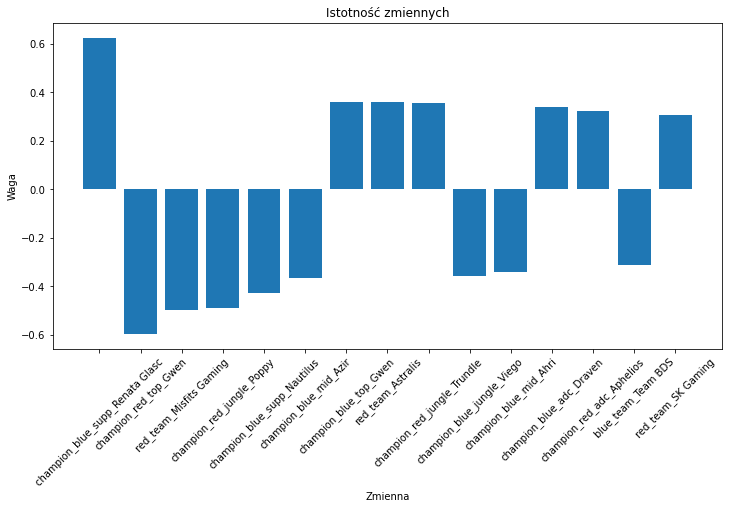

In [368]:
# Pobranie współczynników (wagi) dla zmiennych
coefficients = model.coef_[0]

# Utworzenie słownika {indeks_zmiennej: waga}
feature_coefficients = {index: coefficient for index, coefficient in enumerate(coefficients)}

# Posortowanie słownika po wartościach (wg wag)
sorted_feature_coefficients = dict(sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True))

# Wybranie 15 najistotniejszych zmiennych (wg wartości bezwzględnych wag)
top_15_features = list(sorted_feature_coefficients.keys())[:15]

# Wypisanie nazw i wartości wag dla najistotniejszych zmiennych
print("Najistotniejsze zmienne:")
for feature_idx in top_15_features:
    print("Zmienna", X.columns[feature_idx], "- waga:", coefficients[feature_idx])

# Wizualizacja istotności zmiennych
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_15_features)), [coefficients[idx] for idx in top_15_features])
plt.xticks(range(len(top_15_features)), [X.columns[idx] for idx in top_15_features], rotation=45)
plt.xlabel('Zmienna')
plt.ylabel('Waga')
plt.title('Istotność zmiennych')
plt.show()

In [336]:
# Utworzenie instancji modelu regresji logistycznej
model = LogisticRegression(penalty='l2',max_iter = 5000,C=0.01,solver='liblinear')

# Przeprowadzenie walidacji krzyżowej z użyciem 5 foldów
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Wyświetlenie wyników walidacji krzyżowej dla poszczególnych foldów
print("Wyniki walidacji krzyżowej (Accuracy):")
print(scores)

# Wyświetlenie średniej wartości dokładności (accuracy) z walidacji krzyżowej
print("Średnia dokładność (Accuracy):", scores.mean())

Wyniki walidacji krzyżowej (Accuracy):
[0.85365854 0.79945799 0.79539295 0.70054201 0.7303523 ]
Średnia dokładność (Accuracy): 0.775880758807588


In [524]:
Best_REG=LogisticRegression(penalty='l2',max_iter = 5000,C=0.01,solver='liblinear').fit(X_train,y_train)

Drzewa decyzyjne

In [439]:
y=df['blue_team_win']
X=df.drop(['blue_team_win','time'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [440]:
def RMSE(model, X, y):
    return np.sqrt(((model.predict(X) - y)**2).mean())

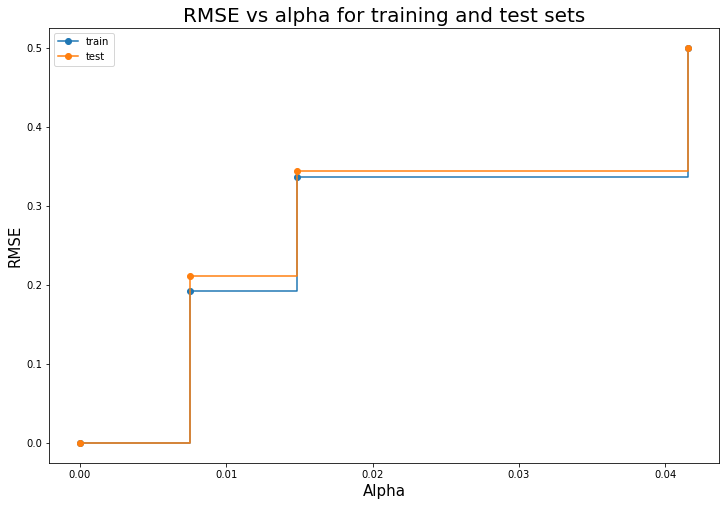

In [441]:
CART = DecisionTreeRegressor(random_state = 1, ccp_alpha = 0.0)
CART_model = CART.fit(X_train, y_train)
path = CART.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[::5]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state = 1, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
test_scores = [RMSE(clf, X_test, y_test) for clf in clfs]
train_scores = [RMSE(clf, X_train, y_train) for clf in clfs]

fig, ax = plt.subplots(figsize = [12, 8])
ax.set_xlabel("Alpha", fontsize = 15)
ax.set_ylabel("RMSE", fontsize = 15)
ax.set_title("RMSE vs alpha for training and test sets", fontsize = 20)
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [463]:
Best_CART = clfs[np.argmin(test_scores)]
print(f' ccp_alpha={Best_CART.ccp_alpha}')
print(f' depth={Best_CART.get_depth()}')
print(f' leaves={Best_CART.get_n_leaves()}')
print(f' minimalny_RMSE={min(test_scores)}')

 ccp_alpha=0.0
 depth=16
 leaves=20
 minimalny_RMSE=0.0


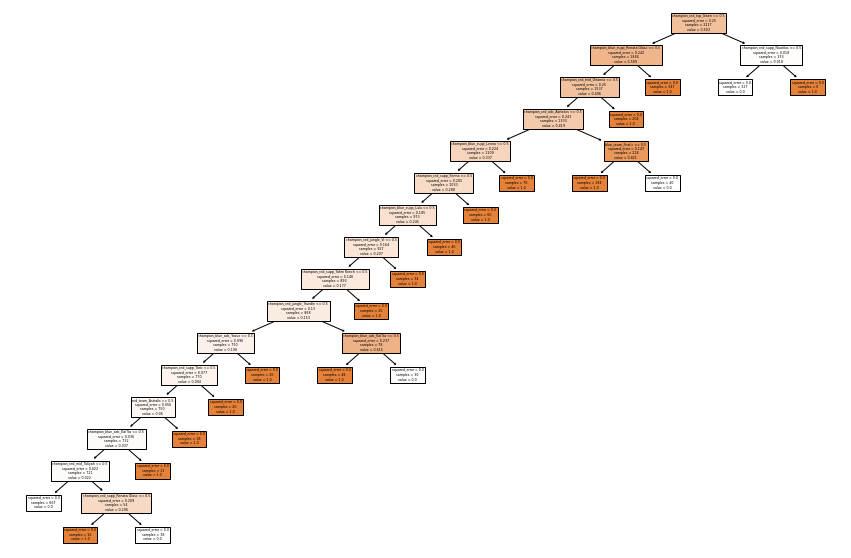

In [447]:
plt.figure(figsize = (15, 10))
_ = plot_tree(clfs[np.argmin(test_scores)] ,
                   feature_names = X_train.columns,  
                   filled = True)

In [468]:
# Funkcja do wylistowania cech w węzłach drzewa
def list_features_in_tree(tree, feature_names, node=0):
    if tree.children_left[node] == tree.children_right[node]:  # Jeśli węzeł jest liściem
        print(f"Węzeł {node}: Liść - Klasa {tree.value[node].argmax()}")
    else:  # Jeśli węzeł ma dzieci
        feature_index = tree.feature[node]
        feature_name = feature_names[feature_index]
        print(f"Węzeł {node}: Cecha '{feature_name}' <= {tree.threshold[node]}")
        list_features_in_tree(tree, feature_names, tree.children_left[node])
        list_features_in_tree(tree, feature_names, tree.children_right[node])

# Wywołujemy funkcję dla drzewa
print("Lista cech w węzłach drzewa decyzyjnego:")
list_features_in_tree(Best_CART.tree_, df.columns)

Lista cech w węzłach drzewa decyzyjnego:
Węzeł 0: Cecha 'champion_red_top_Gnar' <= 0.5
Węzeł 1: Cecha 'champion_blue_supp_Rakan' <= 0.5
Węzeł 2: Cecha 'champion_red_mid_LeBlanc' <= 0.5
Węzeł 3: Cecha 'champion_red_mid_Viktor' <= 0.5
Węzeł 4: Cecha 'champion_blue_supp_Bard' <= 0.5
Węzeł 5: Cecha 'champion_red_supp_Rakan' <= 0.5
Węzeł 6: Cecha 'champion_blue_supp_Braum' <= 0.5
Węzeł 7: Cecha 'champion_red_jungle_Skarner' <= 0.5
Węzeł 8: Cecha 'champion_red_supp_Renata Glasc' <= 0.5
Węzeł 9: Cecha 'champion_red_jungle_Poppy' <= 0.5
Węzeł 10: Cecha 'champion_blue_adc_Vayne' <= 0.5
Węzeł 11: Cecha 'champion_red_supp_Senna' <= 0.5
Węzeł 12: Cecha 'blue_team_Team BDS' <= 0.5
Węzeł 13: Cecha 'champion_blue_adc_Ezreal' <= 0.5
Węzeł 14: Cecha 'champion_red_mid_Sylas' <= 0.5
Węzeł 15: Liść - Klasa 0
Węzeł 16: Cecha 'champion_red_supp_Pyke' <= 0.5
Węzeł 17: Liść - Klasa 0
Węzeł 18: Liść - Klasa 0
Węzeł 19: Liść - Klasa 0
Węzeł 20: Liść - Klasa 0
Węzeł 21: Liść - Klasa 0
Węzeł 22: Liść - Klasa 0
Wę

Lasy Losowe

In [487]:
y=df['blue_team_win']
X=df.drop(['blue_team_win','time'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

Minimum for 400 trees


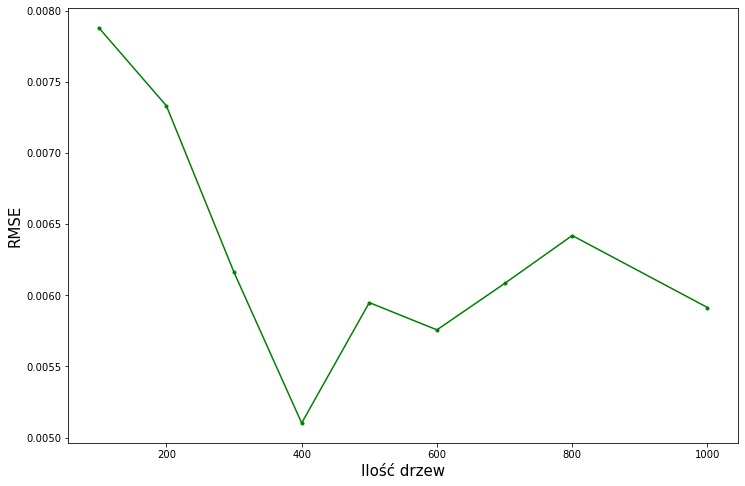

In [499]:
rfr = RandomForestRegressor
N = [100, 200, 300, 400, 500, 600, 700, 800, 1000]
RMSE_RF= [RMSE(rfr(n, n_jobs = -1).fit(X_train, y_train), X_test, y_test) for n in N]
plt.figure(figsize = (12, 8))
plt.plot(N, RMSE_RF, '.-', color = 'g');
plt.xlabel("Ilość drzew", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
print("Minimum for", N[np.argmin(RMSE_RF)], "trees")

In [500]:
#Checking number of features influence on RMSE
features = np.linspace(1, X_train.shape[1], 10).astype(int)
RMSE_RF_features= [RMSE(rfr(400, max_features = n, n_jobs = -1).fit(X_train, y_train), X_test, y_test) for n in features]

Minimum for 231 features


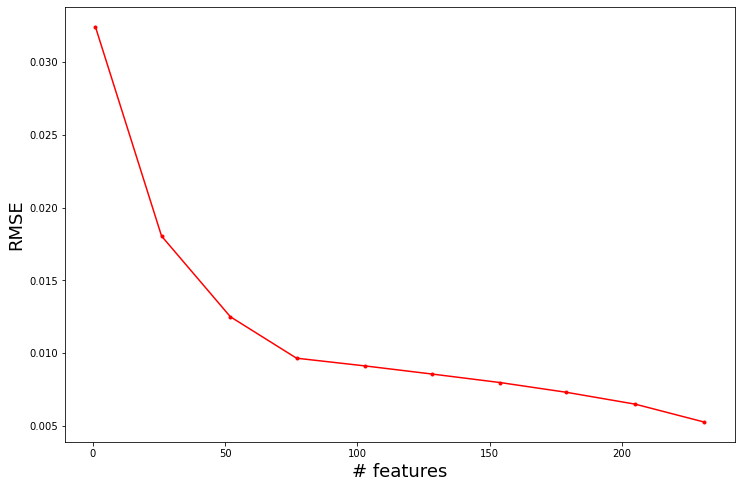

In [503]:
plt.figure(figsize = (12, 8))
plt.plot(features, RMSE_RF_features, '.-', color = 'r');
features[np.argmin(RMSE_RF_features)]
plt.xlabel("# features", fontsize = 18)
plt.ylabel("RMSE", fontsize = 18)
print("Minimum for", features[np.argmin(RMSE_RF_features)], "features")

In [504]:
Best_RF = RandomForestRegressor(400, max_features = 231, n_jobs = -1).fit(X_train, y_train)

In [505]:
RMSE(Best_RF, X_test, y_test)

0.0052862339326145945

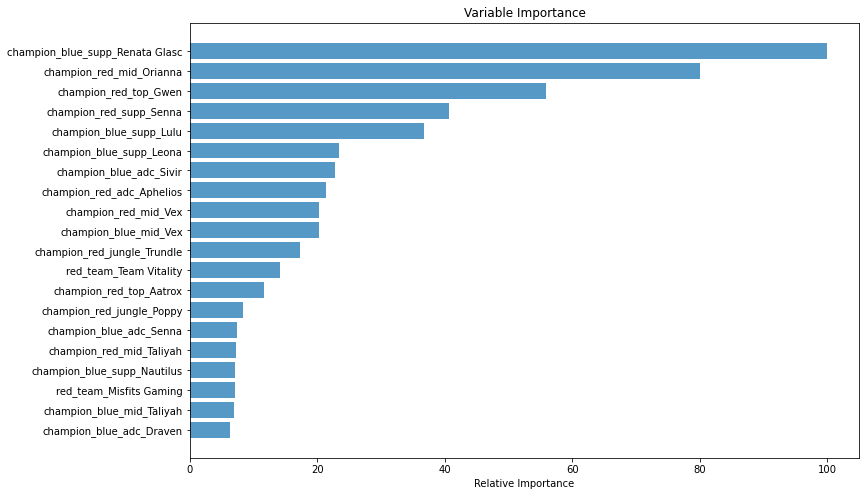

In [508]:
# Plot feature importance
feature_importance = Best_RF.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20

plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

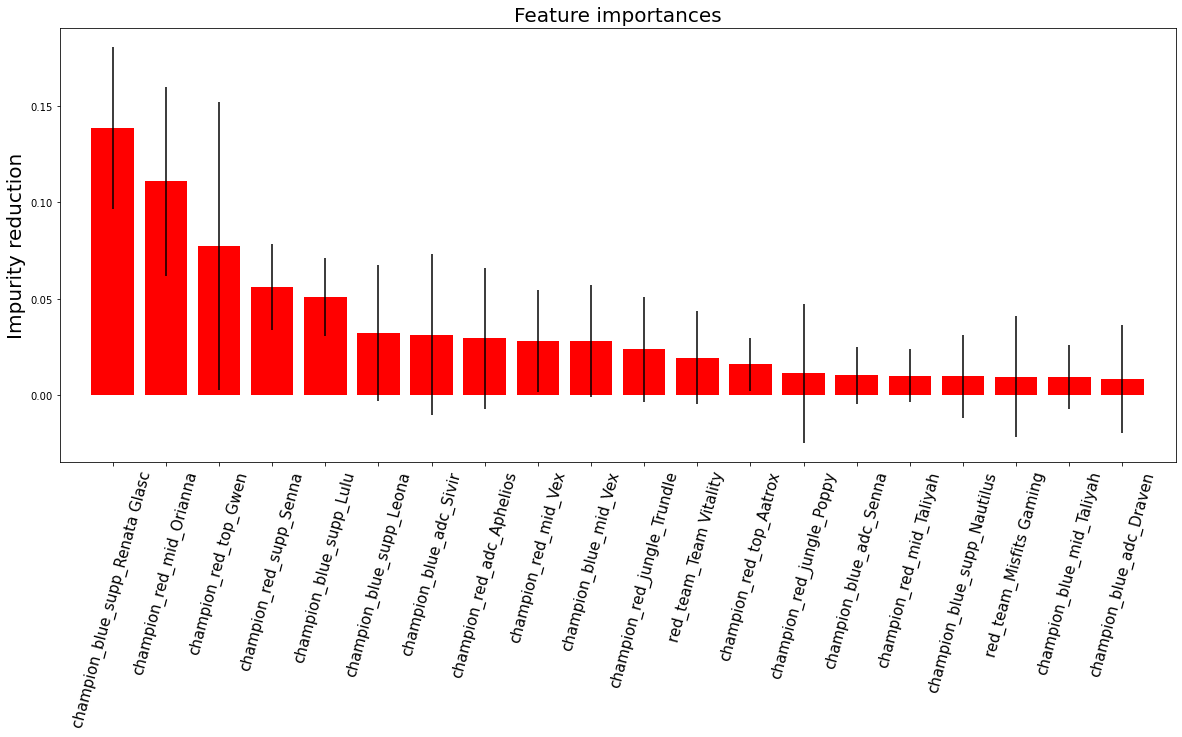

In [507]:
# Plot the feature importances of the forest
importances = Best_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in Best_RF.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

num_feat = 20
plt.figure(figsize=[20, 8])
plt.title("Feature importances", fontsize=20)
plt.bar(range(num_feat)[:num_feat], importances[indices][:num_feat],
        color="r", yerr=std[indices][:num_feat], align="center")

plt.xticks(range(num_feat)[:num_feat], X_train.columns[indices[:num_feat]], rotation=75, fontsize=15)
plt.xlim([-1, num_feat])
plt.ylabel("Impurity reduction", fontsize=20)

plt.show()

Gradient Boosted Trees

In [509]:
y=df['blue_team_win']
X=df.drop(['blue_team_win','time'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [510]:
#Checking number of tress influence on RMSE
gbr = GradientBoostingRegressor
N = [10, 50, 100, 500,1000, 1500,2000,2500,3000,3500,4000,4500,5000]
RMSE_GBT = [RMSE(gbr(n_estimators = n).fit(X_train, y_train), X_test, y_test) for n in N]

Minimum for 1500 trees


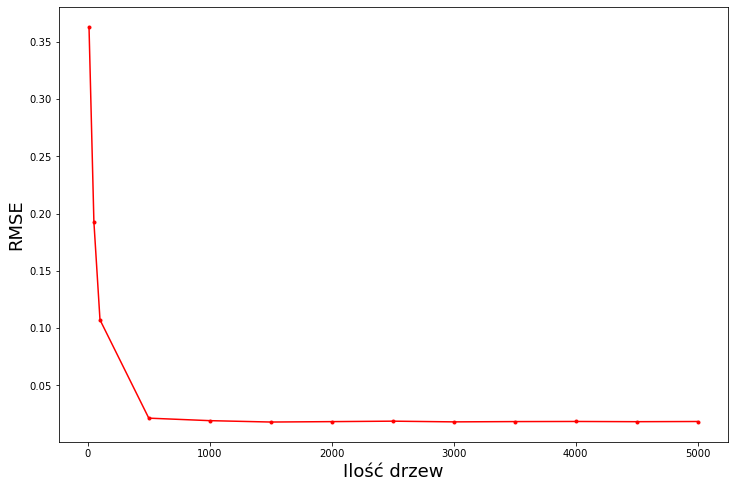

In [512]:
plt.figure(figsize = (12, 8))
plt.plot(N, RMSE_GBT, '.-', color = 'r');
plt.xlabel("Ilość drzew", fontsize = 18)
plt.ylabel("RMSE", fontsize = 18)
print("Minimum for", N[np.argmin(RMSE_GBT)], "trees")

In [513]:
Best_GBT = GradientBoostingRegressor(n_estimators = 1500).fit(X_train,y_train)

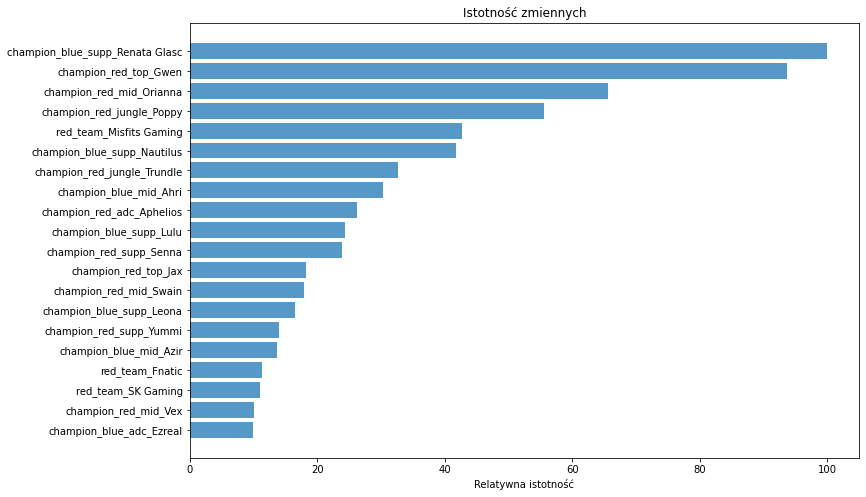

In [516]:
# Plot feature importance
feature_importance = Best_GBT.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20

plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relatywna istotność')
plt.title('Istotność zmiennych')
plt.show()

XGBOOST

In [404]:
y=df['blue_team_win']
X=df.drop(['blue_team_win','time'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [406]:
# Definicja modelu XGBClassifier
model = XGBClassifier()

# Zdefiniowanie siatki parametrów do przetestowania
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'n_estimators': [100, 200, 300,400],
    'subsample': [0.7,0.8,0.9, 1.0],
    'colsample_bytree': [0.6,0.8,0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0]
}
# dla klasyfikacji binarnej eval_metric = 'logloss'

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepsze parametry znalezione przez Grid Search
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Ocena dokładności dla najlepszego modelu
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Dokładność dla najlepszego modelu:", accuracy)

Najlepsze parametry: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 0.7}
Dokładność dla najlepszego modelu: 1.0


In [520]:
BEST_XGB = XGBClassifier(colsample_bytree= 0.6, learning_rate= 0.1, max_depth= 3, n_estimators= 100,
                         reg_alpha= 0.0, reg_lambda= 0.0, subsample= 0.7).fit(X_train,y_train)

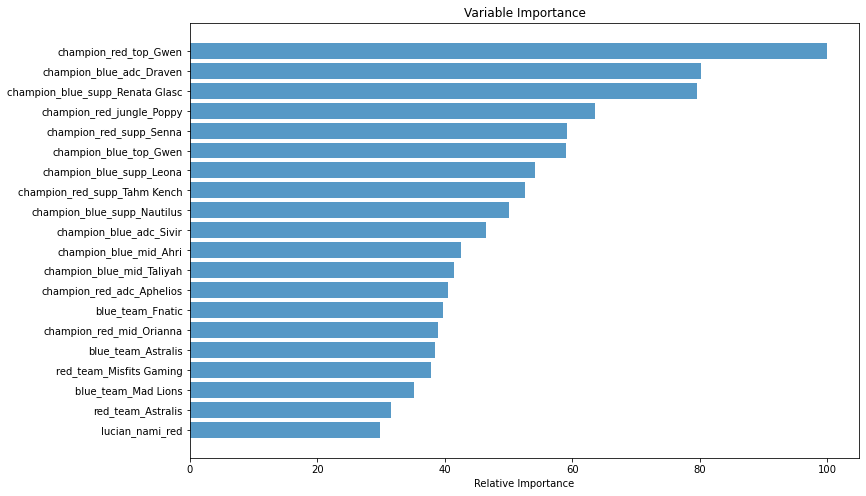

In [522]:
feature_importance = BEST_XGB.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20

plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [525]:
models=[Best_REG,Best_CART,Best_RF,Best_GBT,BEST_XGB]
errors = [RMSE(m, X_test, y_test) for m in models]

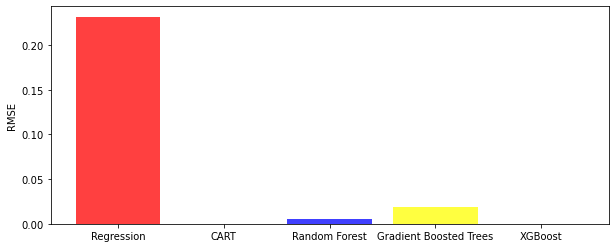

In [526]:
plt.figure(figsize = (10, 4))
plt.bar(['Regression','CART','Random Forest','Gradient Boosted Trees','XGBoost'], errors, color = ['red', 'green', 'blue','yellow','purple'], alpha = 0.75)
plt.ylabel('RMSE');

Modele bez zmiennych dotyczących konkretnych postaci

In [536]:
df.columns[:60]

Index(['time', 'gold', 'towers', 'kills', 'kda_top', 'kda_jungle', 'kda_mid',
       'kda_adc', 'kda_supp', 'minions_top', 'minions_jungle', 'minions_mid',
       'minions_adc', 'minions_supp', 'hextech_dragon', 'infernal_dragon',
       'mountain_dragon', 'ocean_dragon', 'wind_dragon', 'baron', 'elder',
       'herald', 'blue_team_win', 'zeri_yummi_blue', 'zeri_yummi_red',
       'lucian_nami_blue', 'lucian_nami_red', 'senna_tahm_blue',
       'senna_tahm_red', 'kog_lulu_blue', 'kog_lulu_red', 'hextech_soul',
       'infernal_soul', 'mountain_soul', 'ocean_soul', 'wind_soul',
       'blue_team_Astralis', 'blue_team_Excel Esports', 'blue_team_Fnatic',
       'blue_team_G2 Esports', 'blue_team_Mad Lions',
       'blue_team_Misfits Gaming', 'blue_team_Rogue', 'blue_team_SK Gaming',
       'blue_team_Team BDS', 'blue_team_Team Vitality', 'red_team_Astralis',
       'red_team_Excel Esports', 'red_team_Fnatic', 'red_team_G2 Esports',
       'red_team_Mad Lions', 'red_team_Misfits Gaming', '

In [628]:
df_new=df[['time', 'gold', 'towers', 'kills', 'kda_top', 'kda_jungle', 'kda_mid',
       'kda_adc', 'kda_supp', 'minions_top', 'minions_jungle', 'minions_mid',
       'minions_adc', 'minions_supp', 'hextech_dragon', 'infernal_dragon',
       'mountain_dragon', 'ocean_dragon', 'wind_dragon', 'baron', 'elder',
       'herald', 'blue_team_win', 'zeri_yummi_blue', 'zeri_yummi_red',
       'lucian_nami_blue', 'lucian_nami_red', 'senna_tahm_blue',
       'senna_tahm_red', 'kog_lulu_blue', 'kog_lulu_red', 'hextech_soul',
       'infernal_soul', 'mountain_soul', 'ocean_soul', 'wind_soul']]

In [665]:
df_new

,time,gold,towers,kills,kda_top,kda_jungle,kda_mid,kda_adc,kda_supp,minions_top,minions_jungle,minions_mid,minions_adc,minions_supp,hextech_dragon,infernal_dragon,mountain_dragon,ocean_dragon,wind_dragon,baron,elder,herald,blue_team_win,zeri_yummi_blue,zeri_yummi_red,lucian_nami_blue,lucian_nami_red,senna_tahm_blue,senna_tahm_red,kog_lulu_blue,kog_lulu_red,hextech_soul,infernal_soul,mountain_soul,ocean_soul,wind_soul
0,00:00:47,-0.08,-0.10,0.01,-0.02,0.05,-0.00,-0.03,-0.03,-0.06,0.02,0.04,0.10,-0.09,-0.06,-0.01,0.03,0.09,-0.06,-0.42,0,-0.22,1,0,0,0,0,0,0,0,0,0.05,0.05,0.02,0.08,0.20
1,00:01:37,-0.08,-0.10,0.01,-0.02,0.05,-0.00,-0.03,-0.03,-0.06,0.02,0.04,0.10,-0.09,-0.06,-0.01,0.03,0.09,-0.06,-0.42,0,-0.22,1,0,0,0,0,0,0,0,0,0.05,0.05,0.02,0.08,0.20
2,00:01:37,-1.49,-0.10,0.01,-0.02,0.05,-0.00,-0.03,-0.03,-0.10,0.25,-0.39,0.28,-0.09,-0.06,-0.01,0.03,0.09,-0.06,-0.42,0,-0.22,1,0,0,0,0,0,0,0,0,0.05,0.05,0.02,0.08,0.20
3,00:02:27,1.20,-0.10,0.01,-0.02,0.05,-0.00,-0.03,-0.03,0.27,0.17,-0.12,-0.02,0.15,-0.06,-0.01,0.03,0.09,-0.06,-0.42,0,-0.22,1,0,0,0,0,0,0,0,0,0.05,0.05,0.02,0.08,0.20
4,00:03:17,0.75,-0.10,0.01,-0.02,0.05,-0.00,-0.03,-0.03,-0.31,0.02,-0.08,0.10,-0.09,-0.06,-0.01,0.03,0.09,-0.06,-0.42,0,-0.22,1,0,0,0,0,0,0,0,0,0.05,0.05,0.02,0.08,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,00:07:53,-1.16,-0.10,0.01,-0.02,0.18,0.28,-0.03,0.20,-0.76,0.17,0.51,0.37,1.57,-0.06,-0.01,0.03,0.09,-0.06,-0.42,0,-0.22,0,0,0,0,0,0,0,0,0,0.05,0.05,0.02,0.08,0.20
2365,00:14:20,-0.60,0.58,0.56,0.58,0.58,-0.00,-0.03,0.20,0.36,0.73,-0.12,0.40,-0.15,-0.06,-0.01,0.03,0.09,-0.06,-0.42,0,-0.22,0,0,0,0,0,0,0,0,0,0.05,0.05,0.02,0.08,0.20
1023,00:14:30,-1.18,-1.48,-1.65,-1.72,-1.01,-1.02,-0.80,-0.96,-1.30,2.87,0.32,0.10,1.02,-0.06,-0.01,0.03,0.09,-0.06,-0.42,0,-0.22,0,0,0,0,0,0,0,0,0,0.05,0.05,0.02,0.08,0.20
1305,00:09:43,0.05,-0.10,0.29,-0.02,0.05,0.28,-0.03,-3.53,-0.06,0.41,0.36,-0.11,0.65,-0.06,-0.01,0.03,0.09,-0.06,-0.42,0,3.42,0,0,0,0,0,0,0,0,0,0.05,0.05,0.02,0.08,0.20


In [630]:
# Lista zmiennych wymagających skalowania (z więcej niż 2 unikalnymi wartościami)
zmienne_do_skalowania = []

# Lista zmiennych nie wymagających skalowania
zmienne_bez_skalowania = ['time']

# Iteracja po kolumnach data frame'u
for column in df.columns:
    if column != 'time':
        unikalne_wartosci = df[column].nunique()
        if unikalne_wartosci > 2:
            zmienne_do_skalowania.append(column)
        else:
            zmienne_bez_skalowania.append(column)

# Standaryzacja zmiennych wymagających skalowania
scaler = StandardScaler()
df_new[zmienne_do_skalowania] = scaler.fit_transform(df_new[zmienne_do_skalowania])

Regresja Logistyczna

In [632]:
y=df_new['blue_team_win']
X=df_new.drop(['blue_team_win','time'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [633]:
# Definicja modelu LogisticRegression
model = LogisticRegression()

# Definicja siatki parametrów do przetestowania
grid_parameters = {
    'logisticregression__penalty': ['l1', 'l2','elasticnet'],
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs','saga','sag','newton-cg']
    #'logisticregression__max_iter': [100,200,300,500,1000,5000]
}

# Tworzenie potoku, w którym dane są standaryzowane przed dopasowaniem modelu
pipeline = Pipeline([
    ('standardscaler', StandardScaler()),
    ('logisticregression', model)
])

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(pipeline, grid_parameters, cv=5)

# Dopasowanie modelu za pomocą GridSearchCV
grid_search.fit(X_train, y_train)

# Najlepsze parametry znalezione przez GridSearchCV
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Ocena modelu na zbiorze testowym
accuracy = grid_search.score(X_test, y_test)
print("Dokładność modelu na zbiorze testowym:", accuracy)

Najlepsze parametry: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Dokładność modelu na zbiorze testowym: 0.7171398527865405


In [634]:
# Inicjalizacja modelu regresji logistycznej
Best_REG=LogisticRegression(penalty='l2',max_iter = 200,C=0.1,solver='liblinear')

# Dopasowanie modelu do danych treningowych
Best_REG.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = Best_REG.predict(X_test)

# Obliczenie dokładności (accuracy) predykcji
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność (accuracy):", accuracy)

# Obliczenie precyzji (precision) predykcji
precision = precision_score(y_test, y_pred)
print("Precyzja (precision):", precision)

# Obliczenie czułości (recall) predykcji
recall = recall_score(y_test, y_pred)
print("Czułość (recall):", recall)

# Obliczenie miary F1 (F1 score) predykcji
f1 = f1_score(y_test, y_pred)
print("Miara F1 (F1 score):", f1)

# Obliczenie AUC-ROC predykcji
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

Dokładność (accuracy): 0.7171398527865405
Precyzja (precision): 0.731006160164271
Czułość (recall): 0.7206477732793523
Miara F1 (F1 score): 0.72579001019368
AUC-ROC: 0.7169978472523675


In [635]:
# Utworzenie instancji modelu regresji logistycznej
model = LogisticRegression(penalty='l2',max_iter = 200,C=0.1,solver='liblinear')

# Przeprowadzenie walidacji krzyżowej z użyciem 5 foldów
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Wyświetlenie wyników walidacji krzyżowej dla poszczególnych foldów
print("Wyniki walidacji krzyżowej (Accuracy):")
print(scores)

# Wyświetlenie średniej wartości dokładności (accuracy) z walidacji krzyżowej
print("Średnia dokładność (Accuracy):", scores.mean())

Wyniki walidacji krzyżowej (Accuracy):
[0.66719243 0.6466877  0.68769716 0.65718799 0.67298578]
Średnia dokładność (Accuracy): 0.6663502125475305


Najistotniejsze zmienne:
Zmienna senna_tahm_red - waga: 1.7738476550231062
Zmienna zeri_yummi_red - waga: -0.8091286714203935
Zmienna lucian_nami_blue - waga: -0.7021091469476073
Zmienna lucian_nami_red - waga: -0.6762133159422373
Zmienna zeri_yummi_blue - waga: -0.6539781874572304
Zmienna wind_soul - waga: 0.5329683439404533
Zmienna mountain_soul - waga: 0.5315598203128112
Zmienna infernal_soul - waga: 0.5051650269830403
Zmienna hextech_soul - waga: 0.42961189083467166
Zmienna kog_lulu_blue - waga: 0.30385999447418216
Zmienna kda_top - waga: 0.29280763782082214
Zmienna infernal_dragon - waga: 0.2366770634558909
Zmienna towers - waga: 0.20035272865435114
Zmienna kda_adc - waga: 0.19158899366963436
Zmienna minions_mid - waga: 0.1828609564183677
Zmienna gold - waga: 0.16153072498903603
Zmienna minions_adc - waga: -0.15857144661264283
Zmienna mountain_dragon - waga: 0.15075311285414372
Zmienna wind_dragon - waga: 0.13770671262974396
Zmienna kda_jungle - waga: 0.12766619490862743


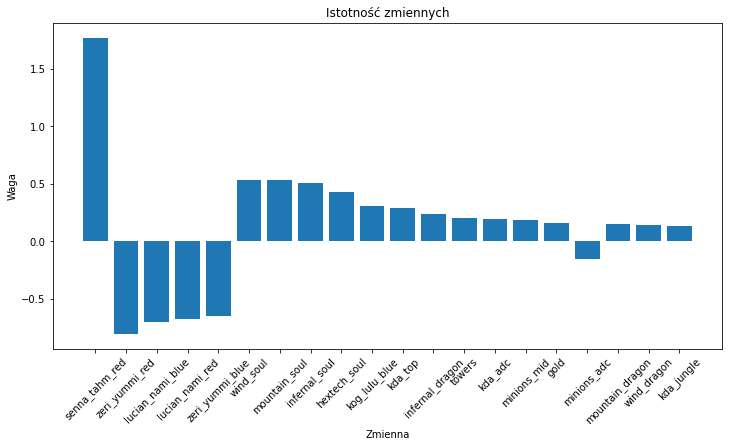

In [667]:
# Pobranie współczynników (wagi) dla zmiennych
coefficients = Best_REG.coef_[0]

# Utworzenie słownika {indeks_zmiennej: waga}
feature_coefficients = {index: coefficient for index, coefficient in enumerate(coefficients)}

# Posortowanie słownika po wartościach (wg wag)
sorted_feature_coefficients = dict(sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True))

# Wybranie 15 najistotniejszych zmiennych (wg wartości bezwzględnych wag)
top_15_features = list(sorted_feature_coefficients.keys())[:20]

# Wypisanie nazw i wartości wag dla najistotniejszych zmiennych
print("Najistotniejsze zmienne:")
for feature_idx in top_15_features:
    print("Zmienna", X.columns[feature_idx], "- waga:", coefficients[feature_idx])

# Wizualizacja istotności zmiennych
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_15_features)), [coefficients[idx] for idx in top_15_features])
plt.xticks(range(len(top_15_features)), [X.columns[idx] for idx in top_15_features], rotation=45)
plt.xlabel('Zmienna')
plt.ylabel('Waga')
plt.title('Istotność zmiennych')
plt.show()

Drzewa decyzyjne

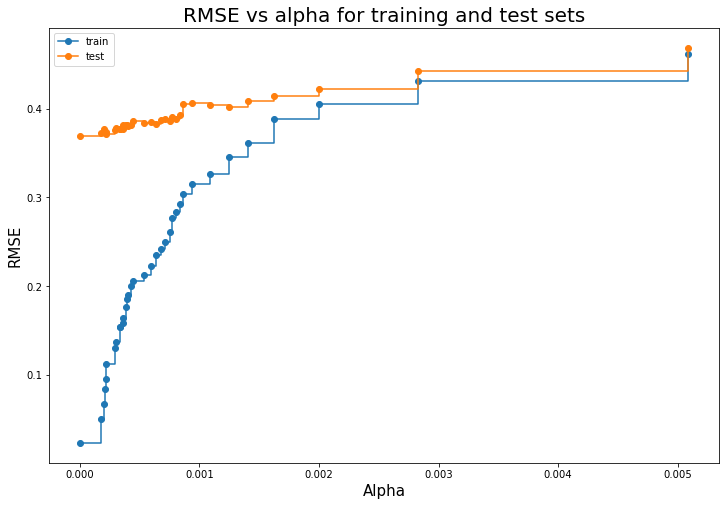

In [638]:
CART = DecisionTreeRegressor(random_state = 1, ccp_alpha = 0.0)
CART_model = CART.fit(X_train, y_train)
path = CART.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[::5]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state = 1, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
test_scores = [RMSE(clf, X_test, y_test) for clf in clfs]
train_scores = [RMSE(clf, X_train, y_train) for clf in clfs]

fig, ax = plt.subplots(figsize = [12, 8])
ax.set_xlabel("Alpha", fontsize = 15)
ax.set_ylabel("RMSE", fontsize = 15)
ax.set_title("RMSE vs alpha for training and test sets", fontsize = 20)
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [639]:
Best_CART = clfs[np.argmin(test_scores)]
print(f' ccp_alpha={Best_CART.ccp_alpha}')
print(f' depth={Best_CART.get_depth()}')
print(f' leaves={Best_CART.get_n_leaves()}')
print(f' minimalny_RMSE={min(test_scores)}')

 ccp_alpha=0.0
 depth=30
 leaves=292
 minimalny_RMSE=0.3695565307807344


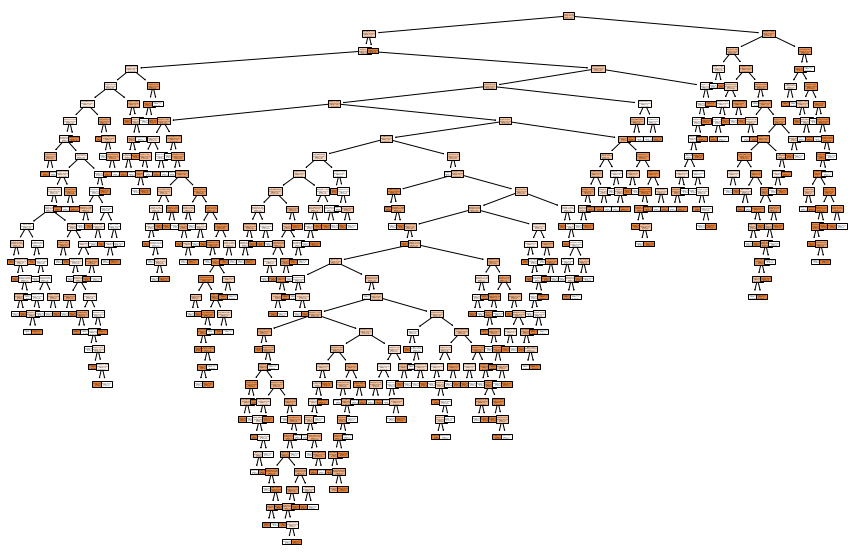

In [640]:
plt.figure(figsize = (15, 10))
_ = plot_tree(clfs[np.argmin(test_scores)] ,
                   feature_names = X_train.columns,  
                   filled = True)

In [641]:
# Funkcja do wylistowania cech w węzłach drzewa
def list_features_in_tree(tree, feature_names, node=0):
    if tree.children_left[node] == tree.children_right[node]:  # Jeśli węzeł jest liściem
        print(f"Węzeł {node}: Liść - Klasa {tree.value[node].argmax()}")
    else:  # Jeśli węzeł ma dzieci
        feature_index = tree.feature[node]
        feature_name = feature_names[feature_index]
        print(f"Węzeł {node}: Cecha '{feature_name}' <= {tree.threshold[node]}")
        list_features_in_tree(tree, feature_names, tree.children_left[node])
        list_features_in_tree(tree, feature_names, tree.children_right[node])

# Wywołujemy funkcję dla drzewa
print("Lista cech w węzłach drzewa decyzyjnego:")
list_features_in_tree(Best_CART.tree_, df.columns)

Lista cech w węzłach drzewa decyzyjnego:
Węzeł 0: Cecha 'kda_mid' <= 0.285348042845726
Węzeł 1: Cecha 'lucian_nami_red' <= 0.5
Węzeł 2: Cecha 'kills' <= -0.3006708025932312
Węzeł 3: Cecha 'kda_supp' <= 1.5415282249450684
Węzeł 4: Cecha 'minions_mid' <= 1.257648229598999
Węzeł 5: Cecha 'minions_top' <= 1.6223356127738953
Węzeł 6: Cecha 'kog_lulu_red' <= 2.788950379937887
Węzeł 7: Cecha 'kda_supp' <= -1.8023525476455688
Węzeł 8: Cecha 'minions_adc' <= 1.048124611377716
Węzeł 9: Liść - Klasa 0
Węzeł 10: Liść - Klasa 0
Węzeł 11: Cecha 'wind_dragon' <= 0.5945103913545609
Węzeł 12: Cecha 'minions_mid' <= 0.6435099542140961
Węzeł 13: Cecha 'minions_top' <= 0.9873468577861786
Węzeł 14: Cecha 'kda_jungle' <= -0.14965402777306736
Węzeł 15: Cecha 'towers' <= -2.0590845942497253
Węzeł 16: Cecha 'minions_mid' <= -0.405018825083971
Węzeł 17: Liść - Klasa 0
Węzeł 18: Cecha 'kda_supp' <= -0.743110865354538
Węzeł 19: Liść - Klasa 0
Węzeł 20: Cecha 'kog_lulu_red' <= -2.685271803289652
Węzeł 21: Cecha 'm

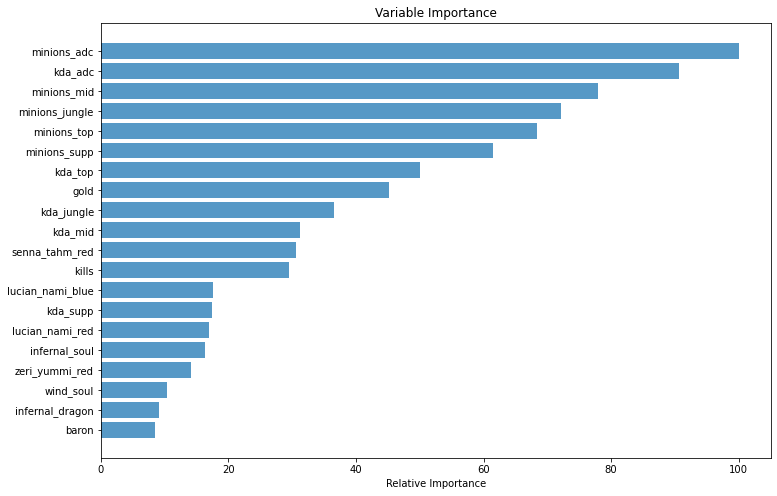

In [681]:
# Plot feature importance
feature_importance = Best_CART.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20

plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Lasy Losowe

Minimum for 500 trees


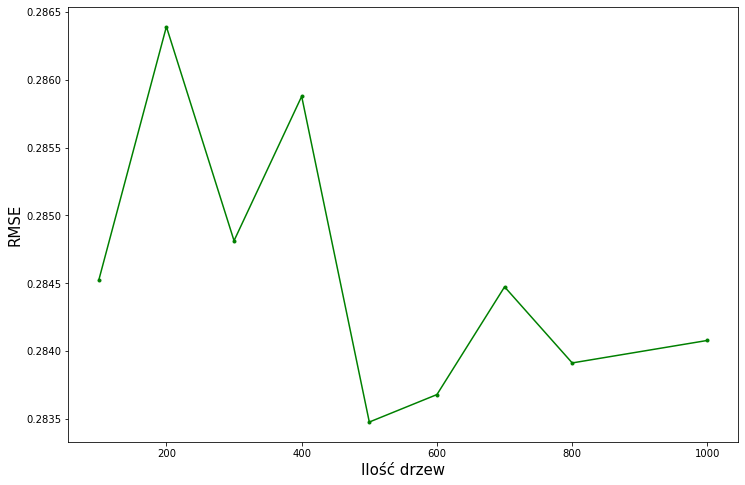

In [642]:
rfr = RandomForestRegressor
N = [100, 200, 300, 400, 500, 600, 700, 800, 1000]
RMSE_RF= [RMSE(rfr(n, n_jobs = -1).fit(X_train, y_train), X_test, y_test) for n in N]
plt.figure(figsize = (12, 8))
plt.plot(N, RMSE_RF, '.-', color = 'g');
plt.xlabel("Ilość drzew", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
print("Minimum for", N[np.argmin(RMSE_RF)], "trees")

In [643]:
#Checking number of features influence on RMSE
features = np.linspace(1, X_train.shape[1], 10).astype(int)
RMSE_RF_features= [RMSE(rfr(500, max_features = n, n_jobs = -1).fit(X_train, y_train), X_test, y_test) for n in features]

Minimum for 1 features


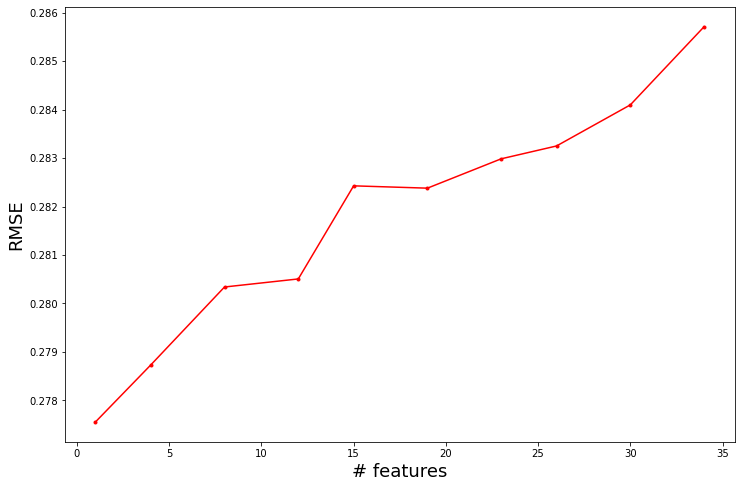

In [644]:
plt.figure(figsize = (12, 8))
plt.plot(features, RMSE_RF_features, '.-', color = 'r');
features[np.argmin(RMSE_RF_features)]
plt.xlabel("# features", fontsize = 18)
plt.ylabel("RMSE", fontsize = 18)
print("Minimum for", features[np.argmin(RMSE_RF_features)], "features")

In [677]:
Best_RF = RandomForestRegressor(500, max_features = 20, n_jobs = -1).fit(X_train, y_train)

In [678]:
RMSE(Best_RF, X_test, y_test)

0.2814805047048465

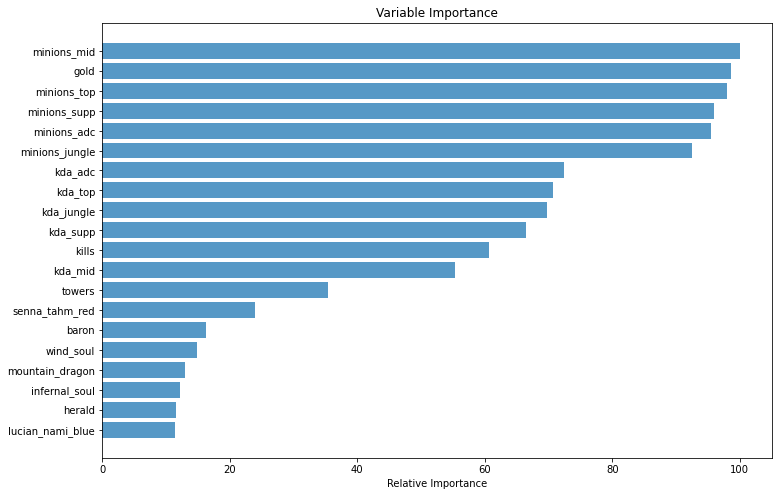

In [675]:
# Plot feature importance
feature_importance = Best_RF.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20

plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

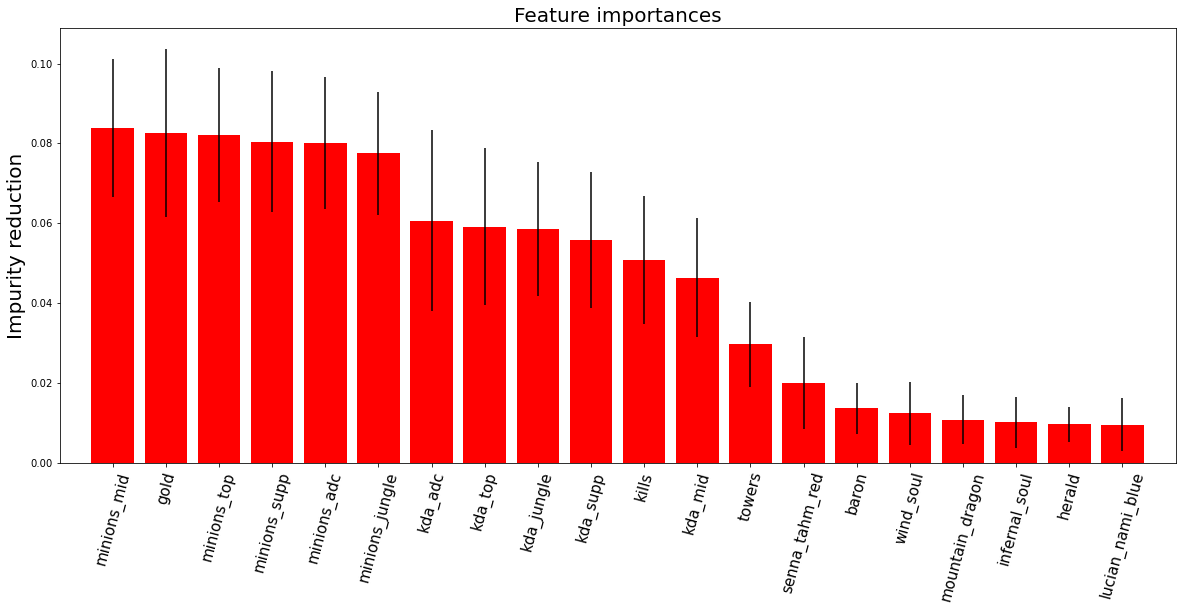

In [676]:
# Plot the feature importances of the forest
importances = Best_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in Best_RF.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

num_feat = 20
plt.figure(figsize=[20, 8])
plt.title("Feature importances", fontsize=20)
plt.bar(range(num_feat)[:num_feat], importances[indices][:num_feat],
        color="r", yerr=std[indices][:num_feat], align="center")

plt.xticks(range(num_feat)[:num_feat], X_train.columns[indices[:num_feat]], rotation=75, fontsize=15)
plt.xlim([-1, num_feat])
plt.ylabel("Impurity reduction", fontsize=20)

plt.show()

Gradient Boosting

In [657]:
#Checking number of tress influence on RMSE
gbr = GradientBoostingRegressor
N = [10, 50, 100, 500,1000, 1500,2000,2500,3000,3500,4000,4500,5000]
RMSE_GBT = [RMSE(gbr(n_estimators = n).fit(X_train, y_train), X_test, y_test) for n in N]

Minimum for 3000 trees


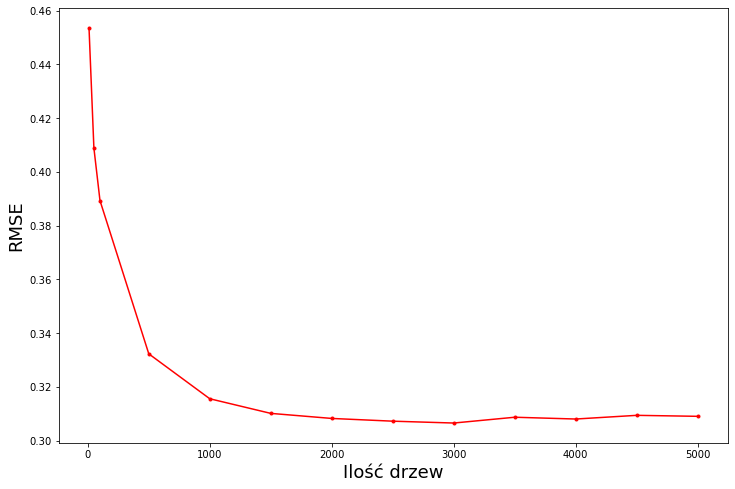

In [658]:
plt.figure(figsize = (12, 8))
plt.plot(N, RMSE_GBT, '.-', color = 'r');
plt.xlabel("Ilość drzew", fontsize = 18)
plt.ylabel("RMSE", fontsize = 18)
print("Minimum for", N[np.argmin(RMSE_GBT)], "trees")

In [659]:
Best_GBT = GradientBoostingRegressor(n_estimators = 3000).fit(X_train,y_train)

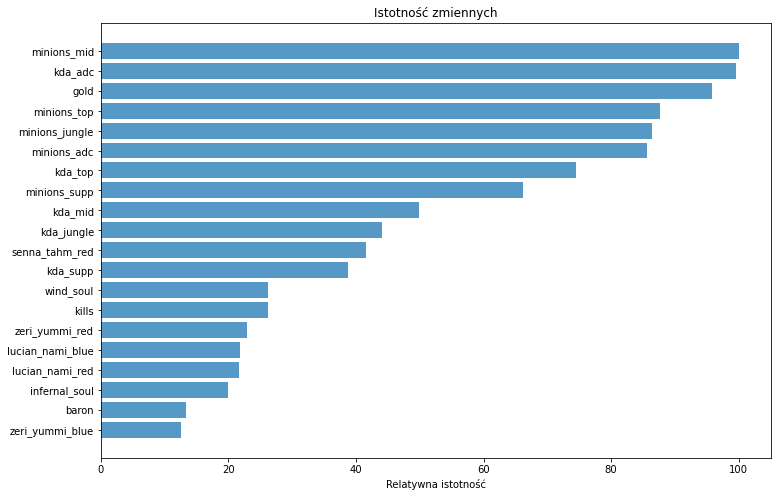

In [660]:
# Plot feature importance
feature_importance = Best_GBT.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20

plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relatywna istotność')
plt.title('Istotność zmiennych')
plt.show()

XGBOOST

In [664]:
# Definicja modelu XGBClassifier
model = XGBClassifier()

# Zdefiniowanie siatki parametrów do przetestowania
param_grid = {
    'max_depth': [5, 7,9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200,300],
    'subsample': [0.7,0.8,0.9],
    'colsample_bytree': [0.6,0.8,0.9],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}
# dla klasyfikacji binarnej eval_metric = 'logloss'

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepsze parametry znalezione przez Grid Search
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Ocena dokładności dla najlepszego modelu
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Dokładność dla najlepszego modelu:", accuracy)

Najlepsze parametry: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 0.0, 'subsample': 0.8}
Dokładność dla najlepszego modelu: 0.886435331230284


In [ ]:
#Najlepsze parametry: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 0.0, 'subsample': 0.8}
#Dokładność dla najlepszego modelu: 0.886435331230284

In [683]:
BEST_XGB = XGBClassifier(colsample_bytree= 0.9, learning_rate= 0.1, max_depth= 9, n_estimators= 300,
                         reg_alpha= 0.1, reg_lambda= 0.0, subsample= 0.8).fit(X_train,y_train)

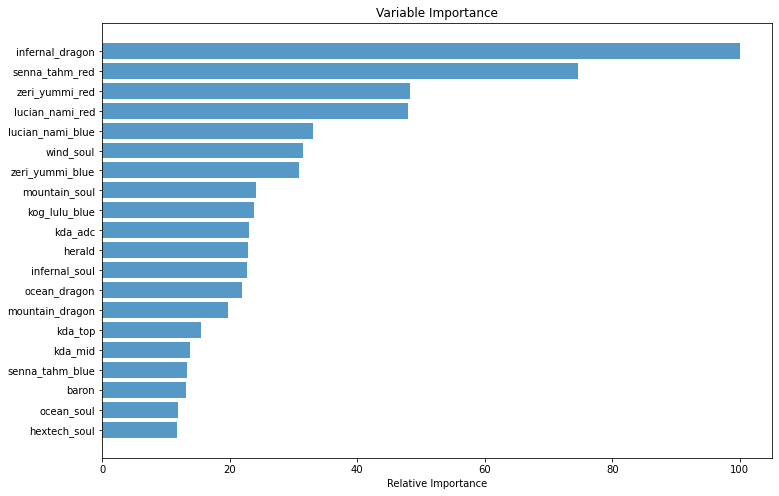

In [685]:
feature_importance = BEST_XGB.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20

plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [686]:
models=[Best_REG,Best_CART,Best_RF,Best_GBT,BEST_XGB]
errors = [RMSE(m, X_test, y_test) for m in models]

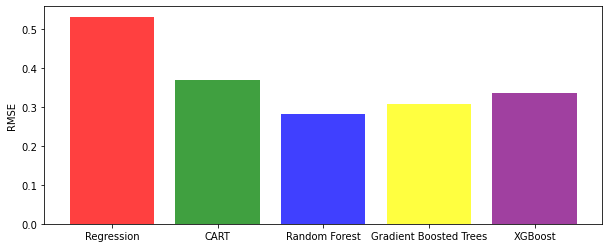

In [687]:
plt.figure(figsize = (10, 4))
plt.bar(['Regression','CART','Random Forest','Gradient Boosted Trees','XGBoost'], errors, color = ['red', 'green', 'blue','yellow','purple'], alpha = 0.75)
plt.ylabel('RMSE');

In [688]:
lr_labels=Best_REG.predict(X_test).round()
accuracy_score(y_test,lr_labels)

0.7171398527865405

In [689]:
ct_labels=Best_CART.predict(X_test).round()
accuracy_score(y_test,ct_labels)

0.8622502628811777

In [690]:
rf_labels=Best_RF.predict(X_test).round()
accuracy_score(y_test,rf_labels)

0.8969505783385909

In [691]:
gb_labels=Best_GBT.predict(X_test).round()
accuracy_score(y_test,gb_labels)

0.8727655099894848

In [692]:
xgb_labels=BEST_XGB.predict(X_test).round()
accuracy_score(y_test,xgb_labels)

0.886435331230284

Modele w podziale na minutę meczu

In [696]:
df_new['time'] = pd.to_datetime(df_new['time'], format='%H:%M:%S').dt.time

In [703]:
df_do10=df_new[df_new['time'] <= time(hour=0, minute=10, second=0)]

In [705]:
warunek1=df_new['time'] > time(hour=0, minute=10, second=0)
warunek2=df_new['time'] <= time(hour=0, minute=20, second=0)
df_do20=df_new[warunek1&warunek2]

In [707]:
df_po20=df_new[df_new['time'] > time(hour=0, minute=20, second=0)]

Do 10 minuty

In [708]:
df_do10.blue_team_win.value_counts()

0    628
1    603
Name: blue_team_win, dtype: int64

In [709]:
y=df_do10['blue_team_win']
X=df_do10.drop(['blue_team_win','time'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

Regresja

In [710]:
# Definicja modelu LogisticRegression
model = LogisticRegression()

# Definicja siatki parametrów do przetestowania
grid_parameters = {
    'logisticregression__penalty': ['l1', 'l2','elasticnet'],
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs','saga','sag','newton-cg']
}

# Tworzenie potoku, w którym dane są standaryzowane przed dopasowaniem modelu
pipeline = Pipeline([
    ('standardscaler', StandardScaler()),
    ('logisticregression', model)
])

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(pipeline, grid_parameters, cv=5)

# Dopasowanie modelu za pomocą GridSearchCV
grid_search.fit(X_train, y_train)

# Najlepsze parametry znalezione przez GridSearchCV
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Ocena modelu na zbiorze testowym
accuracy = grid_search.score(X_test, y_test)
print("Dokładność modelu na zbiorze testowym:", accuracy)

Najlepsze parametry: {'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
Dokładność modelu na zbiorze testowym: 0.6108108108108108


In [720]:
Best_REG=LogisticRegression(penalty='l1',max_iter = 300,C=1,solver='saga').fit(X_train,y_train)

In [721]:
lr_labels=Best_REG.predict(X_test).round()
accuracy_score(y_test,lr_labels)

0.5972972972972973

In [722]:
RMSE(Best_REG, X_test, y_test)

0.6345886090237538

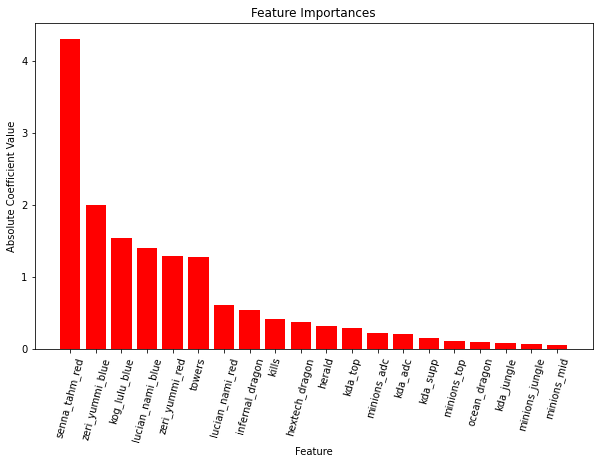

In [733]:
feature_importances = np.abs(Best_REG.coef_[0])

# Wykres ważności cech
num_feat = 20
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=[10, 6])
plt.bar(range(num_feat), feature_importances[indices][:num_feat], color="r")
plt.xticks(range(num_feat), X.columns[indices][:num_feat], rotation=75)
plt.xlabel("Feature")
plt.ylabel("Absolute Coefficient Value")
plt.title("Feature Importances")
plt.show()

Drzewa decyzyjne

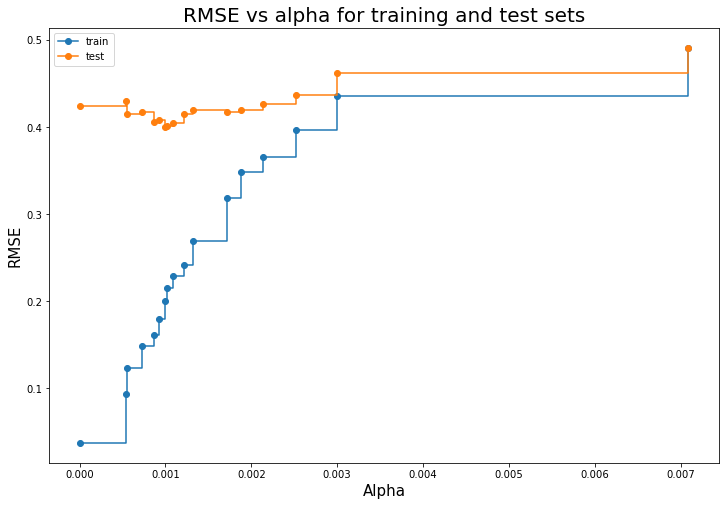

In [724]:
CART = DecisionTreeRegressor(random_state = 1, ccp_alpha = 0.0)
CART_model = CART.fit(X_train, y_train)
path = CART.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[::5]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state = 1, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
test_scores = [RMSE(clf, X_test, y_test) for clf in clfs]
train_scores = [RMSE(clf, X_train, y_train) for clf in clfs]

fig, ax = plt.subplots(figsize = [12, 8])
ax.set_xlabel("Alpha", fontsize = 15)
ax.set_ylabel("RMSE", fontsize = 15)
ax.set_title("RMSE vs alpha for training and test sets", fontsize = 20)
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [725]:
Best_CART = clfs[np.argmin(test_scores)]
print(f' ccp_alpha={Best_CART.ccp_alpha}')
print(f' depth={Best_CART.get_depth()}')
print(f' leaves={Best_CART.get_n_leaves()}')
print(f' minimalny_RMSE={min(test_scores)}')

 ccp_alpha=0.0009902805794975216
 depth=25
 leaves=99
 minimalny_RMSE=0.4007324973358426


In [729]:
ct_labels=Best_CART.predict(X_test).round()
accuracy_score(y_test,ct_labels)

0.8135135135135135

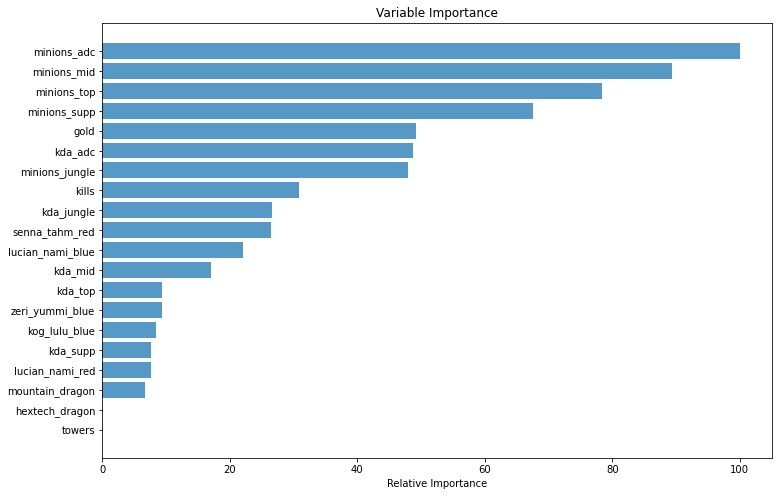

In [730]:
# Plot feature importance
feature_importance = Best_CART.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20

plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Lasy Losowe

Minimum for 300 trees


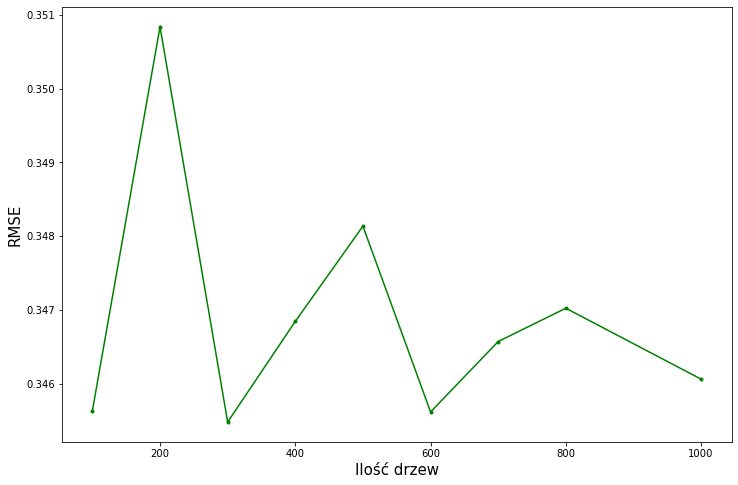

In [734]:
rfr = RandomForestRegressor
N = [100, 200, 300, 400, 500, 600, 700, 800, 1000]
RMSE_RF= [RMSE(rfr(n, n_jobs = -1).fit(X_train, y_train), X_test, y_test) for n in N]
plt.figure(figsize = (12, 8))
plt.plot(N, RMSE_RF, '.-', color = 'g');
plt.xlabel("Ilość drzew", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
print("Minimum for", N[np.argmin(RMSE_RF)], "trees")

In [735]:
#Checking number of features influence on RMSE
features = np.linspace(1, X_train.shape[1], 10).astype(int)
RMSE_RF_features= [RMSE(rfr(300, max_features = n, n_jobs = -1).fit(X_train, y_train), X_test, y_test) for n in features]

Minimum for 4 features


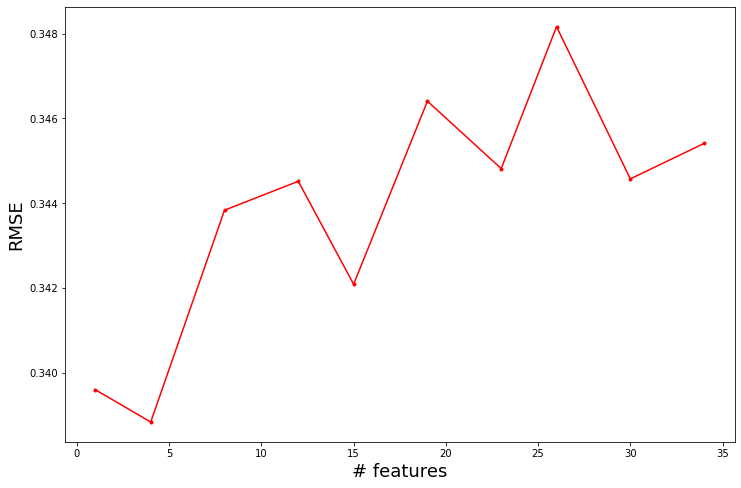

In [736]:
plt.figure(figsize = (12, 8))
plt.plot(features, RMSE_RF_features, '.-', color = 'r');
features[np.argmin(RMSE_RF_features)]
plt.xlabel("# features", fontsize = 18)
plt.ylabel("RMSE", fontsize = 18)
print("Minimum for", features[np.argmin(RMSE_RF_features)], "features")

In [737]:
Best_RF = RandomForestRegressor(400, max_features = 4, n_jobs = -1).fit(X_train, y_train)

In [738]:
RMSE(Best_RF, X_test, y_test)

0.3412124248941219

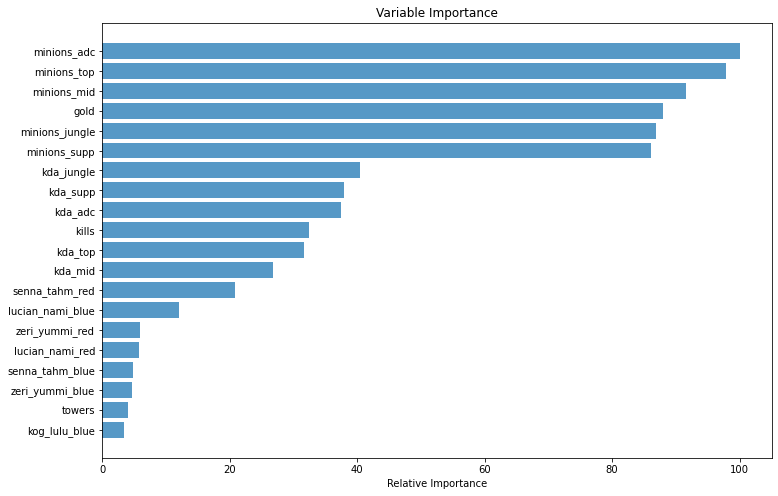

In [742]:
# Plot feature importance
feature_importance = Best_RF.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20

plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [741]:
rf_labels=Best_RF.predict(X_test).round()
accuracy_score(y_test,rf_labels)

0.8351351351351352

Gradient Boosting

In [743]:
#Checking number of tress influence on RMSE
gbr = GradientBoostingRegressor
N = [10, 50, 100, 500,1000, 1500,2000,2500,3000,3500,4000,4500,5000]
RMSE_GBT = [RMSE(gbr(n_estimators = n).fit(X_train, y_train), X_test, y_test) for n in N]

Minimum for 1000 trees


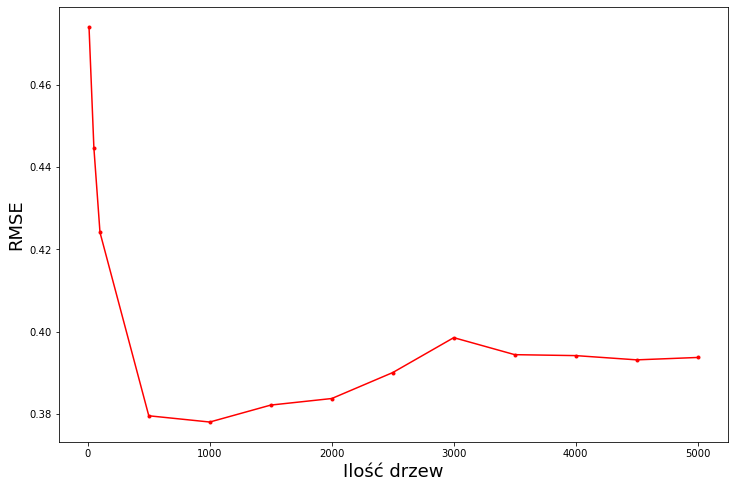

In [744]:
plt.figure(figsize = (12, 8))
plt.plot(N, RMSE_GBT, '.-', color = 'r');
plt.xlabel("Ilość drzew", fontsize = 18)
plt.ylabel("RMSE", fontsize = 18)
print("Minimum for", N[np.argmin(RMSE_GBT)], "trees")

In [752]:
Best_GBT = GradientBoostingRegressor(n_estimators = 1000).fit(X_train,y_train)

In [767]:
RMSE(Best_GBT, X_test, y_test)

0.3778143098303566

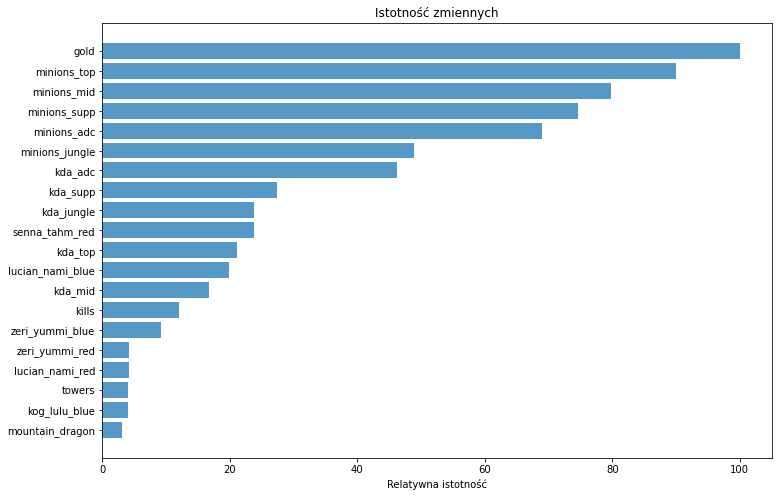

In [748]:
# Plot feature importance
feature_importance = Best_GBT.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20
plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relatywna istotność')
plt.title('Istotność zmiennych')
plt.show()

In [765]:
gb_labels=Best_GBT.predict(X_test).round()
accuracy_score(y_test,gb_labels)

0.8135135135135135

XGBoost

In [768]:
# Definicja modelu XGBClassifier
model = XGBClassifier()

# Zdefiniowanie siatki parametrów do przetestowania
param_grid = {
    'max_depth': [5, 7,9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200,300],
    'subsample': [0.7,0.8,0.9],
    'colsample_bytree': [0.6,0.8,0.9],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}
# dla klasyfikacji binarnej eval_metric = 'logloss'

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepsze parametry znalezione przez Grid Search
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Ocena dokładności dla najlepszego modelu
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Dokładność dla najlepszego modelu:", accuracy)

Najlepsze parametry: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'subsample': 0.9}
Dokładność dla najlepszego modelu: 0.827027027027027


In [769]:
BEST_XGB = XGBClassifier(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 9, n_estimators= 200,
                         reg_alpha= 0.5, reg_lambda= 0.1, subsample= 0.9).fit(X_train,y_train)

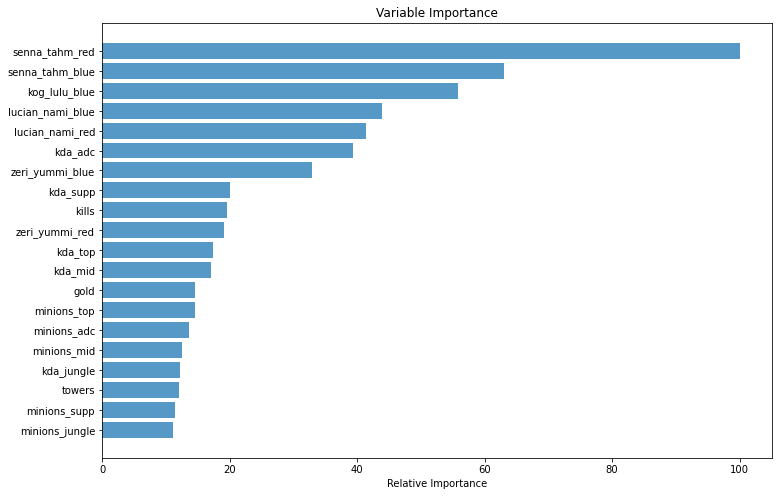

In [770]:
feature_importance = BEST_XGB.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20
plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [771]:
xgb_labels=BEST_XGB.predict(X_test).round()
accuracy_score(y_test,xgb_labels)

0.827027027027027

In [772]:
RMSE(BEST_XGB, X_test, y_test)

0.41590019592802907

Do 20 minuty

Regresja

In [777]:
df_do20.blue_team_win.value_counts()

1    478
0    431
Name: blue_team_win, dtype: int64

In [778]:
y=df_do20['blue_team_win']
X=df_do20.drop(['blue_team_win','time'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [779]:
# Definicja modelu LogisticRegression
model = LogisticRegression()

# Definicja siatki parametrów do przetestowania
grid_parameters = {
    'logisticregression__penalty': ['l1', 'l2','elasticnet'],
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs','saga','sag','newton-cg']
}

# Tworzenie potoku, w którym dane są standaryzowane przed dopasowaniem modelu
pipeline = Pipeline([
    ('standardscaler', StandardScaler()),
    ('logisticregression', model)
])

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(pipeline, grid_parameters, cv=5)

# Dopasowanie modelu za pomocą GridSearchCV
grid_search.fit(X_train, y_train)

# Najlepsze parametry znalezione przez GridSearchCV
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Ocena modelu na zbiorze testowym
accuracy = grid_search.score(X_test, y_test)
print("Dokładność modelu na zbiorze testowym:", accuracy)


Najlepsze parametry: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Dokładność modelu na zbiorze testowym: 0.717948717948718


In [782]:
Best_REG=LogisticRegression(penalty='l2',max_iter = 300,C=0.1,solver='liblinear').fit(X_train,y_train)

In [783]:
lr_labels=Best_REG.predict(X_test).round()
accuracy_score(y_test,lr_labels)

0.7216117216117216

In [784]:
RMSE(Best_REG, X_test, y_test)

0.5276251305503543

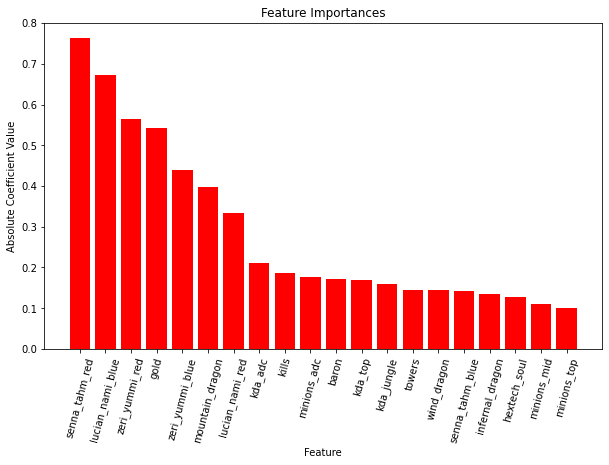

In [786]:
feature_importances = np.abs(Best_REG.coef_[0])
# Wykres ważności cech
num_feat = 20
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=[10, 6])
plt.bar(range(num_feat), feature_importances[indices][:num_feat], color="r")
plt.xticks(range(num_feat), X.columns[indices][:num_feat], rotation=75)
plt.xlabel("Feature")
plt.ylabel("Absolute Coefficient Value")
plt.title("Feature Importances")
plt.show()

Drzewa

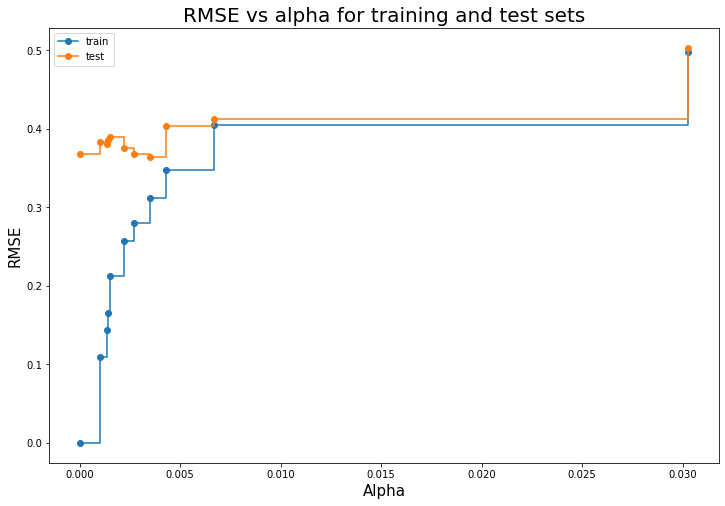

In [787]:
CART = DecisionTreeRegressor(random_state = 1, ccp_alpha = 0.0)
CART_model = CART.fit(X_train, y_train)
path = CART.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[::5]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state = 1, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
test_scores = [RMSE(clf, X_test, y_test) for clf in clfs]
train_scores = [RMSE(clf, X_train, y_train) for clf in clfs]

fig, ax = plt.subplots(figsize = [12, 8])
ax.set_xlabel("Alpha", fontsize = 15)
ax.set_ylabel("RMSE", fontsize = 15)
ax.set_title("RMSE vs alpha for training and test sets", fontsize = 20)
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [788]:
Best_CART = clfs[np.argmin(test_scores)]
print(f' ccp_alpha={Best_CART.ccp_alpha}')
print(f' depth={Best_CART.get_depth()}')
print(f' leaves={Best_CART.get_n_leaves()}')
print(f' minimalny_RMSE={min(test_scores)}')

 ccp_alpha=0.003511315599546345
 depth=9
 leaves=21
 minimalny_RMSE=0.3640828501368907


In [789]:
ct_labels=Best_CART.predict(X_test).round()
accuracy_score(y_test,ct_labels)

0.8315018315018315

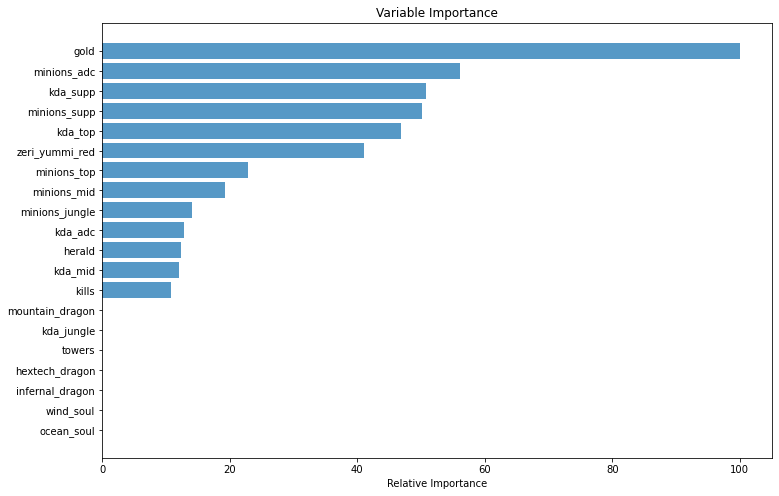

In [790]:
# Plot feature importance
feature_importance = Best_CART.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20

plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Lasy

Minimum for 100 trees


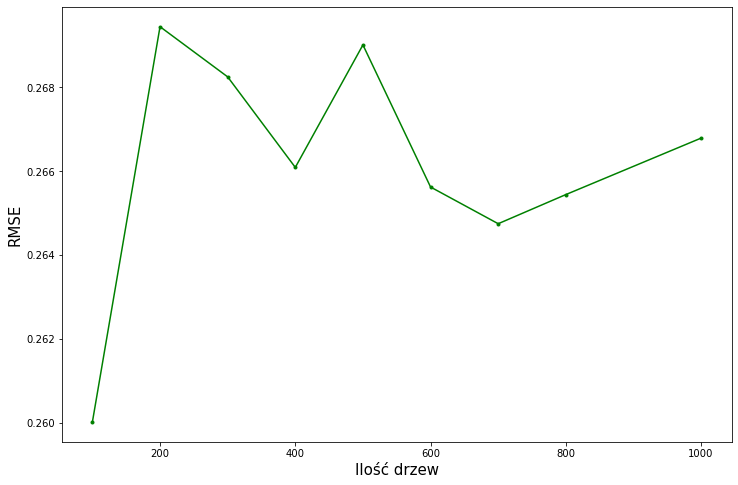

In [791]:
rfr = RandomForestRegressor
N = [100, 200, 300, 400, 500, 600, 700, 800, 1000]
RMSE_RF= [RMSE(rfr(n, n_jobs = -1).fit(X_train, y_train), X_test, y_test) for n in N]
plt.figure(figsize = (12, 8))
plt.plot(N, RMSE_RF, '.-', color = 'g');
plt.xlabel("Ilość drzew", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
print("Minimum for", N[np.argmin(RMSE_RF)], "trees")

In [792]:
#Checking number of features influence on RMSE
features = np.linspace(1, X_train.shape[1], 10).astype(int)
RMSE_RF_features= [RMSE(rfr(100, max_features = n, n_jobs = -1).fit(X_train, y_train), X_test, y_test) for n in features]

Minimum for 4 features


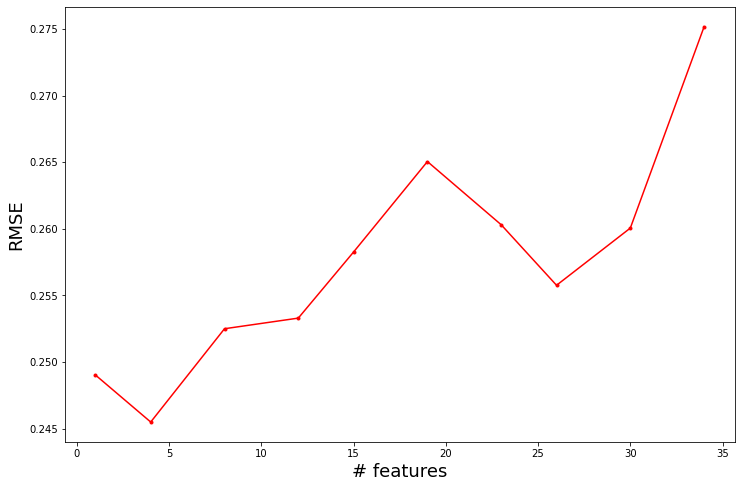

In [793]:
plt.figure(figsize = (12, 8))
plt.plot(features, RMSE_RF_features, '.-', color = 'r');
features[np.argmin(RMSE_RF_features)]
plt.xlabel("# features", fontsize = 18)
plt.ylabel("RMSE", fontsize = 18)
print("Minimum for", features[np.argmin(RMSE_RF_features)], "features")

In [794]:
Best_RF = RandomForestRegressor(100, max_features = 4, n_jobs = -1).fit(X_train, y_train)


In [795]:
RMSE(Best_RF, X_test, y_test)

0.24682897343006985

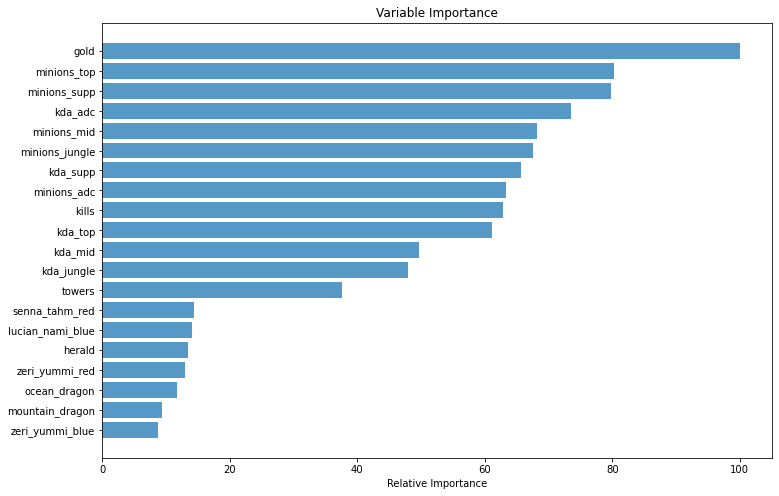

In [796]:
# Plot feature importance
feature_importance = Best_RF.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20
plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [797]:
rf_labels=Best_RF.predict(X_test).round()
accuracy_score(y_test,rf_labels)

0.9487179487179487

Boosting

In [798]:
#Checking number of tress influence on RMSE
gbr = GradientBoostingRegressor
N = [10, 50, 100, 500,1000, 1500,2000,2500,3000,3500,4000,4500,5000]
RMSE_GBT = [RMSE(gbr(n_estimators = n).fit(X_train, y_train), X_test, y_test) for n in N]

Minimum for 2000 trees


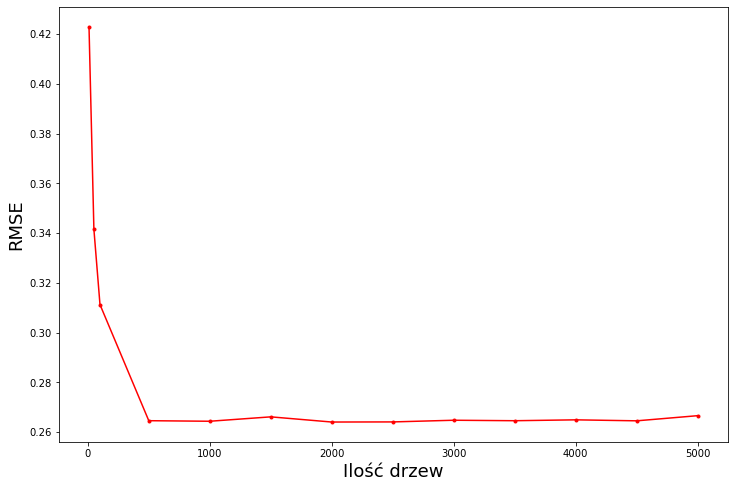

In [799]:
plt.figure(figsize = (12, 8))
plt.plot(N, RMSE_GBT, '.-', color = 'r');
plt.xlabel("Ilość drzew", fontsize = 18)
plt.ylabel("RMSE", fontsize = 18)
print("Minimum for", N[np.argmin(RMSE_GBT)], "trees")

In [800]:
Best_GBT = GradientBoostingRegressor(n_estimators = 2000).fit(X_train,y_train)

In [801]:
RMSE(Best_GBT, X_test, y_test)

0.26396623237809147

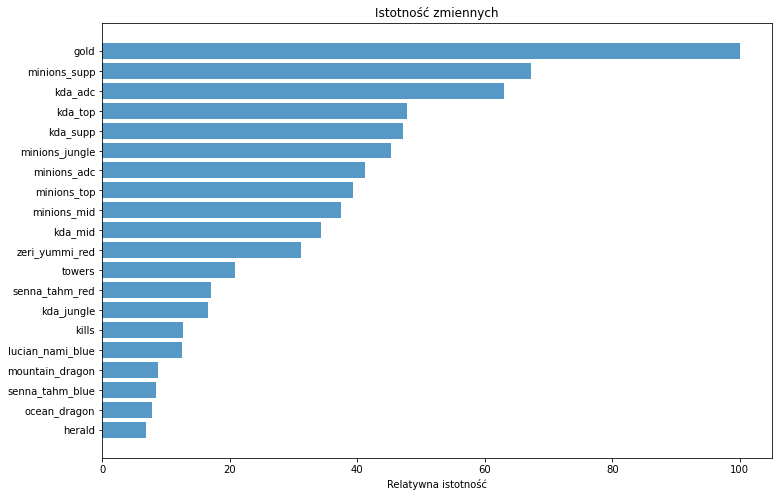

In [802]:
# Plot feature importance
feature_importance = Best_GBT.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20
plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relatywna istotność')
plt.title('Istotność zmiennych')
plt.show()

In [803]:
gb_labels=Best_GBT.predict(X_test).round()
accuracy_score(y_test,gb_labels)

0.9230769230769231

XGB

In [804]:
# Definicja modelu XGBClassifier
model = XGBClassifier()

# Zdefiniowanie siatki parametrów do przetestowania
param_grid = {
    'max_depth': [5, 7,9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200,300],
    'subsample': [0.7,0.8,0.9],
    'colsample_bytree': [0.6,0.8,0.9],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}
# dla klasyfikacji binarnej eval_metric = 'logloss'

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepsze parametry znalezione przez Grid Search
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Ocena dokładności dla najlepszego modelu
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Dokładność dla najlepszego modelu:", accuracy)

Najlepsze parametry: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 0.9}
Dokładność dla najlepszego modelu: 0.9304029304029304


In [805]:
BEST_XGB = XGBClassifier(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 5, n_estimators= 100,
                         reg_alpha= 0.0, reg_lambda= 0.0, subsample= 0.9).fit(X_train,y_train)
						 

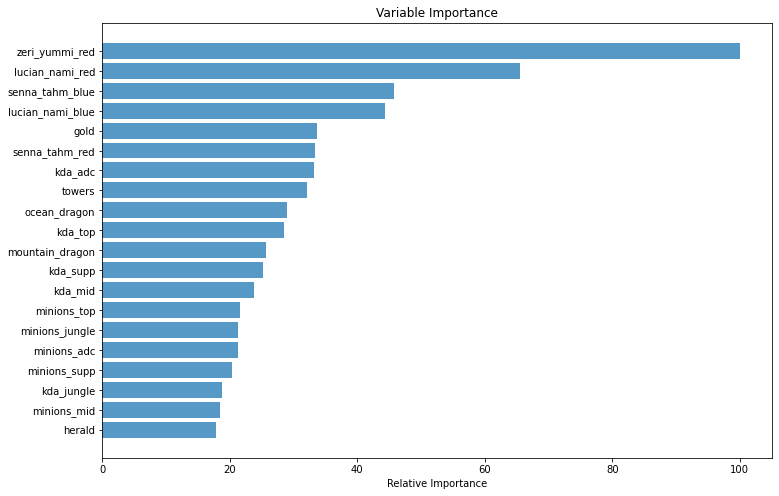

In [806]:
feature_importance = BEST_XGB.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20
plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [807]:
xgb_labels=BEST_XGB.predict(X_test).round()
accuracy_score(y_test,xgb_labels)

0.9304029304029304

In [808]:
RMSE(BEST_XGB, X_test, y_test)

0.26381256527517716

Po 20 min

In [809]:
df_po20.blue_team_win.value_counts()

0    525
1    503
Name: blue_team_win, dtype: int64

Regresja

In [810]:
y=df_po20['blue_team_win']
X=df_po20.drop(['blue_team_win','time'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [811]:
# Definicja modelu LogisticRegression
model = LogisticRegression()

# Definicja siatki parametrów do przetestowania
grid_parameters = {
    'logisticregression__penalty': ['l1', 'l2','elasticnet'],
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs','saga','sag','newton-cg']
}

# Tworzenie potoku, w którym dane są standaryzowane przed dopasowaniem modelu
pipeline = Pipeline([
    ('standardscaler', StandardScaler()),
    ('logisticregression', model)
])

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(pipeline, grid_parameters, cv=5)

# Dopasowanie modelu za pomocą GridSearchCV
grid_search.fit(X_train, y_train)

# Najlepsze parametry znalezione przez GridSearchCV
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Ocena modelu na zbiorze testowym
accuracy = grid_search.score(X_test, y_test)
print("Dokładność modelu na zbiorze testowym:", accuracy)

Najlepsze parametry: {'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
Dokładność modelu na zbiorze testowym: 0.86084142394822


In [814]:
Best_REG=LogisticRegression(penalty='l1',max_iter = 300,C=1,solver='saga').fit(X_train,y_train)

In [815]:
lr_labels=Best_REG.predict(X_test).round()
accuracy_score(y_test,lr_labels)

0.8543689320388349

In [816]:
RMSE(Best_REG, X_test, y_test)

0.38161638848608825

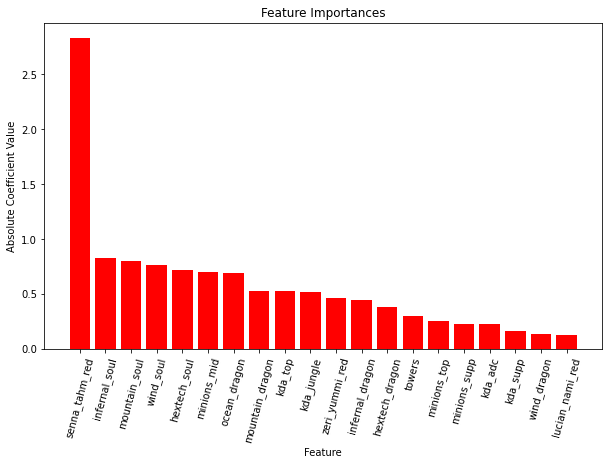

In [817]:
feature_importances = np.abs(Best_REG.coef_[0])
# Wykres ważności cech
num_feat = 20
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=[10, 6])
plt.bar(range(num_feat), feature_importances[indices][:num_feat], color="r")
plt.xticks(range(num_feat), X.columns[indices][:num_feat], rotation=75)
plt.xlabel("Feature")
plt.ylabel("Absolute Coefficient Value")
plt.title("Feature Importances")
plt.show()

Drzewa

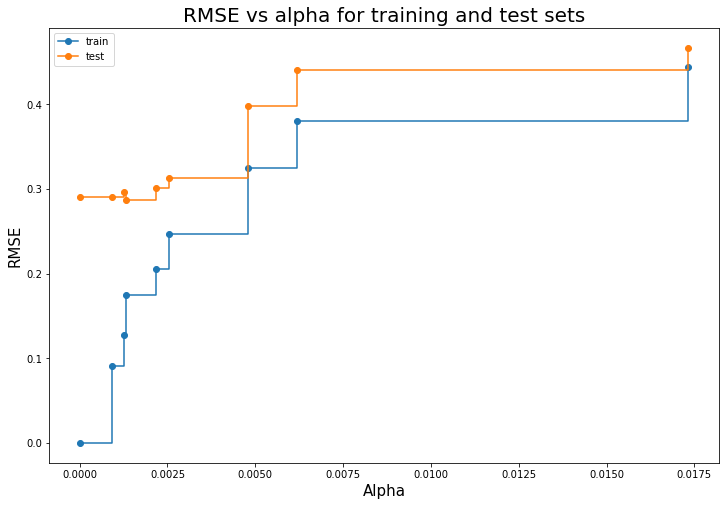

In [818]:
CART = DecisionTreeRegressor(random_state = 1, ccp_alpha = 0.0)
CART_model = CART.fit(X_train, y_train)
path = CART.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[::5]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state = 1, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
test_scores = [RMSE(clf, X_test, y_test) for clf in clfs]
train_scores = [RMSE(clf, X_train, y_train) for clf in clfs]

fig, ax = plt.subplots(figsize = [12, 8])
ax.set_xlabel("Alpha", fontsize = 15)
ax.set_ylabel("RMSE", fontsize = 15)
ax.set_title("RMSE vs alpha for training and test sets", fontsize = 20)
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()


In [819]:
Best_CART = clfs[np.argmin(test_scores)]
print(f' ccp_alpha={Best_CART.ccp_alpha}')
print(f' depth={Best_CART.get_depth()}')
print(f' leaves={Best_CART.get_n_leaves()}')
print(f' minimalny_RMSE={min(test_scores)}')

 ccp_alpha=0.0013091468647352985
 depth=12
 leaves=41
 minimalny_RMSE=0.2865427042443113


In [820]:
ct_labels=Best_CART.predict(X_test).round()
accuracy_score(y_test,ct_labels)

0.9061488673139159

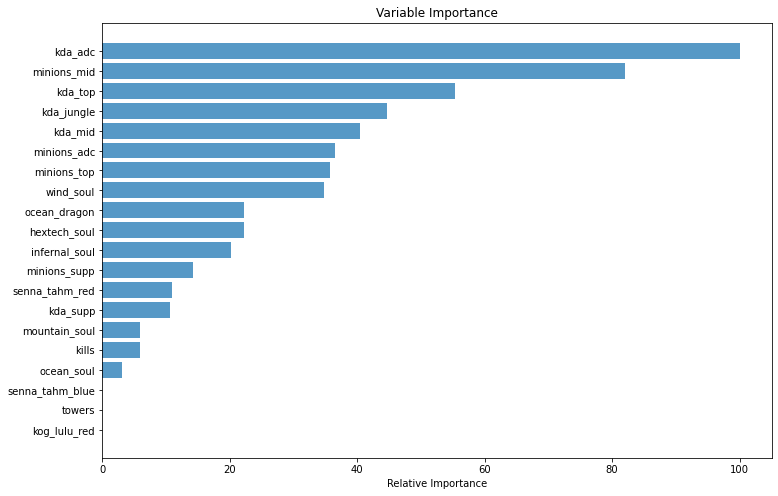

In [821]:
# Plot feature importance
feature_importance = Best_CART.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20

plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Lasy

Minimum for 500 trees


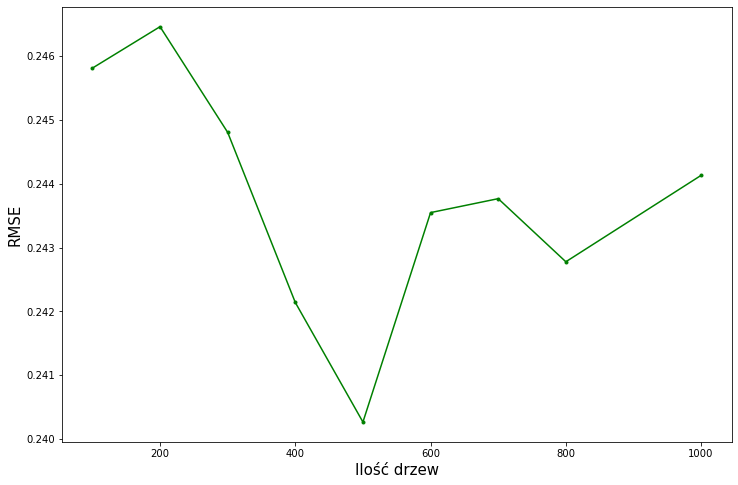

In [822]:
rfr = RandomForestRegressor
N = [100, 200, 300, 400, 500, 600, 700, 800, 1000]
RMSE_RF= [RMSE(rfr(n, n_jobs = -1).fit(X_train, y_train), X_test, y_test) for n in N]
plt.figure(figsize = (12, 8))
plt.plot(N, RMSE_RF, '.-', color = 'g');
plt.xlabel("Ilość drzew", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
print("Minimum for", N[np.argmin(RMSE_RF)], "trees")

In [823]:
#Checking number of features influence on RMSE
features = np.linspace(1, X_train.shape[1], 10).astype(int)
RMSE_RF_features= [RMSE(rfr(500, max_features = n, n_jobs = -1).fit(X_train, y_train), X_test, y_test) for n in features]

Minimum for 1 features


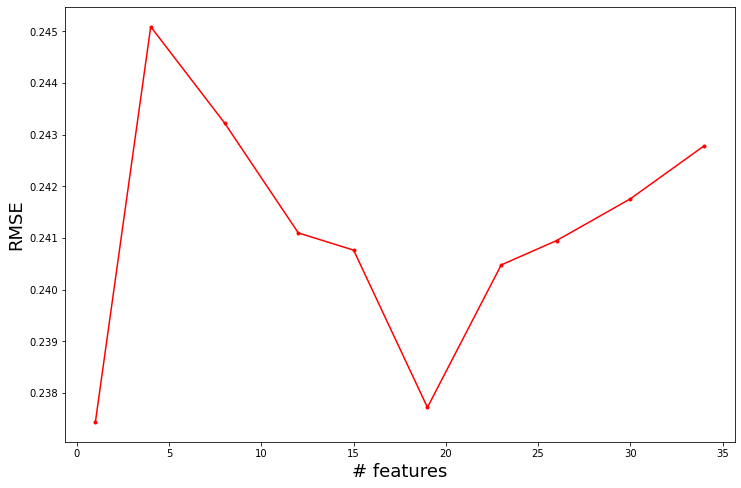

In [824]:
plt.figure(figsize = (12, 8))
plt.plot(features, RMSE_RF_features, '.-', color = 'r');
features[np.argmin(RMSE_RF_features)]
plt.xlabel("# features", fontsize = 18)
plt.ylabel("RMSE", fontsize = 18)
print("Minimum for", features[np.argmin(RMSE_RF_features)], "features")

In [828]:
Best_RF = RandomForestRegressor(500, max_features = 19, n_jobs = -1).fit(X_train, y_train)

In [829]:
RMSE(Best_RF, X_test, y_test)

0.2390403142665693

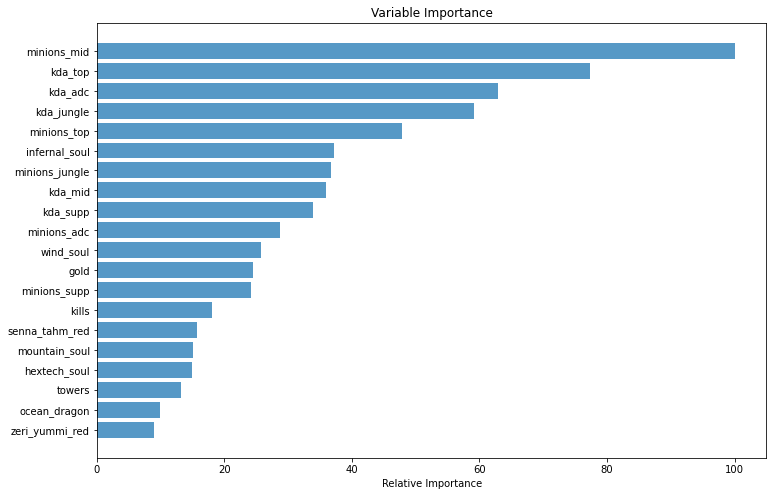

In [830]:
# Plot feature importance
feature_importance = Best_RF.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20
plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [831]:
rf_labels=Best_RF.predict(X_test).round()
accuracy_score(y_test,rf_labels)

0.9288025889967637

Boosting

In [832]:
#Checking number of tress influence on RMSE
gbr = GradientBoostingRegressor
N = [10, 50, 100, 500,1000, 1500,2000,2500,3000,3500,4000,4500,5000]
RMSE_GBT = [RMSE(gbr(n_estimators = n).fit(X_train, y_train), X_test, y_test) for n in N]


Minimum for 2500 trees


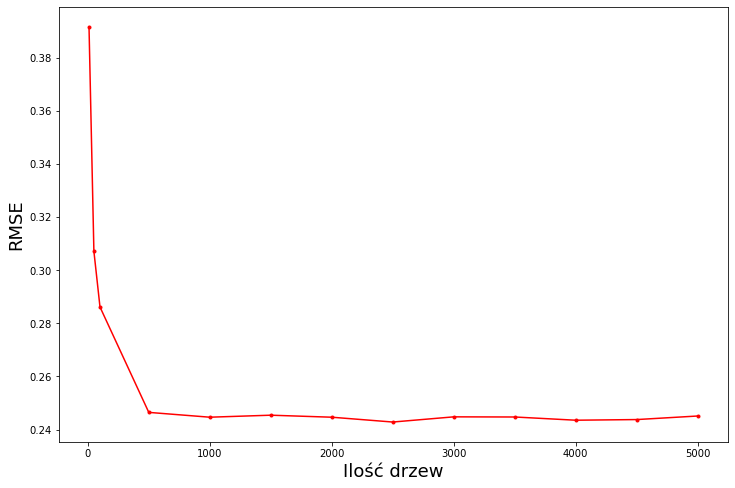

In [833]:
plt.figure(figsize = (12, 8))
plt.plot(N, RMSE_GBT, '.-', color = 'r');
plt.xlabel("Ilość drzew", fontsize = 18)
plt.ylabel("RMSE", fontsize = 18)
print("Minimum for", N[np.argmin(RMSE_GBT)], "trees")

In [834]:
Best_GBT = GradientBoostingRegressor(n_estimators = 2500).fit(X_train,y_train)

In [835]:
RMSE(Best_GBT, X_test, y_test)

0.24313011066204568

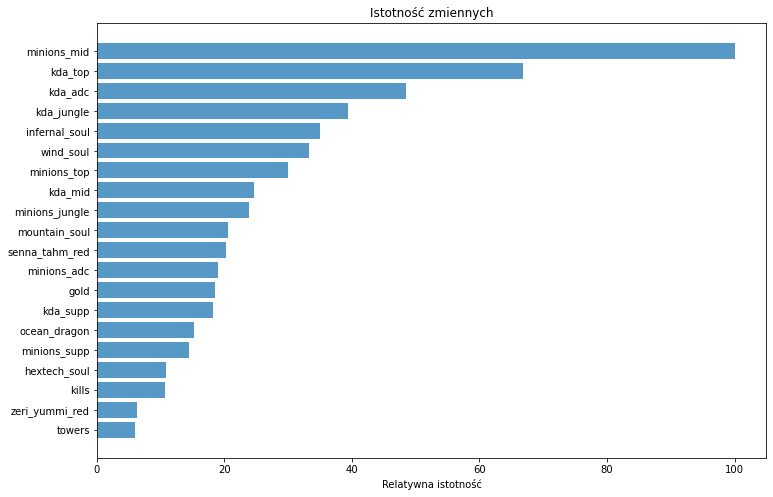

In [836]:
# Plot feature importance
feature_importance = Best_GBT.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20
plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relatywna istotność')
plt.title('Istotność zmiennych')
plt.show()

In [837]:
gb_labels=Best_GBT.predict(X_test).round()
accuracy_score(y_test,gb_labels)

0.9352750809061489

XGBoost

In [838]:
# Definicja modelu XGBClassifier
model = XGBClassifier()

# Zdefiniowanie siatki parametrów do przetestowania
param_grid = {
    'max_depth': [5, 7,9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200,300],
    'subsample': [0.7,0.8,0.9],
    'colsample_bytree': [0.6,0.8,0.9],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}
# dla klasyfikacji binarnej eval_metric = 'logloss'

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepsze parametry znalezione przez Grid Search
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Ocena dokładności dla najlepszego modelu
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Dokładność dla najlepszego modelu:", accuracy)

Najlepsze parametry: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 0.9}
Dokładność dla najlepszego modelu: 0.9385113268608414


In [839]:
BEST_XGB = XGBClassifier(colsample_bytree= 0.6, learning_rate= 0.1, max_depth= 5, n_estimators= 100,
                         reg_alpha= 0.0, reg_lambda= 0.0, subsample= 0.9).fit(X_train,y_train)

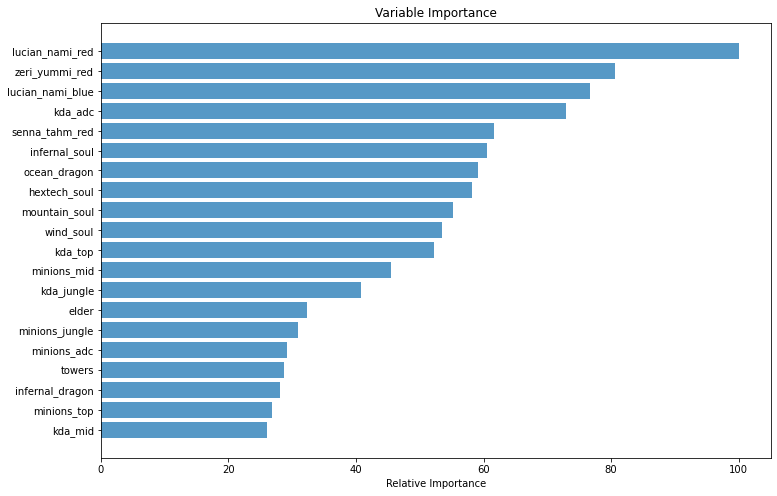

In [840]:
feature_importance = BEST_XGB.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 20
plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [841]:
xgb_labels=BEST_XGB.predict(X_test).round()
accuracy_score(y_test,xgb_labels)

0.9385113268608414

In [842]:
RMSE(BEST_XGB, X_test, y_test)

0.24796909714550838